In [1]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch
import numpy as np
from tqdm import tqdm

# Step 1: Load your train dataset without normalization
transform_no_norm = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

train_dataset_raw = datasets.ImageFolder('/mnt/c/Users/pragy/Downloads/Dataset/SD260/Split_Dataset/train', transform=transform_no_norm)
train_loader = DataLoader(train_dataset_raw, batch_size=64, shuffle=False, num_workers=2)

# Step 2: Compute mean and std
def get_mean_std(loader):
    mean = 0.
    std = 0.
    total_images = 0
    for images, _ in tqdm(loader):
        batch_samples = images.size(0)  # batch size (number of images)
        images = images.view(batch_samples, images.size(1), -1)  # flatten H and W
        mean += images.mean(2).sum(0)
        std += images.std(2).sum(0)
        total_images += batch_samples

    mean /= total_images
    std /= total_images
    return mean, std

mean, std = get_mean_std(train_loader)

print("Mean:", mean)
print("Std:", std)

/home/pragya/.local/lib/python3.10/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(
100%|███████████████████████████████████████████████████████████████████████████████████| 44/44 [00:20<00:00,  2.18it/s]

Mean: tensor([0.5439, 0.4471, 0.4324])
Std: tensor([0.2387, 0.2132, 0.2141])


In [8]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch
import numpy as np
from tqdm import tqdm

# Step 1: Load your train dataset without normalization
transform_no_norm = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

train_dataset_raw = datasets.ImageFolder('/mnt/c/Users/pragy/Downloads/Dataset/SD260/Augmented_Dataset/train', transform=transform_no_norm)
train_loader = DataLoader(train_dataset_raw, batch_size=64, shuffle=False, num_workers=2)

# Step 2: Compute mean and std
def get_mean_std(loader):
    mean = 0.
    std = 0.
    total_images = 0
    for images, _ in tqdm(loader):
        batch_samples = images.size(0)  # batch size (number of images)
        images = images.view(batch_samples, images.size(1), -1)  # flatten H and W
        mean += images.mean(2).sum(0)
        std += images.std(2).sum(0)
        total_images += batch_samples

    mean /= total_images
    std /= total_images
    return mean, std

mean, std = get_mean_std(train_loader)

print("Mean:", mean)
print("Std:", std)

100%|███████████████████████████████████████████████████████████████████████████████████| 57/57 [00:27<00:00,  2.07it/s]

Mean: tensor([0.5454, 0.4411, 0.4249])
Std: tensor([0.2404, 0.2131, 0.2130])


In [10]:
def get_model(model_name, num_classes):
    if model_name == 'resnet50':
        model = models.resnet50(pretrained=True)
        model.fc = nn.Linear(model.fc.in_features, num_classes)

    elif model_name == 'efficientnet_b0':
        model = models.efficientnet_b0(pretrained=True)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)

    elif model_name == 'convnext_tiny':
        model = timm.create_model("convnext_tiny", pretrained=True, num_classes=num_classes)

    elif model_name == 'inception_v3':
        model = models.inception_v3(pretrained=True, aux_logits=False)
        model.fc = nn.Linear(model.fc.in_features, num_classes)

    else:
        raise ValueError(f"Unsupported model: {model_name}")

    return model.to(DEVICE)


/home/pragya/.local/lib/python3.10/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(
2025-05-20 09:37:11.872159: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-20 09:37:12.317953: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-20 

Epoch 1/20, Train Loss: 0.6986, Train Accuracy: 0.6893
Validation Loss: 0.8428, Validation Accuracy: 0.6551


Epoch 2/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:18<00:00,  1.11it/s]


Epoch 2/20, Train Loss: 0.4248, Train Accuracy: 0.8376
Validation Loss: 0.7184, Validation Accuracy: 0.7217


Epoch 3/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:17<00:00,  1.13it/s]


Epoch 3/20, Train Loss: 0.2929, Train Accuracy: 0.8905
Validation Loss: 0.6532, Validation Accuracy: 0.7449


Epoch 4/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:17<00:00,  1.13it/s]


Epoch 4/20, Train Loss: 0.2916, Train Accuracy: 0.8930
Validation Loss: 0.9871, Validation Accuracy: 0.7478


Epoch 5/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:15<00:00,  1.16it/s]


Epoch 5/20, Train Loss: 0.2372, Train Accuracy: 0.9108
Validation Loss: 0.8511, Validation Accuracy: 0.7478


Epoch 6/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:14<00:00,  1.16it/s]


Epoch 6/20, Train Loss: 0.1882, Train Accuracy: 0.9340
Validation Loss: 0.7856, Validation Accuracy: 0.7536


Epoch 7/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:16<00:00,  1.14it/s]


Epoch 7/20, Train Loss: 0.1790, Train Accuracy: 0.9394
Validation Loss: 0.7570, Validation Accuracy: 0.7855


Epoch 8/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:14<00:00,  1.17it/s]


Epoch 8/20, Train Loss: 0.1861, Train Accuracy: 0.9344
Validation Loss: 0.7455, Validation Accuracy: 0.7826


Epoch 9/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:15<00:00,  1.15it/s]


Epoch 9/20, Train Loss: 0.1135, Train Accuracy: 0.9587
Validation Loss: 0.8728, Validation Accuracy: 0.7536


Epoch 10/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:15<00:00,  1.16it/s]


Epoch 10/20, Train Loss: 0.1151, Train Accuracy: 0.9605
Validation Loss: 0.7659, Validation Accuracy: 0.7797


Epoch 11/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:16<00:00,  1.14it/s]


Epoch 11/20, Train Loss: 0.0998, Train Accuracy: 0.9616
Validation Loss: 0.7348, Validation Accuracy: 0.7884


Epoch 12/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:15<00:00,  1.16it/s]


Epoch 12/20, Train Loss: 0.0796, Train Accuracy: 0.9728
Validation Loss: 0.9024, Validation Accuracy: 0.7855


Epoch 13/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:14<00:00,  1.17it/s]


Epoch 13/20, Train Loss: 0.1009, Train Accuracy: 0.9656
Validation Loss: 0.8127, Validation Accuracy: 0.8087


Epoch 14/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:14<00:00,  1.16it/s]


Epoch 14/20, Train Loss: 0.1162, Train Accuracy: 0.9637
Validation Loss: 0.7763, Validation Accuracy: 0.8058


Epoch 15/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:15<00:00,  1.16it/s]


Epoch 15/20, Train Loss: 0.0980, Train Accuracy: 0.9692
Validation Loss: 0.7044, Validation Accuracy: 0.8145


Epoch 16/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:15<00:00,  1.16it/s]


Epoch 16/20, Train Loss: 0.0646, Train Accuracy: 0.9808
Validation Loss: 0.9888, Validation Accuracy: 0.7884


Epoch 17/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:15<00:00,  1.16it/s]


Epoch 17/20, Train Loss: 0.0992, Train Accuracy: 0.9666
Validation Loss: 0.9191, Validation Accuracy: 0.7797


Epoch 18/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:52<00:00,  1.67it/s]


Epoch 18/20, Train Loss: 0.0620, Train Accuracy: 0.9764
Validation Loss: 0.8936, Validation Accuracy: 0.8000


Epoch 19/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:51<00:00,  1.71it/s]


Epoch 19/20, Train Loss: 0.0555, Train Accuracy: 0.9826
Validation Loss: 0.8863, Validation Accuracy: 0.7884


Epoch 20/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:51<00:00,  1.69it/s]


Epoch 20/20, Train Loss: 0.0735, Train Accuracy: 0.9743
Validation Loss: 0.9160, Validation Accuracy: 0.7652

✅ Total Training Time: 1581.35 seconds (26.36 minutes)


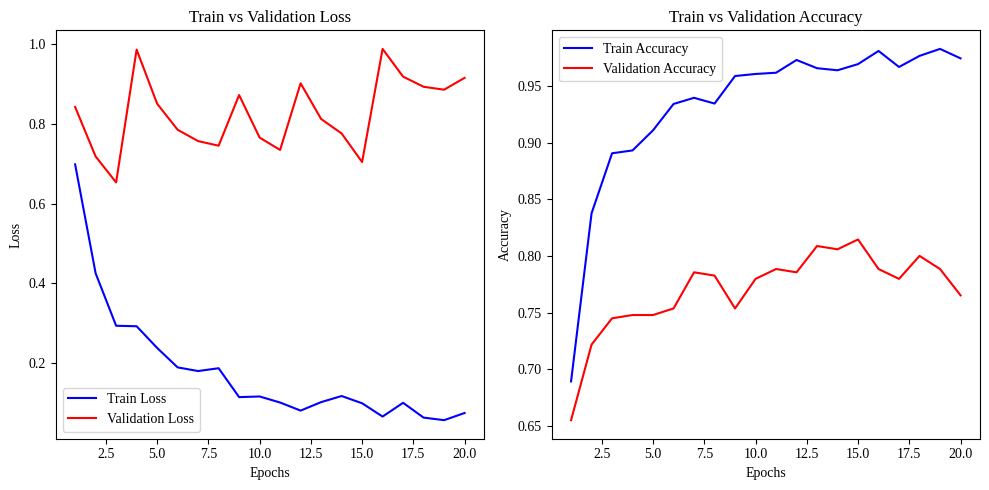

Classification Report:
                precision    recall  f1-score   support

        Eczema       0.82      0.87      0.85       139
     Psoriasis       0.78      0.64      0.71        56
Tinea_Ringworm       0.87      0.88      0.87       150

      accuracy                           0.84       345
     macro avg       0.82      0.80      0.81       345
  weighted avg       0.84      0.84      0.84       345

Confusion Matrix:


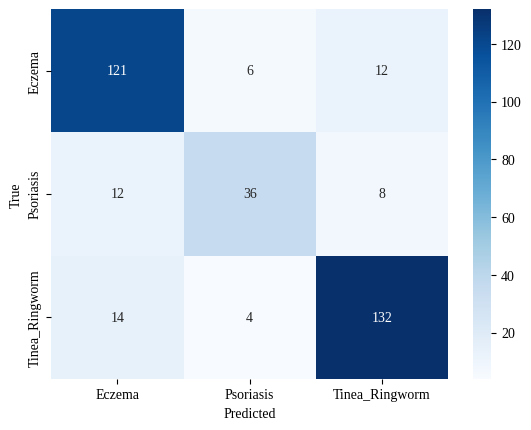

In [1]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, WeightedRandomSampler
from transformers import ViTForImageClassification, ViTFeatureExtractor
import timm
import os
from collections import Counter
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time
import random
from matplotlib import font_manager as fm
font_path = "/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf"

# ✅ Force-add the font
fm.fontManager.addfont(font_path)

# ✅ Create a font properties object
liberation_font = fm.FontProperties(fname=font_path)
# ✅ Apply the font globally to all plots
plt.rcParams['font.family'] = liberation_font.get_name()

# ------------------- Config ------------------- #
DATA_DIR = '/mnt/c/Users/pragy/Downloads/Dataset/SD260/Split_Dataset'  # should have train/val/test folders
BATCH_SIZE = 32
NUM_CLASSES = 3
NUM_EPOCHS = 20

MODEL_NAME = 'resnet50'  # one of: resnet50, efficientnet_b0, inception_v3, convnext_tiny, vit_b_16, swin_tiny

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(42)
# ------------------- Transforms ------------------- #
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize([0.5439, 0.4471, 0.4324], [0.2387, 0.2132, 0.2141])
])
val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5439, 0.4471, 0.4324], [0.2387, 0.2132, 0.2141])
])


# ------------------- Dataset ------------------- #
train_dataset = ImageFolder(os.path.join(DATA_DIR, 'train'), transform=train_transform)
val_dataset = ImageFolder(os.path.join(DATA_DIR, 'val'), transform=val_test_transform)
test_dataset = ImageFolder(os.path.join(DATA_DIR, 'test'), transform=val_test_transform)

# ------------------- DataLoader ------------------- #
# Weighted sampling to handle class imbalance
class_counts = [count for _, count in Counter(train_dataset.targets).items()]
class_weights = 1. / np.array(class_counts, dtype=np.float32)
weights = class_weights[train_dataset.targets]

sampler = WeightedRandomSampler(weights, len(weights))

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# ------------------- Model ------------------- #
def get_model(model_name):
    if model_name == 'resnet50':
        model = models.resnet50(pretrained=True)
        model.fc = torch.nn.Linear(model.fc.in_features, NUM_CLASSES)
    elif model_name == 'efficientnet_b0':
        model = timm.create_model('efficientnet_b0', pretrained=True)
        model.classifier = torch.nn.Linear(model.classifier.in_features, NUM_CLASSES)
    elif model_name == 'inception_v3':
        model = models.inception_v3(pretrained=True)
        model.AuxLogits.fc = torch.nn.Linear(model.AuxLogits.fc.in_features, NUM_CLASSES)
        model.fc = torch.nn.Linear(model.fc.in_features, NUM_CLASSES)

    elif model_name == 'vit_b_16':
        model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224-in21k", num_labels=NUM_CLASSES)

    else:
        raise ValueError("Model name not recognized")
    
    return model

# Load model
model = get_model(MODEL_NAME).to(DEVICE)

# ------------------- Loss and Optimizer ------------------- #
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# ------------------- Training Function ------------------- #
# ------------------- Training Function with Loss and Accuracy Per Epoch ------------------- #
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    best_model_wts = model.state_dict()
    best_acc = 0.0

    # Lists to store the loss and accuracy values per epoch
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0

        # Training loop
        for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Track accuracy
            _, preds = torch.max(outputs, 1)
            correct_preds += torch.sum(preds == labels).item()
            total_preds += labels.size(0)
            running_loss += loss.item()

        # Calculate average training loss and accuracy for the epoch
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct_preds / total_preds

        # Append values for the current epoch
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_acc:.4f}")

        # Validation loop
        model.eval()
        val_loss = 0.0
        val_correct_preds = 0
        val_total_preds = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                # Track accuracy
                _, preds = torch.max(outputs, 1)
                val_correct_preds += torch.sum(preds == labels).item()
                val_total_preds += labels.size(0)
                val_loss += loss.item()

        # Calculate average validation loss and accuracy for the epoch
        val_epoch_loss = val_loss / len(val_loader)
        val_epoch_acc = val_correct_preds / val_total_preds

        # Append values for the current epoch
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc)

        print(f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_acc:.4f}")

        # Save the best model
        if val_epoch_acc > best_acc:
            best_acc = val_epoch_acc
            best_model_wts = model.state_dict()

    # Load the best model weights
    model.load_state_dict(best_model_wts)

    # Return model and the lists of losses and accuracies
    return model, train_losses, val_losses, train_accuracies, val_accuracies

# ------------------- Training the Model ------------------- #
start_time = time.time()
trained_model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, criterion, optimizer, NUM_EPOCHS
)
end_time = time.time()
training_duration = end_time - start_time

print(f"\n✅ Total Training Time: {training_duration:.2f} seconds ({training_duration/60:.2f} minutes)")


# ------------------- Plotting Loss and Accuracy ------------------- #
def plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, NUM_EPOCHS + 1)

    # Plot Training and Validation Loss
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss', color='blue')
    plt.plot(epochs, val_losses, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train vs Validation Loss')
    plt.legend()

    # Plot Training and Validation Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy', color='blue')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train vs Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# ------------------- Plot Loss and Accuracy ------------------- #
plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies)

# ------------------- Evaluate on Test Set ------------------- #
def evaluate_model(model, test_loader):
    model.eval()
    test_preds = []
    test_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            test_preds.extend(preds.cpu().numpy())
            test_labels.extend(labels.cpu().numpy())

    print("Classification Report:")
    print(classification_report(test_labels, test_preds, target_names=test_loader.dataset.classes))

    print("Confusion Matrix:")
    cm = confusion_matrix(test_labels, test_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_loader.dataset.classes, yticklabels=test_loader.dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
torch.save(model.state_dict(), '/mnt/c/Users/pragy/Downloads/Dataset/SD260/Models/resnet50.pth')
evaluate_model(trained_model, test_loader)


Epoch 1/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:43<00:00,  2.00it/s]


Epoch 1/20, Train Loss: 0.9025, Train Accuracy: 0.5845
Validation Loss: 0.8284, Validation Accuracy: 0.6406


Epoch 2/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:42<00:00,  2.05it/s]


Epoch 2/20, Train Loss: 0.5666, Train Accuracy: 0.7788
Validation Loss: 0.6897, Validation Accuracy: 0.6899


Epoch 3/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:42<00:00,  2.07it/s]


Epoch 3/20, Train Loss: 0.3807, Train Accuracy: 0.8619
Validation Loss: 0.6046, Validation Accuracy: 0.7507


Epoch 4/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:41<00:00,  2.08it/s]


Epoch 4/20, Train Loss: 0.2620, Train Accuracy: 0.9097
Validation Loss: 0.5834, Validation Accuracy: 0.7507


Epoch 5/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:41<00:00,  2.07it/s]


Epoch 5/20, Train Loss: 0.2033, Train Accuracy: 0.9329
Validation Loss: 0.6002, Validation Accuracy: 0.7594


Epoch 6/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:45<00:00,  1.93it/s]


Epoch 6/20, Train Loss: 0.1352, Train Accuracy: 0.9634
Validation Loss: 0.6486, Validation Accuracy: 0.7594


Epoch 7/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:45<00:00,  1.93it/s]


Epoch 7/20, Train Loss: 0.1091, Train Accuracy: 0.9666
Validation Loss: 0.6278, Validation Accuracy: 0.7768


Epoch 8/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:42<00:00,  2.07it/s]


Epoch 8/20, Train Loss: 0.0862, Train Accuracy: 0.9721
Validation Loss: 0.6036, Validation Accuracy: 0.8000


Epoch 9/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:42<00:00,  2.04it/s]


Epoch 9/20, Train Loss: 0.0622, Train Accuracy: 0.9822
Validation Loss: 0.6648, Validation Accuracy: 0.8029


Epoch 10/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:42<00:00,  2.04it/s]


Epoch 10/20, Train Loss: 0.0445, Train Accuracy: 0.9855
Validation Loss: 0.7415, Validation Accuracy: 0.7971


Epoch 11/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:42<00:00,  2.03it/s]


Epoch 11/20, Train Loss: 0.0469, Train Accuracy: 0.9840
Validation Loss: 0.7544, Validation Accuracy: 0.7623


Epoch 12/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:41<00:00,  2.10it/s]


Epoch 12/20, Train Loss: 0.0548, Train Accuracy: 0.9815
Validation Loss: 0.7030, Validation Accuracy: 0.7884


Epoch 13/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:42<00:00,  2.04it/s]


Epoch 13/20, Train Loss: 0.0494, Train Accuracy: 0.9866
Validation Loss: 0.7459, Validation Accuracy: 0.7855


Epoch 14/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:42<00:00,  2.05it/s]


Epoch 14/20, Train Loss: 0.0502, Train Accuracy: 0.9859
Validation Loss: 0.6831, Validation Accuracy: 0.8029


Epoch 15/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:42<00:00,  2.07it/s]


Epoch 15/20, Train Loss: 0.0590, Train Accuracy: 0.9848
Validation Loss: 0.7406, Validation Accuracy: 0.7884


Epoch 16/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:42<00:00,  2.05it/s]


Epoch 16/20, Train Loss: 0.0400, Train Accuracy: 0.9869
Validation Loss: 0.7097, Validation Accuracy: 0.8087


Epoch 17/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:41<00:00,  2.08it/s]


Epoch 17/20, Train Loss: 0.0304, Train Accuracy: 0.9895
Validation Loss: 0.7401, Validation Accuracy: 0.7884


Epoch 18/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:42<00:00,  2.07it/s]


Epoch 18/20, Train Loss: 0.0252, Train Accuracy: 0.9942
Validation Loss: 0.8721, Validation Accuracy: 0.7855


Epoch 19/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:44<00:00,  1.96it/s]


Epoch 19/20, Train Loss: 0.0404, Train Accuracy: 0.9866
Validation Loss: 0.8374, Validation Accuracy: 0.8000


Epoch 20/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:44<00:00,  1.97it/s]


Epoch 20/20, Train Loss: 0.0290, Train Accuracy: 0.9913
Validation Loss: 0.8364, Validation Accuracy: 0.7913

✅ Total Training Time: 943.73 seconds (15.73 minutes)


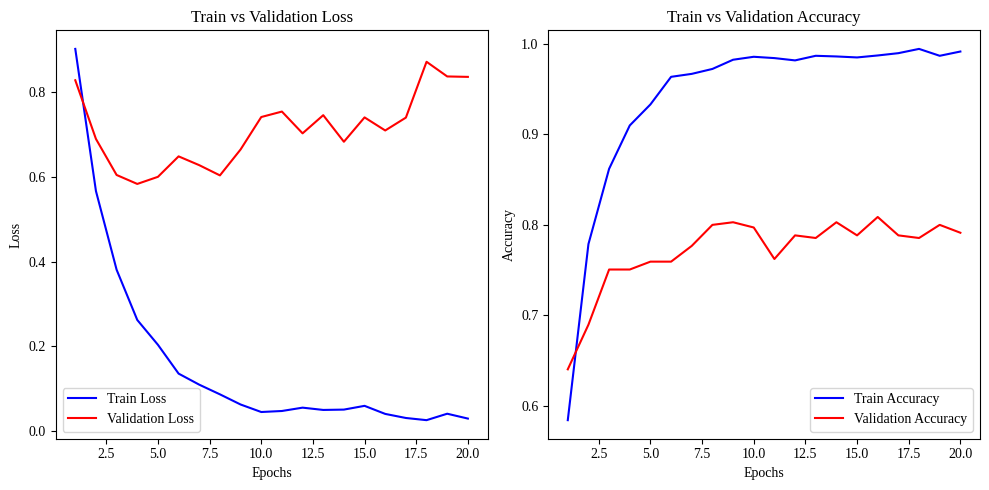

Classification Report:
                precision    recall  f1-score   support

        Eczema       0.81      0.83      0.82       139
     Psoriasis       0.69      0.68      0.68        56
Tinea_Ringworm       0.87      0.85      0.86       150

      accuracy                           0.82       345
     macro avg       0.79      0.79      0.79       345
  weighted avg       0.82      0.82      0.82       345

Confusion Matrix:


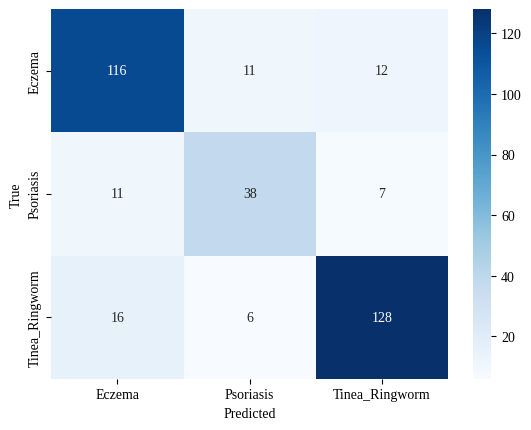

In [2]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, WeightedRandomSampler
from transformers import ViTForImageClassification, ViTFeatureExtractor
import timm
import os
from collections import Counter
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random
from matplotlib import font_manager as fm
font_path = "/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf"

# ✅ Force-add the font
fm.fontManager.addfont(font_path)

# ✅ Create a font properties object
liberation_font = fm.FontProperties(fname=font_path)
# ✅ Apply the font globally to all plots
plt.rcParams['font.family'] = liberation_font.get_name()

# ------------------- Config ------------------- #
DATA_DIR = '/mnt/c/Users/pragy/Downloads/Dataset/SD260/Split_Dataset'  # should have train/val/test folders
BATCH_SIZE = 32
NUM_CLASSES = 3
NUM_EPOCHS = 20

MODEL_NAME = 'efficientnet_b0'  # one of: resnet50, efficientnet_b0, inception_v3, convnext_tiny, vit_b_16, swin_tiny

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(42)
# ------------------- Transforms ------------------- #
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize([0.5439, 0.4471, 0.4324], [0.2387, 0.2132, 0.2141])
])
val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5439, 0.4471, 0.4324], [0.2387, 0.2132, 0.2141])
])


# ------------------- Dataset ------------------- #
train_dataset = ImageFolder(os.path.join(DATA_DIR, 'train'), transform=train_transform)
val_dataset = ImageFolder(os.path.join(DATA_DIR, 'val'), transform=val_test_transform)
test_dataset = ImageFolder(os.path.join(DATA_DIR, 'test'), transform=val_test_transform)

# ------------------- DataLoader ------------------- #
# Weighted sampling to handle class imbalance
class_counts = [count for _, count in Counter(train_dataset.targets).items()]
class_weights = 1. / np.array(class_counts, dtype=np.float32)
weights = class_weights[train_dataset.targets]

sampler = WeightedRandomSampler(weights, len(weights))

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# ------------------- Model ------------------- #
def get_model(model_name):
    if model_name == 'resnet50':
        model = models.resnet50(pretrained=True)
        model.fc = torch.nn.Linear(model.fc.in_features, NUM_CLASSES)
    elif model_name == 'efficientnet_b0':
        model = timm.create_model('efficientnet_b0', pretrained=True)
        model.classifier = torch.nn.Linear(model.classifier.in_features, NUM_CLASSES)
    elif model_name == 'inception_v3':
        model = models.inception_v3(pretrained=True)
        model.AuxLogits.fc = torch.nn.Linear(model.AuxLogits.fc.in_features, NUM_CLASSES)
        model.fc = torch.nn.Linear(model.fc.in_features, NUM_CLASSES)
    elif model_name == 'convnext_tiny':
        model = timm.create_model('convnext_tiny', pretrained=True, num_classes=NUM_CLASSES)
        
    elif model_name == 'vit_b_16':
        model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224-in21k", num_labels=NUM_CLASSES)
    elif model_name == 'swin_tiny':
        model = timm.create_model('swin_tiny_patch4_window7_224', pretrained=True)
        model.head = torch.nn.Linear(model.head.in_features, NUM_CLASSES)
    else:
        raise ValueError("Model name not recognized")
    
    return model

# Load model
model = get_model(MODEL_NAME).to(DEVICE)

# ------------------- Loss and Optimizer ------------------- #
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


# ------------------- Training Function with Loss and Accuracy Per Epoch ------------------- #
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    best_model_wts = model.state_dict()
    best_acc = 0.0

    # Lists to store the loss and accuracy values per epoch
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0

        # Training loop
        for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Track accuracy
            _, preds = torch.max(outputs, 1)
            correct_preds += torch.sum(preds == labels).item()
            total_preds += labels.size(0)
            running_loss += loss.item()

        # Calculate average training loss and accuracy for the epoch
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct_preds / total_preds

        # Append values for the current epoch
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_acc:.4f}")

        # Validation loop
        model.eval()
        val_loss = 0.0
        val_correct_preds = 0
        val_total_preds = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                # Track accuracy
                _, preds = torch.max(outputs, 1)
                val_correct_preds += torch.sum(preds == labels).item()
                val_total_preds += labels.size(0)
                val_loss += loss.item()

        # Calculate average validation loss and accuracy for the epoch
        val_epoch_loss = val_loss / len(val_loader)
        val_epoch_acc = val_correct_preds / val_total_preds

        # Append values for the current epoch
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc)

        print(f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_acc:.4f}")

        # Save the best model
        if val_epoch_acc > best_acc:
            best_acc = val_epoch_acc
            best_model_wts = model.state_dict()

    # Load the best model weights
    model.load_state_dict(best_model_wts)

    # Return model and the lists of losses and accuracies
    return model, train_losses, val_losses, train_accuracies, val_accuracies

# ------------------- Training the Model ------------------- #
start_time = time.time()
trained_model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, criterion, optimizer, NUM_EPOCHS
)
end_time = time.time()
training_duration = end_time - start_time

print(f"\n✅ Total Training Time: {training_duration:.2f} seconds ({training_duration/60:.2f} minutes)")

# ------------------- Plotting Loss and Accuracy ------------------- #
def plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, NUM_EPOCHS + 1)

    # Plot Training and Validation Loss
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss', color='blue')
    plt.plot(epochs, val_losses, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train vs Validation Loss')
    plt.legend()

    # Plot Training and Validation Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy', color='blue')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train vs Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# ------------------- Plot Loss and Accuracy ------------------- #
plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies)

# ------------------- Evaluate on Test Set ------------------- #
def evaluate_model(model, test_loader):
    model.eval()
    test_preds = []
    test_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            test_preds.extend(preds.cpu().numpy())
            test_labels.extend(labels.cpu().numpy())

    print("Classification Report:")
    print(classification_report(test_labels, test_preds, target_names=test_loader.dataset.classes))

    print("Confusion Matrix:")
    cm = confusion_matrix(test_labels, test_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_loader.dataset.classes, yticklabels=test_loader.dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

torch.save(model.state_dict(), '/mnt/c/Users/pragy/Downloads/Dataset/SD260/Models/efficientnet_b0.pth')
evaluate_model(trained_model, test_loader)



/home/pragya/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/pragya/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 1/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:58<00:00,  1.48it/s]


Epoch 1/20, Train Loss: 0.7724, Train Accuracy: 0.6487
Validation Loss: 0.6708, Validation Accuracy: 0.7101


Epoch 2/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:58<00:00,  1.49it/s]


Epoch 2/20, Train Loss: 0.4424, Train Accuracy: 0.8314
Validation Loss: 0.6695, Validation Accuracy: 0.7536


Epoch 3/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:58<00:00,  1.49it/s]


Epoch 3/20, Train Loss: 0.3140, Train Accuracy: 0.8898
Validation Loss: 0.6495, Validation Accuracy: 0.7652


Epoch 4/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:58<00:00,  1.48it/s]


Epoch 4/20, Train Loss: 0.2459, Train Accuracy: 0.9162
Validation Loss: 0.8269, Validation Accuracy: 0.7246


Epoch 5/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:58<00:00,  1.50it/s]


Epoch 5/20, Train Loss: 0.1700, Train Accuracy: 0.9442
Validation Loss: 0.7425, Validation Accuracy: 0.7652


Epoch 6/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:57<00:00,  1.50it/s]


Epoch 6/20, Train Loss: 0.1592, Train Accuracy: 0.9489
Validation Loss: 0.7883, Validation Accuracy: 0.7478


Epoch 7/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:58<00:00,  1.49it/s]


Epoch 7/20, Train Loss: 0.1318, Train Accuracy: 0.9569
Validation Loss: 0.7136, Validation Accuracy: 0.7623


Epoch 8/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:58<00:00,  1.48it/s]


Epoch 8/20, Train Loss: 0.1092, Train Accuracy: 0.9634
Validation Loss: 0.7644, Validation Accuracy: 0.7797


Epoch 9/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:58<00:00,  1.49it/s]


Epoch 9/20, Train Loss: 0.0985, Train Accuracy: 0.9648
Validation Loss: 0.6679, Validation Accuracy: 0.8058


Epoch 10/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:59<00:00,  1.47it/s]


Epoch 10/20, Train Loss: 0.0930, Train Accuracy: 0.9666
Validation Loss: 0.8886, Validation Accuracy: 0.7652


Epoch 11/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:57<00:00,  1.51it/s]


Epoch 11/20, Train Loss: 0.0839, Train Accuracy: 0.9739
Validation Loss: 0.7445, Validation Accuracy: 0.7826


Epoch 12/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:58<00:00,  1.48it/s]


Epoch 12/20, Train Loss: 0.0829, Train Accuracy: 0.9714
Validation Loss: 0.6865, Validation Accuracy: 0.7855


Epoch 13/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:58<00:00,  1.48it/s]


Epoch 13/20, Train Loss: 0.0686, Train Accuracy: 0.9775
Validation Loss: 0.7023, Validation Accuracy: 0.8087


Epoch 14/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:58<00:00,  1.48it/s]


Epoch 14/20, Train Loss: 0.0758, Train Accuracy: 0.9779
Validation Loss: 0.7499, Validation Accuracy: 0.7710


Epoch 15/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:58<00:00,  1.48it/s]


Epoch 15/20, Train Loss: 0.0892, Train Accuracy: 0.9717
Validation Loss: 0.6506, Validation Accuracy: 0.8087


Epoch 16/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:57<00:00,  1.51it/s]


Epoch 16/20, Train Loss: 0.0676, Train Accuracy: 0.9768
Validation Loss: 0.6993, Validation Accuracy: 0.7942


Epoch 17/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:58<00:00,  1.49it/s]


Epoch 17/20, Train Loss: 0.0509, Train Accuracy: 0.9844
Validation Loss: 0.7655, Validation Accuracy: 0.7884


Epoch 18/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:57<00:00,  1.50it/s]


Epoch 18/20, Train Loss: 0.0535, Train Accuracy: 0.9830
Validation Loss: 0.7276, Validation Accuracy: 0.8232


Epoch 19/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:58<00:00,  1.49it/s]


Epoch 19/20, Train Loss: 0.0877, Train Accuracy: 0.9724
Validation Loss: 0.7843, Validation Accuracy: 0.7884


Epoch 20/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:58<00:00,  1.49it/s]


Epoch 20/20, Train Loss: 0.0404, Train Accuracy: 0.9895
Validation Loss: 0.7076, Validation Accuracy: 0.8029

✅ Total Training Time: 1266.62 seconds (21.11 minutes)


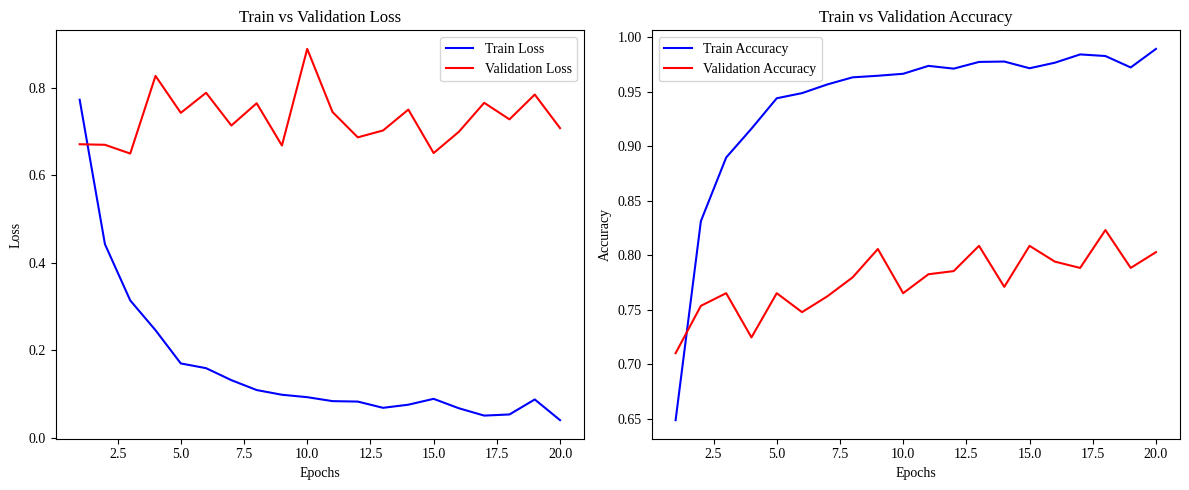

Classification Report:
                precision    recall  f1-score   support

        Eczema       0.82      0.86      0.84       139
     Psoriasis       0.76      0.66      0.70        56
Tinea_Ringworm       0.87      0.87      0.87       150

      accuracy                           0.83       345
     macro avg       0.81      0.79      0.80       345
  weighted avg       0.83      0.83      0.83       345

Confusion Matrix:


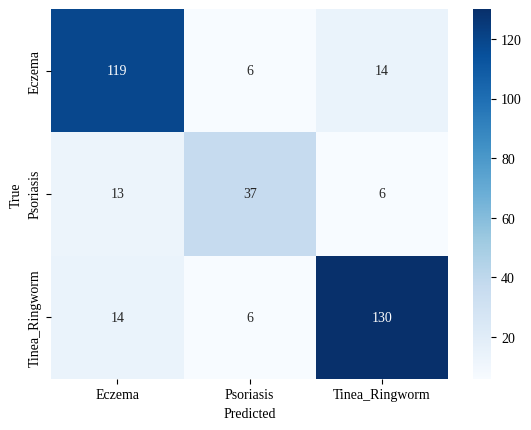

In [3]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, WeightedRandomSampler
from transformers import ViTForImageClassification, ViTFeatureExtractor
import timm
import os
from collections import Counter
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random
from matplotlib import font_manager as fm
font_path = "/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf"

# ✅ Force-add the font
fm.fontManager.addfont(font_path)

# ✅ Create a font properties object
liberation_font = fm.FontProperties(fname=font_path)
# ✅ Apply the font globally to all plots
plt.rcParams['font.family'] = liberation_font.get_name()

# ------------------- Config ------------------- #
DATA_DIR = '/mnt/c/Users/pragy/Downloads/Dataset/SD260/Split_Dataset'  # should have train/val/test folders
BATCH_SIZE = 32
NUM_CLASSES = 3
NUM_EPOCHS = 20

MODEL_NAME = 'inception_v3'  # one of: resnet50, efficientnet_b0, inception_v3, convnext_tiny, vit_b_16, swin_tiny

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(42)
if MODEL_NAME == 'inception_v3':
    image_size = 299
else:
    image_size = 224
# ------------------- Transforms ------------------- #
train_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize([0.5439, 0.4471, 0.4324], [0.2387, 0.2132, 0.2141])
])
val_test_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.5439, 0.4471, 0.4324], [0.2387, 0.2132, 0.2141])
])


# ------------------- Dataset ------------------- #
train_dataset = ImageFolder(os.path.join(DATA_DIR, 'train'), transform=train_transform)
val_dataset = ImageFolder(os.path.join(DATA_DIR, 'val'), transform=val_test_transform)
test_dataset = ImageFolder(os.path.join(DATA_DIR, 'test'), transform=val_test_transform)

# ------------------- DataLoader ------------------- #
# Weighted sampling to handle class imbalance
class_counts = [count for _, count in Counter(train_dataset.targets).items()]
class_weights = 1. / np.array(class_counts, dtype=np.float32)
weights = class_weights[train_dataset.targets]

sampler = WeightedRandomSampler(weights, len(weights))

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# ------------------- Model ------------------- #
def get_model(model_name):
    if model_name == 'resnet50':
        model = models.resnet50(pretrained=True)
        model.fc = torch.nn.Linear(model.fc.in_features, NUM_CLASSES)
    elif model_name == 'efficientnet_b0':
        model = timm.create_model('efficientnet_b0', pretrained=True)
        model.classifier = torch.nn.Linear(model.classifier.in_features, NUM_CLASSES)
    elif model_name == 'inception_v3':
        model = models.inception_v3(pretrained=True,aux_logits=True)
        model.AuxLogits.fc = torch.nn.Linear(model.AuxLogits.fc.in_features, NUM_CLASSES)
        model.fc = torch.nn.Linear(model.fc.in_features, NUM_CLASSES)

        
    elif model_name == 'vit_b_16':
        model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224-in21k", num_labels=NUM_CLASSES)

    else:
        raise ValueError("Model name not recognized")
    
    return model

# Load model
model = get_model(MODEL_NAME).to(DEVICE)

# ------------------- Loss and Optimizer ------------------- #
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


# ------------------- Training Function with Loss and Accuracy Per Epoch ------------------- #
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    best_model_wts = model.state_dict()
    best_acc = 0.0

    # Lists to store the loss and accuracy values per epoch
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0

        # Training loop
        for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()

            outputs = model(inputs)
            if isinstance(outputs, tuple):
                outputs = outputs[0]

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Track accuracy
            _, preds = torch.max(outputs, 1)
            correct_preds += torch.sum(preds == labels).item()
            total_preds += labels.size(0)
            running_loss += loss.item()

        # Calculate average training loss and accuracy for the epoch
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct_preds / total_preds

        # Append values for the current epoch
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_acc:.4f}")

        # Validation loop
        model.eval()
        val_loss = 0.0
        val_correct_preds = 0
        val_total_preds = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                # Track accuracy
                _, preds = torch.max(outputs, 1)
                val_correct_preds += torch.sum(preds == labels).item()
                val_total_preds += labels.size(0)
                val_loss += loss.item()

        # Calculate average validation loss and accuracy for the epoch
        val_epoch_loss = val_loss / len(val_loader)
        val_epoch_acc = val_correct_preds / val_total_preds

        # Append values for the current epoch
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc)

        print(f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_acc:.4f}")

        # Save the best model
        if val_epoch_acc > best_acc:
            best_acc = val_epoch_acc
            best_model_wts = model.state_dict()

    # Load the best model weights
    model.load_state_dict(best_model_wts)

    # Return model and the lists of losses and accuracies
    return model, train_losses, val_losses, train_accuracies, val_accuracies

# ------------------- Training the Model ------------------- #
start_time = time.time()
trained_model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, criterion, optimizer, NUM_EPOCHS
)
end_time = time.time()
training_duration = end_time - start_time

print(f"\n✅ Total Training Time: {training_duration:.2f} seconds ({training_duration/60:.2f} minutes)")
# ------------------- Plotting Loss and Accuracy ------------------- #
def plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, NUM_EPOCHS + 1)

    # Plot Training and Validation Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss', color='blue')
    plt.plot(epochs, val_losses, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train vs Validation Loss')
    plt.legend()

    # Plot Training and Validation Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy', color='blue')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train vs Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# ------------------- Plot Loss and Accuracy ------------------- #
plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies)

# ------------------- Evaluate on Test Set ------------------- #
def evaluate_model(model, test_loader):
    model.eval()
    test_preds = []
    test_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            test_preds.extend(preds.cpu().numpy())
            test_labels.extend(labels.cpu().numpy())

    print("Classification Report:")
    print(classification_report(test_labels, test_preds, target_names=test_loader.dataset.classes))

    print("Confusion Matrix:")
    cm = confusion_matrix(test_labels, test_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_loader.dataset.classes, yticklabels=test_loader.dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
torch.save(model.state_dict(), '/mnt/c/Users/pragy/Downloads/Dataset/SD260/Models/inception_v3.pth')
evaluate_model(trained_model, test_loader)


/home/pragya/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/pragya/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Epoch 1/10


100%|█████████████████████████████████████████████████████████████████████████████████| 113/113 [01:02<00:00,  1.82it/s]


Train Loss: 0.6554, Acc: 0.7217
Val   Loss: 0.7131, Acc: 0.7217

Epoch 2/10


100%|█████████████████████████████████████████████████████████████████████████████████| 113/113 [01:01<00:00,  1.83it/s]


Train Loss: 0.4075, Acc: 0.8414
Val   Loss: 0.7955, Acc: 0.7159

Epoch 3/10


100%|█████████████████████████████████████████████████████████████████████████████████| 113/113 [01:01<00:00,  1.83it/s]


Train Loss: 0.2958, Acc: 0.8895
Val   Loss: 0.7126, Acc: 0.7420

Epoch 4/10


100%|█████████████████████████████████████████████████████████████████████████████████| 113/113 [01:01<00:00,  1.83it/s]


Train Loss: 0.2019, Acc: 0.9253
Val   Loss: 0.6730, Acc: 0.7855

Epoch 5/10


100%|█████████████████████████████████████████████████████████████████████████████████| 113/113 [01:01<00:00,  1.82it/s]


Train Loss: 0.1621, Acc: 0.9408
Val   Loss: 0.8603, Acc: 0.7449

Epoch 6/10


100%|█████████████████████████████████████████████████████████████████████████████████| 113/113 [01:01<00:00,  1.83it/s]


Train Loss: 0.1573, Acc: 0.9425
Val   Loss: 0.6815, Acc: 0.7884

Epoch 7/10


100%|█████████████████████████████████████████████████████████████████████████████████| 113/113 [01:01<00:00,  1.82it/s]


Train Loss: 0.1182, Acc: 0.9597
Val   Loss: 0.8781, Acc: 0.7826

Epoch 8/10


100%|█████████████████████████████████████████████████████████████████████████████████| 113/113 [01:02<00:00,  1.82it/s]


Train Loss: 0.0889, Acc: 0.9692
Val   Loss: 0.7218, Acc: 0.8174

Epoch 9/10


100%|█████████████████████████████████████████████████████████████████████████████████| 113/113 [01:01<00:00,  1.83it/s]


Train Loss: 0.0795, Acc: 0.9708
Val   Loss: 0.7772, Acc: 0.7681

Epoch 10/10


100%|█████████████████████████████████████████████████████████████████████████████████| 113/113 [01:02<00:00,  1.82it/s]


Train Loss: 0.1081, Acc: 0.9628
Val   Loss: 0.8510, Acc: 0.7913

✅ Model saved to /mnt/c/Users/pragy/Downloads/Dataset/SD260/Augmented_Dataset/trained_models/resnet50_final.pth


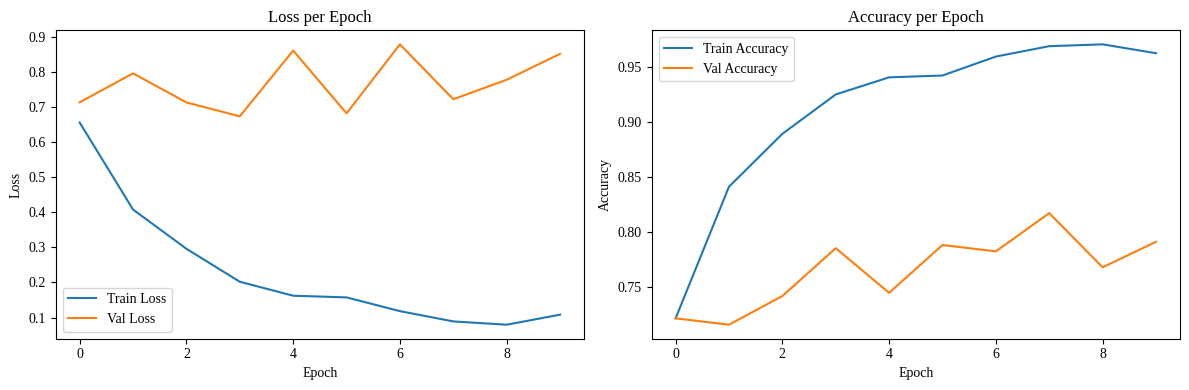


Classification Report:
                precision    recall  f1-score   support

        Eczema       0.78      0.86      0.82       139
     Psoriasis       0.72      0.52      0.60        56
Tinea_Ringworm       0.85      0.86      0.85       150

      accuracy                           0.81       345
     macro avg       0.79      0.75      0.76       345
  weighted avg       0.80      0.81      0.80       345



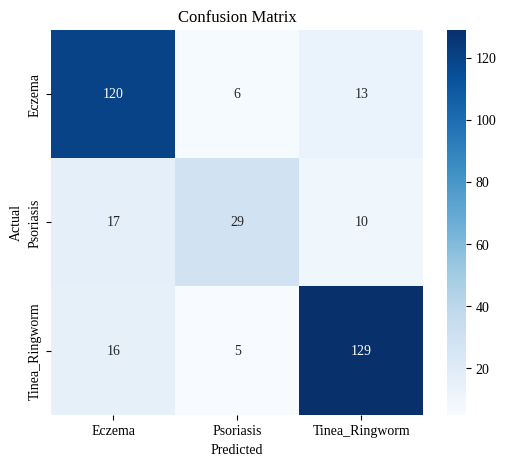

In [12]:
model = get_model(MODEL_NAME, NUM_CLASSES)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

save_dir = os.path.join(DATA_DIR, 'trained_models')

history = train_model_full(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    criterion=loss_fn,
    optimizer=optimizer,
    num_epochs=NUM_EPOCHS,
    model_name=MODEL_NAME,
    save_dir=save_dir
)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:30<00:00,  1.04s/it]


Epoch 1/20, Train Loss: 0.7552, Train Accuracy: 0.6806
Validation Loss: 0.8344, Validation Accuracy: 0.6348


Epoch 2/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:29<00:00,  1.03s/it]


Epoch 2/20, Train Loss: 0.4443, Train Accuracy: 0.8405
Validation Loss: 0.6397, Validation Accuracy: 0.7536


Epoch 3/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:30<00:00,  1.04s/it]


Epoch 3/20, Train Loss: 0.2957, Train Accuracy: 0.8992
Validation Loss: 0.5884, Validation Accuracy: 0.7710


Epoch 4/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:29<00:00,  1.02s/it]


Epoch 4/20, Train Loss: 0.2177, Train Accuracy: 0.9315
Validation Loss: 0.7003, Validation Accuracy: 0.7594


Epoch 5/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:30<00:00,  1.04s/it]


Epoch 5/20, Train Loss: 0.2049, Train Accuracy: 0.9297
Validation Loss: 0.6474, Validation Accuracy: 0.7913


Epoch 6/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:29<00:00,  1.03s/it]


Epoch 6/20, Train Loss: 0.1242, Train Accuracy: 0.9627
Validation Loss: 0.6928, Validation Accuracy: 0.7826


Epoch 7/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:29<00:00,  1.03s/it]


Epoch 7/20, Train Loss: 0.1155, Train Accuracy: 0.9637
Validation Loss: 0.5890, Validation Accuracy: 0.8116


Epoch 8/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:30<00:00,  1.04s/it]


Epoch 8/20, Train Loss: 0.0676, Train Accuracy: 0.9822
Validation Loss: 0.5232, Validation Accuracy: 0.8377


Epoch 9/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:30<00:00,  1.04s/it]


Epoch 9/20, Train Loss: 0.0486, Train Accuracy: 0.9873
Validation Loss: 0.7812, Validation Accuracy: 0.7913


Epoch 10/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:30<00:00,  1.04s/it]


Epoch 10/20, Train Loss: 0.1025, Train Accuracy: 0.9688
Validation Loss: 0.5694, Validation Accuracy: 0.8000


Epoch 11/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:30<00:00,  1.03s/it]


Epoch 11/20, Train Loss: 0.0425, Train Accuracy: 0.9888
Validation Loss: 0.6687, Validation Accuracy: 0.8145


Epoch 12/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:30<00:00,  1.04s/it]


Epoch 12/20, Train Loss: 0.0374, Train Accuracy: 0.9880
Validation Loss: 0.6785, Validation Accuracy: 0.8000


Epoch 13/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:30<00:00,  1.04s/it]


Epoch 13/20, Train Loss: 0.0736, Train Accuracy: 0.9790
Validation Loss: 0.8954, Validation Accuracy: 0.7623


Epoch 14/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:30<00:00,  1.04s/it]


Epoch 14/20, Train Loss: 0.0672, Train Accuracy: 0.9775
Validation Loss: 0.6989, Validation Accuracy: 0.8000


Epoch 15/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:29<00:00,  1.03s/it]


Epoch 15/20, Train Loss: 0.0464, Train Accuracy: 0.9844
Validation Loss: 0.7593, Validation Accuracy: 0.7768


Epoch 16/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:30<00:00,  1.04s/it]


Epoch 16/20, Train Loss: 0.0319, Train Accuracy: 0.9909
Validation Loss: 0.7578, Validation Accuracy: 0.8203


Epoch 17/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:30<00:00,  1.04s/it]


Epoch 17/20, Train Loss: 0.0206, Train Accuracy: 0.9949
Validation Loss: 0.7000, Validation Accuracy: 0.8203


Epoch 18/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:31<00:00,  1.05s/it]


Epoch 18/20, Train Loss: 0.0440, Train Accuracy: 0.9848
Validation Loss: 0.6971, Validation Accuracy: 0.8087


Epoch 19/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:30<00:00,  1.04s/it]


Epoch 19/20, Train Loss: 0.0539, Train Accuracy: 0.9862
Validation Loss: 0.7224, Validation Accuracy: 0.7971


Epoch 20/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:30<00:00,  1.04s/it]


Epoch 20/20, Train Loss: 0.0399, Train Accuracy: 0.9869
Validation Loss: 0.7013, Validation Accuracy: 0.8116

✅ Total Training Time: 1928.03 seconds (32.13 minutes)


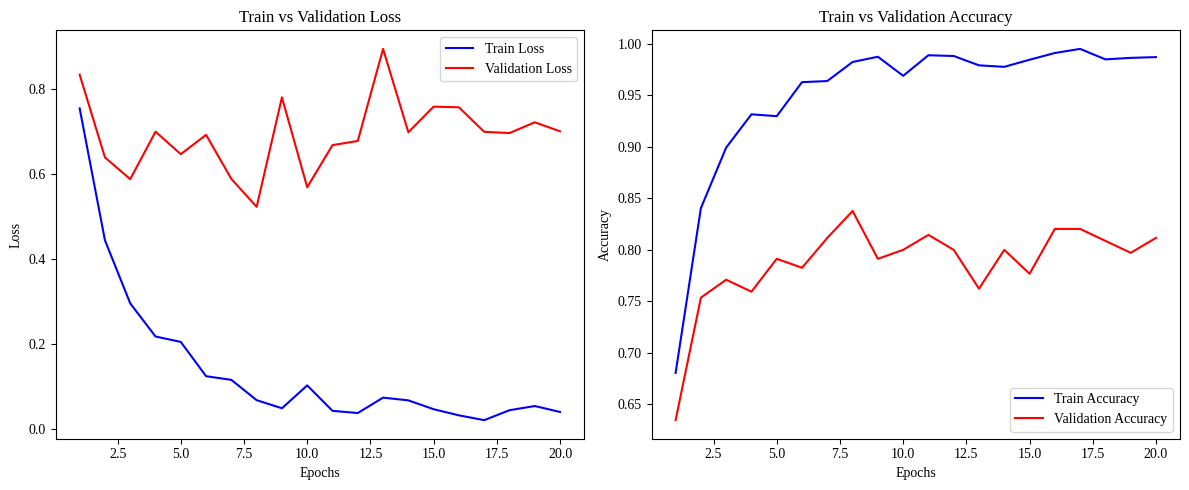

Classification Report:
                precision    recall  f1-score   support

        Eczema       0.76      0.80      0.78       139
     Psoriasis       0.77      0.54      0.63        56
Tinea_Ringworm       0.82      0.88      0.85       150

      accuracy                           0.79       345
     macro avg       0.78      0.74      0.75       345
  weighted avg       0.79      0.79      0.79       345

Confusion Matrix:


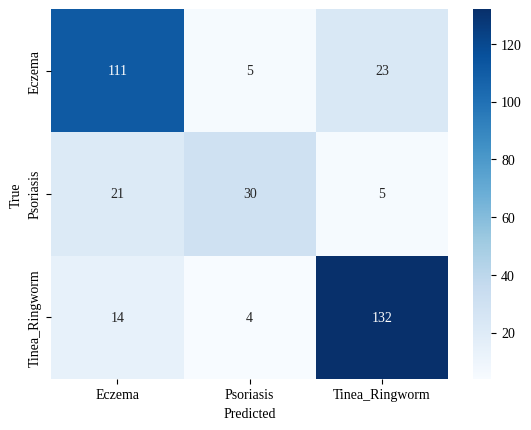

In [4]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, WeightedRandomSampler
from transformers import ViTForImageClassification, ViTFeatureExtractor
import timm
import os
from collections import Counter
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random
from matplotlib import font_manager as fm
font_path = "/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf"

# ✅ Force-add the font
fm.fontManager.addfont(font_path)

# ✅ Create a font properties object
liberation_font = fm.FontProperties(fname=font_path)
# ✅ Apply the font globally to all plots
plt.rcParams['font.family'] = liberation_font.get_name()

# ------------------- Config ------------------- #
DATA_DIR = '/mnt/c/Users/pragy/Downloads/Dataset/SD260/Split_Dataset'  # should have train/val/test folders
BATCH_SIZE = 32
NUM_CLASSES = 3
NUM_EPOCHS = 20

MODEL_NAME = 'vit_b_16'  # one of: resnet50, efficientnet_b0, inception_v3, convnext_tiny, vit_b_16, swin_tiny

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(42)
if MODEL_NAME == 'inception_v3':
    image_size = 299
else:
    image_size = 224
# ------------------- Transforms ------------------- #
train_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize([0.5439, 0.4471, 0.4324], [0.2387, 0.2132, 0.2141])
])
val_test_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.5439, 0.4471, 0.4324], [0.2387, 0.2132, 0.2141])
])


# ------------------- Dataset ------------------- #
train_dataset = ImageFolder(os.path.join(DATA_DIR, 'train'), transform=train_transform)
val_dataset = ImageFolder(os.path.join(DATA_DIR, 'val'), transform=val_test_transform)
test_dataset = ImageFolder(os.path.join(DATA_DIR, 'test'), transform=val_test_transform)

# ------------------- DataLoader ------------------- #
# Weighted sampling to handle class imbalance
class_counts = [count for _, count in Counter(train_dataset.targets).items()]
class_weights = 1. / np.array(class_counts, dtype=np.float32)
weights = class_weights[train_dataset.targets]

sampler = WeightedRandomSampler(weights, len(weights))

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# ------------------- Model ------------------- #
def get_model(model_name):
    if model_name == 'resnet50':
        model = models.resnet50(pretrained=True)
        model.fc = torch.nn.Linear(model.fc.in_features, NUM_CLASSES)
    elif model_name == 'efficientnet_b0':
        model = timm.create_model('efficientnet_b0', pretrained=True)
        model.classifier = torch.nn.Linear(model.classifier.in_features, NUM_CLASSES)
    elif model_name == 'inception_v3':
        model = models.inception_v3(pretrained=True,aux_logits=True)
        model.AuxLogits.fc = torch.nn.Linear(model.AuxLogits.fc.in_features, NUM_CLASSES)
        model.fc = torch.nn.Linear(model.fc.in_features, NUM_CLASSES)
    elif model_name == 'convnext_tiny':
        model = timm.create_model('convnext_tiny', pretrained=True, num_classes=NUM_CLASSES)
        
    elif model_name == 'vit_b_16':
        model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224-in21k", num_labels=NUM_CLASSES)
    elif model_name == 'swin_tiny':
        model = timm.create_model('swin_tiny_patch4_window7_224', pretrained=True)
        model.head = torch.nn.Linear(model.head.in_features, NUM_CLASSES)
    else:
        raise ValueError("Model name not recognized")
    
    return model

# Load model
model = get_model(MODEL_NAME).to(DEVICE)

# ------------------- Loss and Optimizer ------------------- #
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)



# ------------------- Training Function with Loss and Accuracy Per Epoch ------------------- #
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    best_model_wts = model.state_dict()
    best_acc = 0.0

    # Lists to store the loss and accuracy values per epoch
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0

        # Training loop
        for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()

            outputs = model(inputs)
            logits = outputs.logits  # <-- extract logits

            loss = criterion(logits, labels)
            loss.backward()
            optimizer.step()

            # Track accuracy
            _, preds = torch.max(logits, 1)  # <-- use logits, not outputs
            correct_preds += torch.sum(preds == labels).item()
            total_preds += labels.size(0)
            running_loss += loss.item()

        # Calculate average training loss and accuracy for the epoch
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct_preds / total_preds

        # Append values for the current epoch
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_acc:.4f}")

        # Validation loop
        model.eval()
        val_loss = 0.0
        val_correct_preds = 0
        val_total_preds = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                logits = outputs.logits  # <-- extract logits

                loss = criterion(logits, labels)

                # Track accuracy
                _, preds = torch.max(logits, 1)  # <-- use logits
                val_correct_preds += torch.sum(preds == labels).item()
                val_total_preds += labels.size(0)
                val_loss += loss.item()

        # Calculate average validation loss and accuracy for the epoch
        val_epoch_loss = val_loss / len(val_loader)
        val_epoch_acc = val_correct_preds / val_total_preds

        # Append values for the current epoch
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc)

        print(f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_acc:.4f}")

        # Save the best model
        if val_epoch_acc > best_acc:
            best_acc = val_epoch_acc
            best_model_wts = model.state_dict()

    # Load the best model weights
    model.load_state_dict(best_model_wts)

    # Return model and the lists of losses and accuracies
    return model, train_losses, val_losses, train_accuracies, val_accuracies

# ------------------- Training the Model ------------------- #
start_time = time.time()
trained_model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, criterion, optimizer, NUM_EPOCHS
)
end_time = time.time()
training_duration = end_time - start_time

print(f"\n✅ Total Training Time: {training_duration:.2f} seconds ({training_duration/60:.2f} minutes)")
# ------------------- Plotting Loss and Accuracy ------------------- #
def plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, NUM_EPOCHS + 1)

    # Plot Training and Validation Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss', color='blue')
    plt.plot(epochs, val_losses, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train vs Validation Loss')
    plt.legend()

    # Plot Training and Validation Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy', color='blue')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train vs Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# ------------------- Plot Loss and Accuracy ------------------- #
plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies)

# ------------------- Evaluate on Test Set ------------------- #
def evaluate_model(model, test_loader):
    model.eval()
    test_preds = []
    test_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            logits = outputs.logits
            _, preds = torch.max(logits, 1)

            test_preds.extend(preds.cpu().numpy())
            test_labels.extend(labels.cpu().numpy())

    print("Classification Report:")
    print(classification_report(test_labels, test_preds, target_names=test_loader.dataset.classes))

    print("Confusion Matrix:")
    cm = confusion_matrix(test_labels, test_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_loader.dataset.classes, yticklabels=test_loader.dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
torch.save(model.state_dict(), '/mnt/c/Users/pragy/Downloads/Dataset/SD260/Models/vit_b_16.pth')
evaluate_model(trained_model, test_loader)


Epoch 1/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:38<00:00,  2.29it/s]


Epoch 1/20, Train Loss: 1.0718, Train Accuracy: 0.4543
Validation Loss: 1.0560, Validation Accuracy: 0.4667


Epoch 2/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:38<00:00,  2.26it/s]


Epoch 2/20, Train Loss: 0.9596, Train Accuracy: 0.5413
Validation Loss: 0.9845, Validation Accuracy: 0.5275


Epoch 3/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:38<00:00,  2.27it/s]


Epoch 3/20, Train Loss: 0.9042, Train Accuracy: 0.5732
Validation Loss: 0.9852, Validation Accuracy: 0.5217


Epoch 4/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:38<00:00,  2.25it/s]


Epoch 4/20, Train Loss: 0.8567, Train Accuracy: 0.6265
Validation Loss: 0.9664, Validation Accuracy: 0.5420


Epoch 5/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:38<00:00,  2.25it/s]


Epoch 5/20, Train Loss: 0.8536, Train Accuracy: 0.6175
Validation Loss: 0.9120, Validation Accuracy: 0.5681


Epoch 6/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:37<00:00,  2.29it/s]


Epoch 6/20, Train Loss: 0.8179, Train Accuracy: 0.6429
Validation Loss: 0.8987, Validation Accuracy: 0.5884


Epoch 7/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:38<00:00,  2.27it/s]


Epoch 7/20, Train Loss: 0.7918, Train Accuracy: 0.6610
Validation Loss: 0.9275, Validation Accuracy: 0.5710


Epoch 8/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:37<00:00,  2.29it/s]


Epoch 8/20, Train Loss: 0.7768, Train Accuracy: 0.6624
Validation Loss: 0.8506, Validation Accuracy: 0.6087


Epoch 9/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:38<00:00,  2.28it/s]


Epoch 9/20, Train Loss: 0.7652, Train Accuracy: 0.6642
Validation Loss: 0.8496, Validation Accuracy: 0.6203


Epoch 10/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:38<00:00,  2.27it/s]


Epoch 10/20, Train Loss: 0.7592, Train Accuracy: 0.6708
Validation Loss: 0.8702, Validation Accuracy: 0.6116


Epoch 11/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:37<00:00,  2.30it/s]


Epoch 11/20, Train Loss: 0.7578, Train Accuracy: 0.6711
Validation Loss: 0.8927, Validation Accuracy: 0.6029


Epoch 12/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:37<00:00,  2.30it/s]


Epoch 12/20, Train Loss: 0.7438, Train Accuracy: 0.6976
Validation Loss: 0.8293, Validation Accuracy: 0.6261


Epoch 13/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:37<00:00,  2.29it/s]


Epoch 13/20, Train Loss: 0.7101, Train Accuracy: 0.7030
Validation Loss: 0.8366, Validation Accuracy: 0.6319


Epoch 14/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:37<00:00,  2.31it/s]


Epoch 14/20, Train Loss: 0.7109, Train Accuracy: 0.7038
Validation Loss: 0.8399, Validation Accuracy: 0.6319


Epoch 15/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:37<00:00,  2.35it/s]


Epoch 15/20, Train Loss: 0.7049, Train Accuracy: 0.7041
Validation Loss: 0.8231, Validation Accuracy: 0.6377


Epoch 16/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:37<00:00,  2.31it/s]


Epoch 16/20, Train Loss: 0.6936, Train Accuracy: 0.7143
Validation Loss: 0.8199, Validation Accuracy: 0.6290


Epoch 17/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:37<00:00,  2.33it/s]


Epoch 17/20, Train Loss: 0.6839, Train Accuracy: 0.7107
Validation Loss: 0.7998, Validation Accuracy: 0.6261


Epoch 18/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:38<00:00,  2.28it/s]


Epoch 18/20, Train Loss: 0.6950, Train Accuracy: 0.7096
Validation Loss: 0.7853, Validation Accuracy: 0.6522


Epoch 19/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:40<00:00,  2.14it/s]


Epoch 19/20, Train Loss: 0.6599, Train Accuracy: 0.7223
Validation Loss: 0.7853, Validation Accuracy: 0.6377


Epoch 20/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:39<00:00,  2.20it/s]


Epoch 20/20, Train Loss: 0.6730, Train Accuracy: 0.7204
Validation Loss: 0.8070, Validation Accuracy: 0.6406

✅ Total Training Time: 860.13 seconds (14.34 minutes)


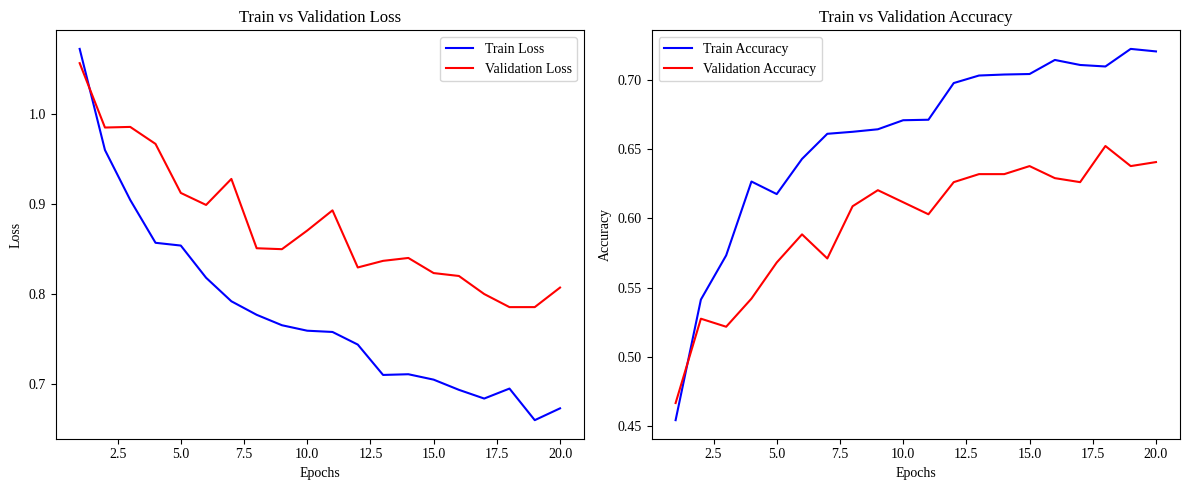

Classification Report:
                precision    recall  f1-score   support

        Eczema       0.72      0.77      0.75       139
     Psoriasis       0.49      0.75      0.60        56
Tinea_Ringworm       0.80      0.60      0.69       150

      accuracy                           0.69       345
     macro avg       0.67      0.71      0.68       345
  weighted avg       0.72      0.69      0.70       345

Confusion Matrix:


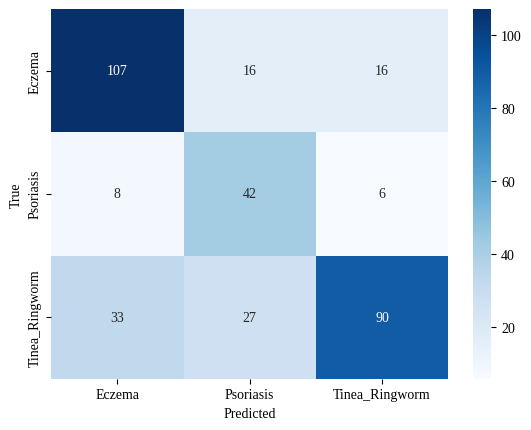

In [5]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, WeightedRandomSampler
from transformers import ViTForImageClassification, ViTFeatureExtractor
import timm
import os
from collections import Counter
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random
from matplotlib import font_manager as fm
font_path = "/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf"

# ✅ Force-add the font
fm.fontManager.addfont(font_path)

# ✅ Create a font properties object
liberation_font = fm.FontProperties(fname=font_path)
# ✅ Apply the font globally to all plots
plt.rcParams['font.family'] = liberation_font.get_name()

# ------------------- Config ------------------- #
DATA_DIR = '/mnt/c/Users/pragy/Downloads/Dataset/SD260/Split_Dataset'  # should have train/val/test folders
BATCH_SIZE = 32
NUM_CLASSES = 3
NUM_EPOCHS = 20

MODEL_NAME = 'convnext_tiny'  # one of: resnet50, efficientnet_b0, inception_v3, convnext_tiny, vit_b_16, swin_tiny

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(42)
if MODEL_NAME == 'inception_v3':
    image_size = 299
else:
    image_size = 224
# ------------------- Transforms ------------------- #
train_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize([0.5439, 0.4471, 0.4324], [0.2387, 0.2132, 0.2141])
])
val_test_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.5439, 0.4471, 0.4324], [0.2387, 0.2132, 0.2141])
])


# ------------------- Dataset ------------------- #
train_dataset = ImageFolder(os.path.join(DATA_DIR, 'train'), transform=train_transform)
val_dataset = ImageFolder(os.path.join(DATA_DIR, 'val'), transform=val_test_transform)
test_dataset = ImageFolder(os.path.join(DATA_DIR, 'test'), transform=val_test_transform)

# ------------------- DataLoader ------------------- #
# Weighted sampling to handle class imbalance
class_counts = [count for _, count in Counter(train_dataset.targets).items()]
class_weights = 1. / np.array(class_counts, dtype=np.float32)
weights = class_weights[train_dataset.targets]

sampler = WeightedRandomSampler(weights, len(weights))

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# ------------------- Model ------------------- #
def freeze_model_except_head(model):
    for param in model.parameters():
        param.requires_grad = False
    # Unfreeze head (classifier or fc depending on model)
    if hasattr(model, 'head'):
        for param in model.head.parameters():
            param.requires_grad = True
    elif hasattr(model, 'classifier'):
        for param in model.classifier.parameters():
            param.requires_grad = True
    elif hasattr(model, 'fc'):
        for param in model.fc.parameters():
            param.requires_grad = True
    elif hasattr(model, 'AuxLogits'):
        for param in model.AuxLogits.parameters():
            param.requires_grad = True

def get_model(model_name, freeze=False):
    if model_name == 'resnet50':
        model = models.resnet50(pretrained=True)
        model.fc = torch.nn.Linear(model.fc.in_features, NUM_CLASSES)

    elif model_name == 'efficientnet_b0':
        model = timm.create_model('efficientnet_b0', pretrained=True)
        model.classifier = torch.nn.Linear(model.classifier.in_features, NUM_CLASSES)

    elif model_name == 'inception_v3':
        model = models.inception_v3(pretrained=True, aux_logits=True)
        model.AuxLogits.fc = torch.nn.Linear(model.AuxLogits.fc.in_features, NUM_CLASSES)
        model.fc = torch.nn.Linear(model.fc.in_features, NUM_CLASSES)

    elif model_name == 'vit_b_16':
        model = ViTForImageClassification.from_pretrained(
            "google/vit-base-patch16-224-in21k", num_labels=NUM_CLASSES
        )

    elif model_name == 'convnext_tiny':
        model = timm.create_model('convnext_tiny', pretrained=True, num_classes=NUM_CLASSES)

    elif model_name == 'swin_tiny':
        model = timm.create_model('swin_tiny_patch4_window7_224', pretrained=True)
        model.head = torch.nn.Linear(model.head.in_features, NUM_CLASSES)

    elif model_name == 'deit_small':
        model = timm.create_model('deit_small_patch16_224', pretrained=True)
        model.head = torch.nn.Linear(model.head.in_features, NUM_CLASSES)

    else:
        raise ValueError("Model name not recognized")

    if freeze:
        freeze_model_except_head(model)

    return model



# Load model
model = get_model(MODEL_NAME, freeze=True).to(DEVICE)

# ------------------- Loss and Optimizer ------------------- #
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)



# ------------------- Training Function with Loss and Accuracy Per Epoch ------------------- #
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    best_model_wts = model.state_dict()
    best_acc = 0.0

    # Lists to store the loss and accuracy values per epoch
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0

        # Training loop
        for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()

            outputs = model(inputs)
            logits = outputs  # <-- extract logits

            loss = criterion(logits, labels)
            loss.backward()
            optimizer.step()

            # Track accuracy
            _, preds = torch.max(logits, 1)  # <-- use logits, not outputs
            correct_preds += torch.sum(preds == labels).item()
            total_preds += labels.size(0)
            running_loss += loss.item()

        # Calculate average training loss and accuracy for the epoch
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct_preds / total_preds

        # Append values for the current epoch
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_acc:.4f}")

        # Validation loop
        model.eval()
        val_loss = 0.0
        val_correct_preds = 0
        val_total_preds = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                logits = outputs # <-- extract logits

                loss = criterion(logits, labels)

                # Track accuracy
                _, preds = torch.max(logits, 1)  # <-- use logits
                val_correct_preds += torch.sum(preds == labels).item()
                val_total_preds += labels.size(0)
                val_loss += loss.item()

        # Calculate average validation loss and accuracy for the epoch
        val_epoch_loss = val_loss / len(val_loader)
        val_epoch_acc = val_correct_preds / val_total_preds

        # Append values for the current epoch
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc)

        print(f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_acc:.4f}")

        # Save the best model
        if val_epoch_acc > best_acc:
            best_acc = val_epoch_acc
            best_model_wts = model.state_dict()

    # Load the best model weights
    model.load_state_dict(best_model_wts)

    # Return model and the lists of losses and accuracies
    return model, train_losses, val_losses, train_accuracies, val_accuracies

# ------------------- Training the Model ------------------- #
start_time = time.time()
trained_model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, criterion, optimizer, NUM_EPOCHS
)
end_time = time.time()
training_duration = end_time - start_time

print(f"\n✅ Total Training Time: {training_duration:.2f} seconds ({training_duration/60:.2f} minutes)")

# ------------------- Plotting Loss and Accuracy ------------------- #
def plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, NUM_EPOCHS + 1)

    # Plot Training and Validation Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss', color='blue')
    plt.plot(epochs, val_losses, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train vs Validation Loss')
    plt.legend()

    # Plot Training and Validation Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy', color='blue')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train vs Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# ------------------- Plot Loss and Accuracy ------------------- #
plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies)

# ------------------- Evaluate on Test Set ------------------- #
def evaluate_model(model, test_loader):
    model.eval()
    test_preds = []
    test_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            logits = outputs
            _, preds = torch.max(logits, 1)

            test_preds.extend(preds.cpu().numpy())
            test_labels.extend(labels.cpu().numpy())

    print("Classification Report:")
    print(classification_report(test_labels, test_preds, target_names=test_loader.dataset.classes))

    print("Confusion Matrix:")
    cm = confusion_matrix(test_labels, test_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_loader.dataset.classes, yticklabels=test_loader.dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
torch.save(model.state_dict(), '/mnt/c/Users/pragy/Downloads/Dataset/SD260/Models/convnext_tiny.pth')
evaluate_model(trained_model, test_loader)


Epoch 1/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:07<00:00,  1.28it/s]


Epoch 1 Train Loss: 1.0271, Train Accuracy: 0.5105
Validation Loss: 0.9497, Validation Accuracy: 0.5681


Epoch 2/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:07<00:00,  1.29it/s]


Epoch 2 Train Loss: 0.6592, Train Accuracy: 0.7288
Validation Loss: 0.7299, Validation Accuracy: 0.6928


Epoch 3/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:07<00:00,  1.30it/s]


Epoch 3 Train Loss: 0.4766, Train Accuracy: 0.8180
Validation Loss: 0.6149, Validation Accuracy: 0.7478


Epoch 4/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:08<00:00,  1.26it/s]


Epoch 4 Train Loss: 0.3290, Train Accuracy: 0.8800
Validation Loss: 0.5909, Validation Accuracy: 0.7884


Epoch 5/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:07<00:00,  1.29it/s]


Epoch 5 Train Loss: 0.2403, Train Accuracy: 0.9137
Validation Loss: 0.8222, Validation Accuracy: 0.7420


Epoch 6/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:18<00:00,  1.11it/s]


Epoch 6 Train Loss: 0.1602, Train Accuracy: 0.9431
Validation Loss: 0.9463, Validation Accuracy: 0.7594


Epoch 7/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:11<00:00,  1.21it/s]


Epoch 7 Train Loss: 0.1207, Train Accuracy: 0.9518
Validation Loss: 0.9540, Validation Accuracy: 0.7565


Epoch 8/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:06<00:00,  1.30it/s]


Epoch 8 Train Loss: 0.1053, Train Accuracy: 0.9637
Validation Loss: 0.8770, Validation Accuracy: 0.7565


Epoch 9/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:07<00:00,  1.30it/s]


Epoch 9 Train Loss: 0.1059, Train Accuracy: 0.9619
Validation Loss: 0.7301, Validation Accuracy: 0.7855


Epoch 10/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:08<00:00,  1.28it/s]


Epoch 10 Train Loss: 0.0770, Train Accuracy: 0.9753
Validation Loss: 0.8807, Validation Accuracy: 0.7681


Epoch 11/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:07<00:00,  1.28it/s]


Epoch 11 Train Loss: 0.0534, Train Accuracy: 0.9822
Validation Loss: 1.0919, Validation Accuracy: 0.7768


Epoch 12/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:10<00:00,  1.23it/s]


Epoch 12 Train Loss: 0.0689, Train Accuracy: 0.9772
Validation Loss: 0.7576, Validation Accuracy: 0.7942


Epoch 13/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:06<00:00,  1.30it/s]


Epoch 13 Train Loss: 0.0764, Train Accuracy: 0.9703
Validation Loss: 0.7715, Validation Accuracy: 0.7594


Epoch 14/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:06<00:00,  1.31it/s]


Epoch 14 Train Loss: 0.0459, Train Accuracy: 0.9848
Validation Loss: 0.7881, Validation Accuracy: 0.8029


Epoch 15/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:10<00:00,  1.24it/s]


Epoch 15 Train Loss: 0.0596, Train Accuracy: 0.9848
Validation Loss: 0.6985, Validation Accuracy: 0.7913


Epoch 16/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:08<00:00,  1.26it/s]


Epoch 16 Train Loss: 0.0341, Train Accuracy: 0.9884
Validation Loss: 0.8852, Validation Accuracy: 0.7884


Epoch 17/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:09<00:00,  1.26it/s]


Epoch 17 Train Loss: 0.0690, Train Accuracy: 0.9739
Validation Loss: 0.8538, Validation Accuracy: 0.7826


Epoch 18/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:09<00:00,  1.26it/s]


Epoch 18 Train Loss: 0.0442, Train Accuracy: 0.9873
Validation Loss: 0.9494, Validation Accuracy: 0.7623


Epoch 19/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:06<00:00,  1.30it/s]


Epoch 19 Train Loss: 0.0777, Train Accuracy: 0.9717
Validation Loss: 0.9353, Validation Accuracy: 0.7942


Epoch 20/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:07<00:00,  1.28it/s]


Epoch 20 Train Loss: 0.0449, Train Accuracy: 0.9851
Validation Loss: 0.9903, Validation Accuracy: 0.7855

✅ Total Training Time: 1474.23 seconds (24.57 minutes)


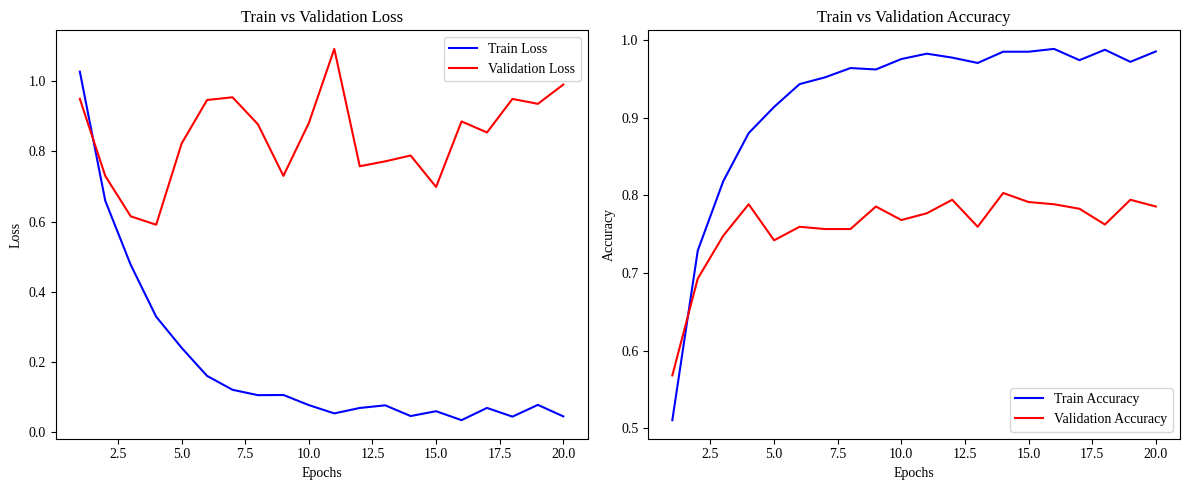

Classification Report:
                precision    recall  f1-score   support

        Eczema       0.72      0.91      0.80       139
     Psoriasis       0.71      0.61      0.65        56
Tinea_Ringworm       0.90      0.73      0.81       150

      accuracy                           0.78       345
     macro avg       0.78      0.75      0.76       345
  weighted avg       0.80      0.78      0.78       345

Confusion Matrix:


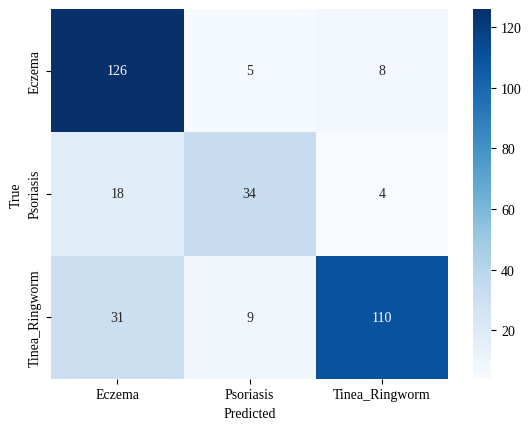

In [6]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, WeightedRandomSampler
from transformers import ViTForImageClassification, ViTFeatureExtractor
import timm
import os
from collections import Counter
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random
from matplotlib import font_manager as fm
font_path = "/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf"

# ✅ Force-add the font
fm.fontManager.addfont(font_path)

# ✅ Create a font properties object
liberation_font = fm.FontProperties(fname=font_path)
# ✅ Apply the font globally to all plots
plt.rcParams['font.family'] = liberation_font.get_name()

# ------------------- Config ------------------- #
DATA_DIR = '/mnt/c/Users/pragy/Downloads/Dataset/SD260/Split_Dataset'  # should have train/val/test folders
BATCH_SIZE = 32
NUM_CLASSES = 3
NUM_EPOCHS = 20

MODEL_NAME = 'convnext_tiny'  # one of: resnet50, efficientnet_b0, inception_v3, convnext_tiny, vit_b_16, swin_tiny

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(42)
if MODEL_NAME == 'inception_v3':
    image_size = 299
else:
    image_size = 224
# ------------------- Transforms ------------------- #
train_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize([0.5439, 0.4471, 0.4324], [0.2387, 0.2132, 0.2141])
])
val_test_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.5439, 0.4471, 0.4324], [0.2387, 0.2132, 0.2141])
])


# ------------------- Dataset ------------------- #
train_dataset = ImageFolder(os.path.join(DATA_DIR, 'train'), transform=train_transform)
val_dataset = ImageFolder(os.path.join(DATA_DIR, 'val'), transform=val_test_transform)
test_dataset = ImageFolder(os.path.join(DATA_DIR, 'test'), transform=val_test_transform)

# ------------------- DataLoader ------------------- #
# Weighted sampling to handle class imbalance
class_counts = [count for _, count in Counter(train_dataset.targets).items()]
class_weights = 1. / np.array(class_counts, dtype=np.float32)
weights = class_weights[train_dataset.targets]

sampler = WeightedRandomSampler(weights, len(weights))

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Load model
model = timm.create_model("convnext_tiny", pretrained=True, num_classes=NUM_CLASSES)
model = model.to(DEVICE)

# ------------------- Loss and Optimizer ------------------- #
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)



# ------------------- Training Function with Loss and Accuracy Per Epoch ------------------- #
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    best_model_wts = model.state_dict()
    best_acc = 0.0

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        correct_preds = 0
        total_preds = 0

        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            images, labels = images.to(DEVICE), labels.to(DEVICE)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_preds += (preds == labels).sum().item()
            total_preds += labels.size(0)

        train_loss = total_loss / len(train_loader)
        train_acc = correct_preds / total_preds
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)

        print(f"Epoch {epoch+1} Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(DEVICE), labels.to(DEVICE)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                val_correct += (preds == labels).sum().item()
                val_total += labels.size(0)

        val_loss_epoch = val_loss / len(val_loader)
        val_acc_epoch = val_correct / val_total
        val_losses.append(val_loss_epoch)
        val_accuracies.append(val_acc_epoch)

        print(f"Validation Loss: {val_loss_epoch:.4f}, Validation Accuracy: {val_acc_epoch:.4f}")

        if val_acc_epoch > best_acc:
            best_acc = val_acc_epoch
            best_model_wts = model.state_dict()

    model.load_state_dict(best_model_wts)
    return model, train_losses, val_losses, train_accuracies, val_accuracies

# ------------------- Training the Model ------------------- #
start_time = time.time()
trained_model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, criterion, optimizer, NUM_EPOCHS
)
end_time = time.time()
training_duration = end_time - start_time

print(f"\n✅ Total Training Time: {training_duration:.2f} seconds ({training_duration/60:.2f} minutes)")

# ------------------- Plotting Loss and Accuracy ------------------- #
def plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, NUM_EPOCHS + 1)

    # Plot Training and Validation Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss', color='blue')
    plt.plot(epochs, val_losses, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train vs Validation Loss')
    plt.legend()

    # Plot Training and Validation Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy', color='blue')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train vs Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# ------------------- Plot Loss and Accuracy ------------------- #
plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies)

# ------------------- Evaluate on Test Set ------------------- #
def evaluate_model(model, test_loader):
    model.eval()
    test_preds = []
    test_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            logits = outputs
            _, preds = torch.max(logits, 1)

            test_preds.extend(preds.cpu().numpy())
            test_labels.extend(labels.cpu().numpy())

    print("Classification Report:")
    print(classification_report(test_labels, test_preds, target_names=test_loader.dataset.classes))

    print("Confusion Matrix:")
    cm = confusion_matrix(test_labels, test_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_loader.dataset.classes, yticklabels=test_loader.dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
torch.save(model.state_dict(), '/mnt/c/Users/pragy/Downloads/Dataset/SD260/Models/convnext_tiny_f.pth')
evaluate_model(trained_model, test_loader)


Epoch 1/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:59<00:00,  1.47it/s]


Epoch 1 Train Loss: 0.7504, Train Accuracy: 0.6813
Validation Loss: 0.9065, Validation Accuracy: 0.6261


Epoch 2/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:58<00:00,  1.48it/s]


Epoch 2 Train Loss: 0.5277, Train Accuracy: 0.7959
Validation Loss: 0.6372, Validation Accuracy: 0.7362


Epoch 3/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:59<00:00,  1.47it/s]


Epoch 3 Train Loss: 0.3850, Train Accuracy: 0.8506
Validation Loss: 0.6224, Validation Accuracy: 0.7623


Epoch 4/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:58<00:00,  1.48it/s]


Epoch 4 Train Loss: 0.2817, Train Accuracy: 0.8880
Validation Loss: 0.7846, Validation Accuracy: 0.7449


Epoch 5/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:58<00:00,  1.48it/s]


Epoch 5 Train Loss: 0.2308, Train Accuracy: 0.9141
Validation Loss: 0.6290, Validation Accuracy: 0.7826


Epoch 6/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:58<00:00,  1.48it/s]


Epoch 6 Train Loss: 0.1719, Train Accuracy: 0.9358
Validation Loss: 0.6672, Validation Accuracy: 0.7884


Epoch 7/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:58<00:00,  1.48it/s]


Epoch 7 Train Loss: 0.1413, Train Accuracy: 0.9463
Validation Loss: 0.6855, Validation Accuracy: 0.8174


Epoch 8/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:59<00:00,  1.46it/s]


Epoch 8 Train Loss: 0.1134, Train Accuracy: 0.9623
Validation Loss: 0.6360, Validation Accuracy: 0.8203


Epoch 9/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:59<00:00,  1.47it/s]


Epoch 9 Train Loss: 0.0942, Train Accuracy: 0.9706
Validation Loss: 0.7280, Validation Accuracy: 0.8203


Epoch 10/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:58<00:00,  1.48it/s]


Epoch 10 Train Loss: 0.0931, Train Accuracy: 0.9652
Validation Loss: 0.6664, Validation Accuracy: 0.8174


Epoch 11/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:58<00:00,  1.48it/s]


Epoch 11 Train Loss: 0.0744, Train Accuracy: 0.9746
Validation Loss: 0.8919, Validation Accuracy: 0.7855


Epoch 12/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:59<00:00,  1.47it/s]


Epoch 12 Train Loss: 0.0563, Train Accuracy: 0.9793
Validation Loss: 0.7815, Validation Accuracy: 0.8348


Epoch 13/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:00<00:00,  1.43it/s]


Epoch 13 Train Loss: 0.0644, Train Accuracy: 0.9797
Validation Loss: 0.8603, Validation Accuracy: 0.8087


Epoch 14/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:01<00:00,  1.41it/s]


Epoch 14 Train Loss: 0.0621, Train Accuracy: 0.9768
Validation Loss: 0.7523, Validation Accuracy: 0.8058


Epoch 15/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:58<00:00,  1.49it/s]


Epoch 15 Train Loss: 0.0620, Train Accuracy: 0.9797
Validation Loss: 0.7965, Validation Accuracy: 0.8261


Epoch 16/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:59<00:00,  1.47it/s]


Epoch 16 Train Loss: 0.0450, Train Accuracy: 0.9837
Validation Loss: 0.8623, Validation Accuracy: 0.7971


Epoch 17/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:58<00:00,  1.48it/s]


Epoch 17 Train Loss: 0.0596, Train Accuracy: 0.9786
Validation Loss: 0.8111, Validation Accuracy: 0.8261


Epoch 18/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:59<00:00,  1.46it/s]


Epoch 18 Train Loss: 0.0449, Train Accuracy: 0.9866
Validation Loss: 0.9608, Validation Accuracy: 0.8058


Epoch 19/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:59<00:00,  1.47it/s]


Epoch 19 Train Loss: 0.0253, Train Accuracy: 0.9920
Validation Loss: 1.0663, Validation Accuracy: 0.8000


Epoch 20/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:59<00:00,  1.47it/s]


Epoch 20 Train Loss: 0.0777, Train Accuracy: 0.9724
Validation Loss: 0.6986, Validation Accuracy: 0.8435

✅ Total Training Time: 1285.00 seconds (21.42 minutes)


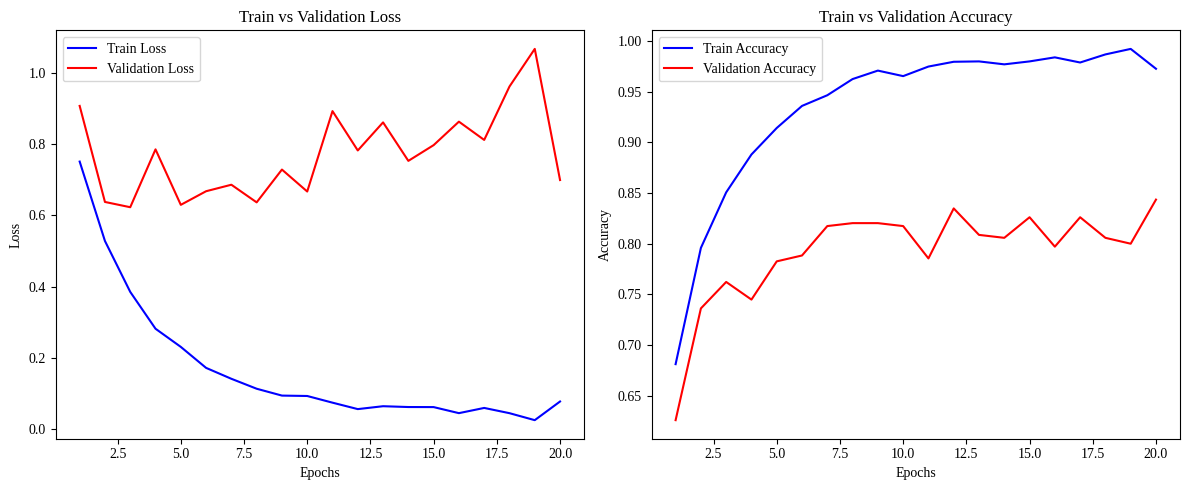

Classification Report:
                precision    recall  f1-score   support

        Eczema       0.82      0.88      0.85       139
     Psoriasis       0.74      0.62      0.68        56
Tinea_Ringworm       0.87      0.87      0.87       150

      accuracy                           0.83       345
     macro avg       0.81      0.79      0.80       345
  weighted avg       0.83      0.83      0.83       345

Confusion Matrix:


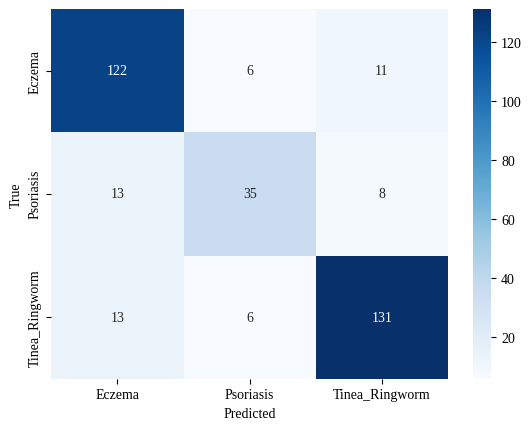

In [7]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, WeightedRandomSampler
from transformers import ViTForImageClassification, ViTFeatureExtractor
import timm
import os
from collections import Counter
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random
from matplotlib import font_manager as fm
font_path = "/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf"

# ✅ Force-add the font
fm.fontManager.addfont(font_path)

# ✅ Create a font properties object
liberation_font = fm.FontProperties(fname=font_path)
# ✅ Apply the font globally to all plots
plt.rcParams['font.family'] = liberation_font.get_name()

# ------------------- Config ------------------- #
DATA_DIR = '/mnt/c/Users/pragy/Downloads/Dataset/SD260/Split_Dataset'  # should have train/val/test folders
BATCH_SIZE = 32
NUM_CLASSES = 3
NUM_EPOCHS = 20

MODEL_NAME = 'swin_tiny'  # one of: resnet50, efficientnet_b0, inception_v3, convnext_tiny, vit_b_16, swin_tiny

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(42)
if MODEL_NAME == 'inception_v3':
    image_size = 299
else:
    image_size = 224
# ------------------- Transforms ------------------- #
train_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize([0.5439, 0.4471, 0.4324], [0.2387, 0.2132, 0.2141])
])
val_test_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.5439, 0.4471, 0.4324], [0.2387, 0.2132, 0.2141])
])


# ------------------- Dataset ------------------- #
train_dataset = ImageFolder(os.path.join(DATA_DIR, 'train'), transform=train_transform)
val_dataset = ImageFolder(os.path.join(DATA_DIR, 'val'), transform=val_test_transform)
test_dataset = ImageFolder(os.path.join(DATA_DIR, 'test'), transform=val_test_transform)

# ------------------- DataLoader ------------------- #
# Weighted sampling to handle class imbalance
class_counts = [count for _, count in Counter(train_dataset.targets).items()]
class_weights = 1. / np.array(class_counts, dtype=np.float32)
weights = class_weights[train_dataset.targets]

sampler = WeightedRandomSampler(weights, len(weights))

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Load model
model = timm.create_model("swin_tiny_patch4_window7_224", pretrained=True, num_classes=NUM_CLASSES)
model = model.to(DEVICE)

# ------------------- Loss and Optimizer ------------------- #
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)



# ------------------- Training Function with Loss and Accuracy Per Epoch ------------------- #
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    best_model_wts = model.state_dict()
    best_acc = 0.0

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        correct_preds = 0
        total_preds = 0

        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            images, labels = images.to(DEVICE), labels.to(DEVICE)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_preds += (preds == labels).sum().item()
            total_preds += labels.size(0)

        train_loss = total_loss / len(train_loader)
        train_acc = correct_preds / total_preds
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)

        print(f"Epoch {epoch+1} Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(DEVICE), labels.to(DEVICE)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                val_correct += (preds == labels).sum().item()
                val_total += labels.size(0)

        val_loss_epoch = val_loss / len(val_loader)
        val_acc_epoch = val_correct / val_total
        val_losses.append(val_loss_epoch)
        val_accuracies.append(val_acc_epoch)

        print(f"Validation Loss: {val_loss_epoch:.4f}, Validation Accuracy: {val_acc_epoch:.4f}")

        if val_acc_epoch > best_acc:
            best_acc = val_acc_epoch
            best_model_wts = model.state_dict()

    model.load_state_dict(best_model_wts)
    return model, train_losses, val_losses, train_accuracies, val_accuracies

# ------------------- Training the Model ------------------- #
start_time = time.time()
trained_model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, criterion, optimizer, NUM_EPOCHS
)
end_time = time.time()
training_duration = end_time - start_time

print(f"\n✅ Total Training Time: {training_duration:.2f} seconds ({training_duration/60:.2f} minutes)")
# ------------------- Plotting Loss and Accuracy ------------------- #
def plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, NUM_EPOCHS + 1)

    # Plot Training and Validation Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss', color='blue')
    plt.plot(epochs, val_losses, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train vs Validation Loss')
    plt.legend()

    # Plot Training and Validation Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy', color='blue')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train vs Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# ------------------- Plot Loss and Accuracy ------------------- #
plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies)

# ------------------- Evaluate on Test Set ------------------- #
def evaluate_model(model, test_loader):
    model.eval()
    test_preds = []
    test_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            logits = outputs
            _, preds = torch.max(logits, 1)

            test_preds.extend(preds.cpu().numpy())
            test_labels.extend(labels.cpu().numpy())

    print("Classification Report:")
    print(classification_report(test_labels, test_preds, target_names=test_loader.dataset.classes))

    print("Confusion Matrix:")
    cm = confusion_matrix(test_labels, test_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_loader.dataset.classes, yticklabels=test_loader.dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
torch.save(model.state_dict(), '/mnt/c/Users/pragy/Downloads/Dataset/SD260/Models/swin_tiny.pth')
evaluate_model(trained_model, test_loader)


In [6]:
#Modified Resnet50

In [7]:
import torch
import torch.nn as nn
from torchvision import models

class ModifiedResNet50(nn.Module):
    def __init__(self, num_classes=3):
        super(ModifiedResNet50, self).__init__()
        base_model = models.resnet50(pretrained=True)
        
        # Remove the original FC layer
        self.feature_extractor = nn.Sequential(*list(base_model.children())[:-2])  # Exclude avgpool & fc

        self.pool = nn.AdaptiveAvgPool2d((1, 1))  # GAP
        self.classifier = nn.Sequential(
            nn.Flatten(),                           # Flatten after GAP
            nn.Linear(2048, 512),                   # FC layer
            nn.BatchNorm1d(512),                    # BatchNorm
            nn.LeakyReLU(0.1, inplace=True),        # LeakyReLU
            nn.Dropout(0.4),
            nn.Linear(512, num_classes)             # Final classification layer
        )

    def forward(self, x):
        x = self.feature_extractor(x)
        x = self.pool(x)
        x = self.classifier(x)
        return x

Epoch 1/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [03:03<00:00,  2.10s/it]


Epoch 1/20, Train Loss: 0.7306, Train Accuracy: 0.6842
Validation Loss: 0.8270, Validation Accuracy: 0.6551


Epoch 2/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [03:03<00:00,  2.11s/it]


Epoch 2/20, Train Loss: 0.4962, Train Accuracy: 0.8020
Validation Loss: 0.7923, Validation Accuracy: 0.7130


Epoch 3/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [03:02<00:00,  2.10s/it]


Epoch 3/20, Train Loss: 0.3431, Train Accuracy: 0.8684
Validation Loss: 0.7783, Validation Accuracy: 0.7217


Epoch 4/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [03:03<00:00,  2.11s/it]


Epoch 4/20, Train Loss: 0.2422, Train Accuracy: 0.9090
Validation Loss: 0.6521, Validation Accuracy: 0.7565


Epoch 5/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [03:02<00:00,  2.10s/it]


Epoch 5/20, Train Loss: 0.2242, Train Accuracy: 0.9228
Validation Loss: 0.7096, Validation Accuracy: 0.7565


Epoch 6/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [03:02<00:00,  2.10s/it]


Epoch 6/20, Train Loss: 0.1794, Train Accuracy: 0.9369
Validation Loss: 0.7144, Validation Accuracy: 0.7710


Epoch 7/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [03:02<00:00,  2.10s/it]


Epoch 7/20, Train Loss: 0.1559, Train Accuracy: 0.9460
Validation Loss: 0.7083, Validation Accuracy: 0.7478


Epoch 8/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [03:02<00:00,  2.10s/it]


Epoch 8/20, Train Loss: 0.1854, Train Accuracy: 0.9311
Validation Loss: 0.6221, Validation Accuracy: 0.7768


Epoch 9/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [03:02<00:00,  2.10s/it]


Epoch 9/20, Train Loss: 0.1400, Train Accuracy: 0.9507
Validation Loss: 0.6833, Validation Accuracy: 0.7768


Epoch 10/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [03:02<00:00,  2.10s/it]


Epoch 10/20, Train Loss: 0.1639, Train Accuracy: 0.9434
Validation Loss: 0.6961, Validation Accuracy: 0.7739


Epoch 11/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [03:02<00:00,  2.09s/it]


Epoch 11/20, Train Loss: 0.1355, Train Accuracy: 0.9550
Validation Loss: 0.6221, Validation Accuracy: 0.7971


Epoch 12/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [03:02<00:00,  2.09s/it]


Epoch 12/20, Train Loss: 0.1155, Train Accuracy: 0.9623
Validation Loss: 0.6881, Validation Accuracy: 0.7913


Epoch 13/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [03:02<00:00,  2.09s/it]


Epoch 13/20, Train Loss: 0.0873, Train Accuracy: 0.9692
Validation Loss: 0.7511, Validation Accuracy: 0.7884


Epoch 14/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [03:02<00:00,  2.10s/it]


Epoch 14/20, Train Loss: 0.0832, Train Accuracy: 0.9717
Validation Loss: 0.7228, Validation Accuracy: 0.7826


Epoch 15/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [03:02<00:00,  2.09s/it]


Epoch 15/20, Train Loss: 0.1080, Train Accuracy: 0.9605
Validation Loss: 0.6210, Validation Accuracy: 0.8232


Epoch 16/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [03:02<00:00,  2.09s/it]


Epoch 16/20, Train Loss: 0.1245, Train Accuracy: 0.9565
Validation Loss: 0.7406, Validation Accuracy: 0.8000


Epoch 17/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [03:02<00:00,  2.10s/it]


Epoch 17/20, Train Loss: 0.1483, Train Accuracy: 0.9478
Validation Loss: 0.6710, Validation Accuracy: 0.8029


Epoch 18/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [03:01<00:00,  2.09s/it]


Epoch 18/20, Train Loss: 0.1194, Train Accuracy: 0.9637
Validation Loss: 0.7715, Validation Accuracy: 0.7681


Epoch 19/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [03:02<00:00,  2.09s/it]


Epoch 19/20, Train Loss: 0.0622, Train Accuracy: 0.9790
Validation Loss: 0.6730, Validation Accuracy: 0.8116


Epoch 20/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [03:03<00:00,  2.11s/it]


Epoch 20/20, Train Loss: 0.0538, Train Accuracy: 0.9822
Validation Loss: 0.6121, Validation Accuracy: 0.8029


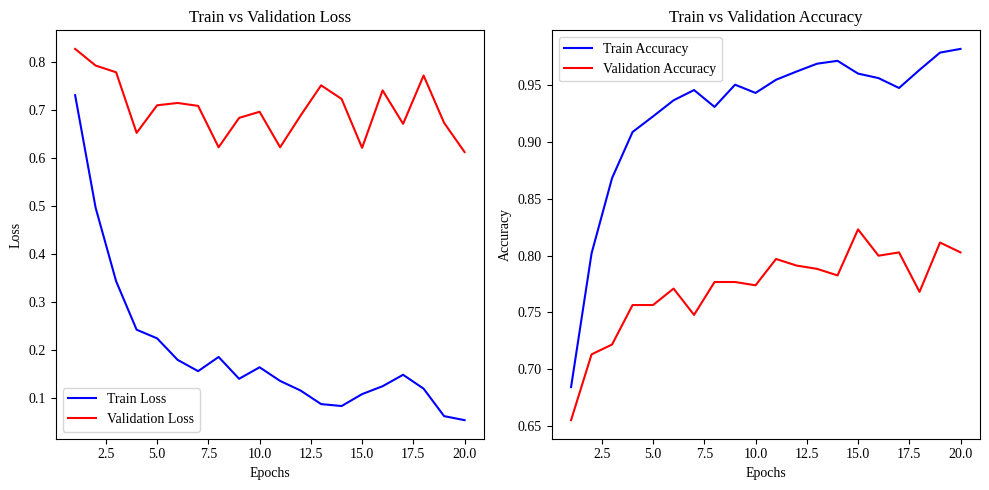

Classification Report:
                precision    recall  f1-score   support

        Eczema       0.78      0.87      0.82       139
     Psoriasis       0.85      0.62      0.72        56
Tinea_Ringworm       0.85      0.84      0.85       150

      accuracy                           0.82       345
     macro avg       0.83      0.78      0.80       345
  weighted avg       0.82      0.82      0.82       345

Confusion Matrix:


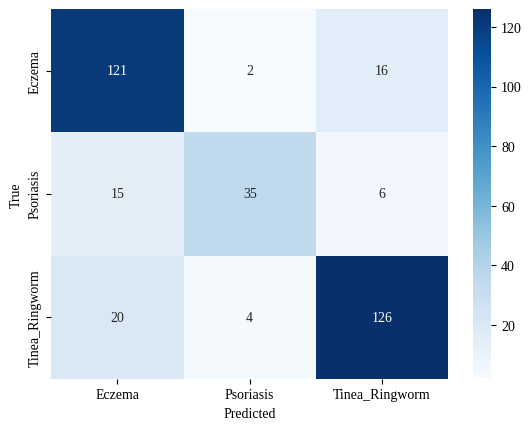

In [9]:
# Load model
model = ModifiedResNet50(num_classes=3).to(DEVICE)

# ------------------- Loss and Optimizer ------------------- #
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)



# ------------------- Training Function with Loss and Accuracy Per Epoch ------------------- #
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    best_model_wts = model.state_dict()
    best_acc = 0.0

    # Lists to store the loss and accuracy values per epoch
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0

        # Training loop
        for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Track accuracy
            _, preds = torch.max(outputs, 1)
            correct_preds += torch.sum(preds == labels).item()
            total_preds += labels.size(0)
            running_loss += loss.item()

        # Calculate average training loss and accuracy for the epoch
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct_preds / total_preds

        # Append values for the current epoch
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_acc:.4f}")

        # Validation loop
        model.eval()
        val_loss = 0.0
        val_correct_preds = 0
        val_total_preds = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                # Track accuracy
                _, preds = torch.max(outputs, 1)
                val_correct_preds += torch.sum(preds == labels).item()
                val_total_preds += labels.size(0)
                val_loss += loss.item()

        # Calculate average validation loss and accuracy for the epoch
        val_epoch_loss = val_loss / len(val_loader)
        val_epoch_acc = val_correct_preds / val_total_preds

        # Append values for the current epoch
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc)

        print(f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_acc:.4f}")

        # Save the best model
        if val_epoch_acc > best_acc:
            best_acc = val_epoch_acc
            best_model_wts = model.state_dict()

    # Load the best model weights
    model.load_state_dict(best_model_wts)

    # Return model and the lists of losses and accuracies
    return model, train_losses, val_losses, train_accuracies, val_accuracies

# ------------------- Training the Model ------------------- #
trained_model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, criterion, optimizer, NUM_EPOCHS
)

# ------------------- Plotting Loss and Accuracy ------------------- #
def plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, NUM_EPOCHS + 1)

    # Plot Training and Validation Loss
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss', color='blue')
    plt.plot(epochs, val_losses, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train vs Validation Loss')
    plt.legend()

    # Plot Training and Validation Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy', color='blue')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train vs Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# ------------------- Plot Loss and Accuracy ------------------- #
plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies)

# ------------------- Evaluate on Test Set ------------------- #
def evaluate_model(model, test_loader):
    model.eval()
    test_preds = []
    test_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            test_preds.extend(preds.cpu().numpy())
            test_labels.extend(labels.cpu().numpy())

    print("Classification Report:")
    print(classification_report(test_labels, test_preds, target_names=test_loader.dataset.classes))

    print("Confusion Matrix:")
    cm = confusion_matrix(test_labels, test_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_loader.dataset.classes, yticklabels=test_loader.dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
torch.save(model.state_dict(), '/mnt/c/Users/pragy/Downloads/Dataset/SD260/Models/Modified_resnet50.pth')
evaluate_model(trained_model, test_loader)


In [10]:
import torch
import torch.nn as nn
from torchvision import models

class ModifiedResNet50(nn.Module):
    def __init__(self, num_classes=3):
        super(ModifiedResNet50, self).__init__()
        base_model = models.resnet50(pretrained=True)
        
        # Remove the original FC layer
        self.feature_extractor = nn.Sequential(*list(base_model.children())[:-2])  # Exclude avgpool & fc

        self.pool = nn.AdaptiveAvgPool2d((1, 1))  # GAP
        self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(2048, 512),
        nn.BatchNorm1d(512),
        nn.LeakyReLU(0.1),
        nn.Dropout(0.4),
        nn.Linear(512, 128),
        nn.BatchNorm1d(128),
        nn.LeakyReLU(0.1),
        nn.Dropout(0.3),
        nn.Linear(128, num_classes)  
)

    def forward(self, x):
        x = self.feature_extractor(x)
        x = self.pool(x)
        x = self.classifier(x)
        return x

/home/pragya/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/pragya/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 1/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:25<00:00,  1.67s/it]


Epoch 1/20, Train Loss: 0.7832, Train Accuracy: 0.6555
Validation Loss: 0.8435, Validation Accuracy: 0.6638


Epoch 2/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:25<00:00,  1.67s/it]


Epoch 2/20, Train Loss: 0.5181, Train Accuracy: 0.8064
Validation Loss: 0.7374, Validation Accuracy: 0.6870


Epoch 3/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:28<00:00,  1.71s/it]


Epoch 3/20, Train Loss: 0.3961, Train Accuracy: 0.8546
Validation Loss: 0.7377, Validation Accuracy: 0.6986


Epoch 4/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:25<00:00,  1.67s/it]


Epoch 4/20, Train Loss: 0.3341, Train Accuracy: 0.8861
Validation Loss: 0.6551, Validation Accuracy: 0.7246


Epoch 5/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:25<00:00,  1.68s/it]


Epoch 5/20, Train Loss: 0.2596, Train Accuracy: 0.9148
Validation Loss: 0.6629, Validation Accuracy: 0.7304


Epoch 6/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:24<00:00,  1.66s/it]


Epoch 6/20, Train Loss: 0.2366, Train Accuracy: 0.9264
Validation Loss: 0.6599, Validation Accuracy: 0.7594


Epoch 7/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:25<00:00,  1.67s/it]


Epoch 7/20, Train Loss: 0.2318, Train Accuracy: 0.9235
Validation Loss: 0.6212, Validation Accuracy: 0.7739


Epoch 8/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:25<00:00,  1.67s/it]


Epoch 8/20, Train Loss: 0.1799, Train Accuracy: 0.9431
Validation Loss: 0.6036, Validation Accuracy: 0.7652


Epoch 9/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:25<00:00,  1.67s/it]


Epoch 9/20, Train Loss: 0.1960, Train Accuracy: 0.9409
Validation Loss: 0.5526, Validation Accuracy: 0.7942


Epoch 10/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:24<00:00,  1.66s/it]


Epoch 10/20, Train Loss: 0.1493, Train Accuracy: 0.9511
Validation Loss: 0.6876, Validation Accuracy: 0.7652


Epoch 11/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:25<00:00,  1.67s/it]


Epoch 11/20, Train Loss: 0.1055, Train Accuracy: 0.9728
Validation Loss: 0.6323, Validation Accuracy: 0.7855


Epoch 12/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:26<00:00,  1.68s/it]


Epoch 12/20, Train Loss: 0.1383, Train Accuracy: 0.9532
Validation Loss: 0.6357, Validation Accuracy: 0.7884


Epoch 13/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:25<00:00,  1.67s/it]


Epoch 13/20, Train Loss: 0.1381, Train Accuracy: 0.9590
Validation Loss: 0.6800, Validation Accuracy: 0.7710


Epoch 14/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:24<00:00,  1.66s/it]


Epoch 14/20, Train Loss: 0.1561, Train Accuracy: 0.9496
Validation Loss: 0.7899, Validation Accuracy: 0.7681


Epoch 15/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:24<00:00,  1.66s/it]


Epoch 15/20, Train Loss: 0.1778, Train Accuracy: 0.9456
Validation Loss: 0.7406, Validation Accuracy: 0.7826


Epoch 16/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:25<00:00,  1.67s/it]


Epoch 16/20, Train Loss: 0.1645, Train Accuracy: 0.9453
Validation Loss: 0.6956, Validation Accuracy: 0.7826


Epoch 17/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:24<00:00,  1.66s/it]


Epoch 17/20, Train Loss: 0.1117, Train Accuracy: 0.9652
Validation Loss: 0.7119, Validation Accuracy: 0.7826


Epoch 18/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:24<00:00,  1.66s/it]


Epoch 18/20, Train Loss: 0.1079, Train Accuracy: 0.9663
Validation Loss: 0.6466, Validation Accuracy: 0.8058


Epoch 19/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:24<00:00,  1.67s/it]


Epoch 19/20, Train Loss: 0.1462, Train Accuracy: 0.9536
Validation Loss: 0.5606, Validation Accuracy: 0.8319


Epoch 20/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:25<00:00,  1.67s/it]


Epoch 20/20, Train Loss: 0.0840, Train Accuracy: 0.9750
Validation Loss: 0.6072, Validation Accuracy: 0.8000


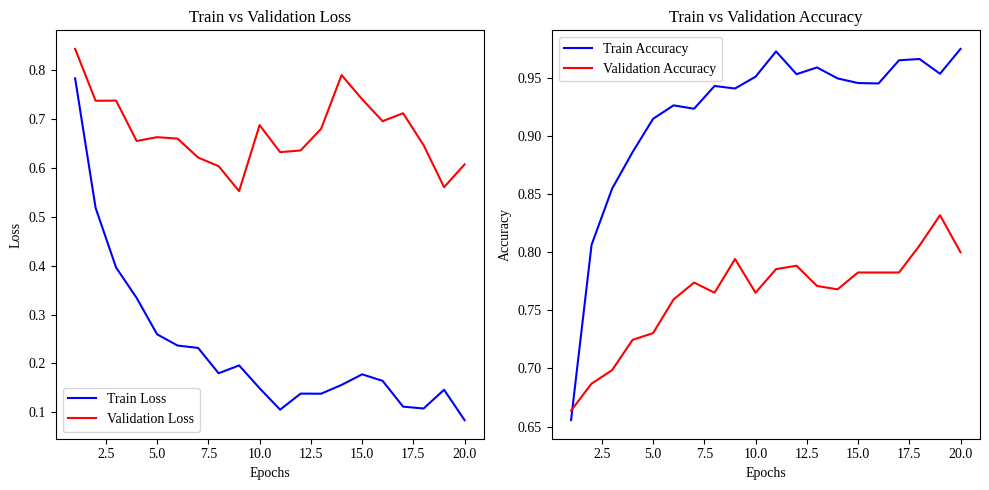

Classification Report:
                precision    recall  f1-score   support

        Eczema       0.78      0.89      0.84       139
     Psoriasis       0.83      0.54      0.65        56
Tinea_Ringworm       0.87      0.87      0.87       150

      accuracy                           0.83       345
     macro avg       0.83      0.77      0.79       345
  weighted avg       0.83      0.83      0.82       345

Confusion Matrix:


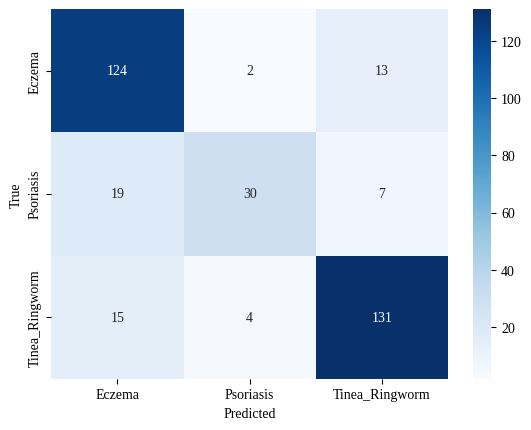

In [11]:
# Load model
model = ModifiedResNet50(num_classes=3).to(DEVICE)

# ------------------- Loss and Optimizer ------------------- #
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)



# ------------------- Training Function with Loss and Accuracy Per Epoch ------------------- #
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    best_model_wts = model.state_dict()
    best_acc = 0.0

    # Lists to store the loss and accuracy values per epoch
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0

        # Training loop
        for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Track accuracy
            _, preds = torch.max(outputs, 1)
            correct_preds += torch.sum(preds == labels).item()
            total_preds += labels.size(0)
            running_loss += loss.item()

        # Calculate average training loss and accuracy for the epoch
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct_preds / total_preds

        # Append values for the current epoch
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_acc:.4f}")

        # Validation loop
        model.eval()
        val_loss = 0.0
        val_correct_preds = 0
        val_total_preds = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                # Track accuracy
                _, preds = torch.max(outputs, 1)
                val_correct_preds += torch.sum(preds == labels).item()
                val_total_preds += labels.size(0)
                val_loss += loss.item()

        # Calculate average validation loss and accuracy for the epoch
        val_epoch_loss = val_loss / len(val_loader)
        val_epoch_acc = val_correct_preds / val_total_preds

        # Append values for the current epoch
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc)

        print(f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_acc:.4f}")

        # Save the best model
        if val_epoch_acc > best_acc:
            best_acc = val_epoch_acc
            best_model_wts = model.state_dict()

    # Load the best model weights
    model.load_state_dict(best_model_wts)

    # Return model and the lists of losses and accuracies
    return model, train_losses, val_losses, train_accuracies, val_accuracies

# ------------------- Training the Model ------------------- #
trained_model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, criterion, optimizer, NUM_EPOCHS
)

# ------------------- Plotting Loss and Accuracy ------------------- #
def plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, NUM_EPOCHS + 1)

    # Plot Training and Validation Loss
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss', color='blue')
    plt.plot(epochs, val_losses, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train vs Validation Loss')
    plt.legend()

    # Plot Training and Validation Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy', color='blue')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train vs Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# ------------------- Plot Loss and Accuracy ------------------- #
plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies)

# ------------------- Evaluate on Test Set ------------------- #
def evaluate_model(model, test_loader):
    model.eval()
    test_preds = []
    test_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            test_preds.extend(preds.cpu().numpy())
            test_labels.extend(labels.cpu().numpy())

    print("Classification Report:")
    print(classification_report(test_labels, test_preds, target_names=test_loader.dataset.classes))

    print("Confusion Matrix:")
    cm = confusion_matrix(test_labels, test_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_loader.dataset.classes, yticklabels=test_loader.dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
torch.save(model.state_dict(), '/mnt/c/Users/pragy/Downloads/Dataset/SD260/Models/Modified1_resnet50.pth')
evaluate_model(trained_model, test_loader)


In [12]:
import torch
import torch.nn as nn
from torchvision import models

class ModifiedResNet50(nn.Module):
    def __init__(self, num_classes=3):
        super(ModifiedResNet50, self).__init__()
        base_model = models.resnet50(pretrained=True)
        
        # Remove the original FC layer
        self.feature_extractor = nn.Sequential(*list(base_model.children())[:-2])  # Exclude avgpool & fc

        self.pool = nn.AdaptiveAvgPool2d((1, 1))  # GAP
        self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(2048, 512),
        nn.BatchNorm1d(512),
        nn.SiLU(),                  # Replaces LeakyReLU
        nn.Dropout(0.4),
        nn.Linear(512, 128),
        nn.BatchNorm1d(128),
        nn.SiLU(),                  # Replaces LeakyReLU
        nn.Dropout(0.3),
        nn.Linear(128, num_classes) 
)

    def forward(self, x):
        x = self.feature_extractor(x)
        x = self.pool(x)
        x = self.classifier(x)
        return x

/home/pragya/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/pragya/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/pragya/.local/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
Epoch 1/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:25<00:00,  1.68s/it]


Epoch 1/20, Train Loss: 0.8234, Train Accuracy: 0.6762
Validation Loss: 0.9206, Validation Accuracy: 0.6058


Epoch 2/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:25<00:00,  1.67s/it]


Epoch 2/20, Train Loss: 0.6591, Train Accuracy: 0.8064
Validation Loss: 0.7637, Validation Accuracy: 0.7536


Epoch 3/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:25<00:00,  1.67s/it]


Epoch 3/20, Train Loss: 0.5313, Train Accuracy: 0.8854
Validation Loss: 0.7952, Validation Accuracy: 0.7101


Epoch 4/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:25<00:00,  1.67s/it]


Epoch 4/20, Train Loss: 0.4767, Train Accuracy: 0.9075
Validation Loss: 0.7586, Validation Accuracy: 0.7391


Epoch 5/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:24<00:00,  1.66s/it]


Epoch 5/20, Train Loss: 0.4361, Train Accuracy: 0.9344
Validation Loss: 0.7070, Validation Accuracy: 0.7478


Epoch 6/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:25<00:00,  1.67s/it]


Epoch 6/20, Train Loss: 0.3997, Train Accuracy: 0.9532
Validation Loss: 0.6994, Validation Accuracy: 0.7768


Epoch 7/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:24<00:00,  1.67s/it]


Epoch 7/20, Train Loss: 0.4113, Train Accuracy: 0.9536
Validation Loss: 0.6960, Validation Accuracy: 0.7913


Epoch 8/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:25<00:00,  1.67s/it]


Epoch 8/20, Train Loss: 0.4096, Train Accuracy: 0.9423
Validation Loss: 0.7157, Validation Accuracy: 0.7594


Epoch 9/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:25<00:00,  1.67s/it]


Epoch 9/20, Train Loss: 0.3786, Train Accuracy: 0.9666
Validation Loss: 0.6623, Validation Accuracy: 0.7826


Epoch 10/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:25<00:00,  1.67s/it]


Epoch 10/20, Train Loss: 0.3787, Train Accuracy: 0.9681
Validation Loss: 0.6661, Validation Accuracy: 0.7913


Epoch 11/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:24<00:00,  1.67s/it]


Epoch 11/20, Train Loss: 0.3751, Train Accuracy: 0.9688
Validation Loss: 0.7552, Validation Accuracy: 0.7652


Epoch 12/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:25<00:00,  1.67s/it]


Epoch 12/20, Train Loss: 0.3706, Train Accuracy: 0.9692
Validation Loss: 0.6791, Validation Accuracy: 0.7826


Epoch 13/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:25<00:00,  1.67s/it]


Epoch 13/20, Train Loss: 0.3657, Train Accuracy: 0.9699
Validation Loss: 0.8426, Validation Accuracy: 0.7217


Epoch 14/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:25<00:00,  1.68s/it]


Epoch 14/20, Train Loss: 0.3485, Train Accuracy: 0.9793
Validation Loss: 0.6614, Validation Accuracy: 0.7913


Epoch 15/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:25<00:00,  1.68s/it]


Epoch 15/20, Train Loss: 0.3347, Train Accuracy: 0.9866
Validation Loss: 0.6147, Validation Accuracy: 0.8232


Epoch 16/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:25<00:00,  1.67s/it]


Epoch 16/20, Train Loss: 0.3227, Train Accuracy: 0.9920
Validation Loss: 0.6310, Validation Accuracy: 0.8203


Epoch 17/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:25<00:00,  1.67s/it]


Epoch 17/20, Train Loss: 0.3193, Train Accuracy: 0.9964
Validation Loss: 0.6389, Validation Accuracy: 0.8116


Epoch 18/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:25<00:00,  1.67s/it]


Epoch 18/20, Train Loss: 0.3380, Train Accuracy: 0.9859
Validation Loss: 0.6311, Validation Accuracy: 0.8116


Epoch 19/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:29<00:00,  1.72s/it]


Epoch 19/20, Train Loss: 0.3181, Train Accuracy: 0.9953
Validation Loss: 0.6215, Validation Accuracy: 0.8319


Epoch 20/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:25<00:00,  1.68s/it]


Epoch 20/20, Train Loss: 0.3277, Train Accuracy: 0.9902
Validation Loss: 0.6187, Validation Accuracy: 0.8290


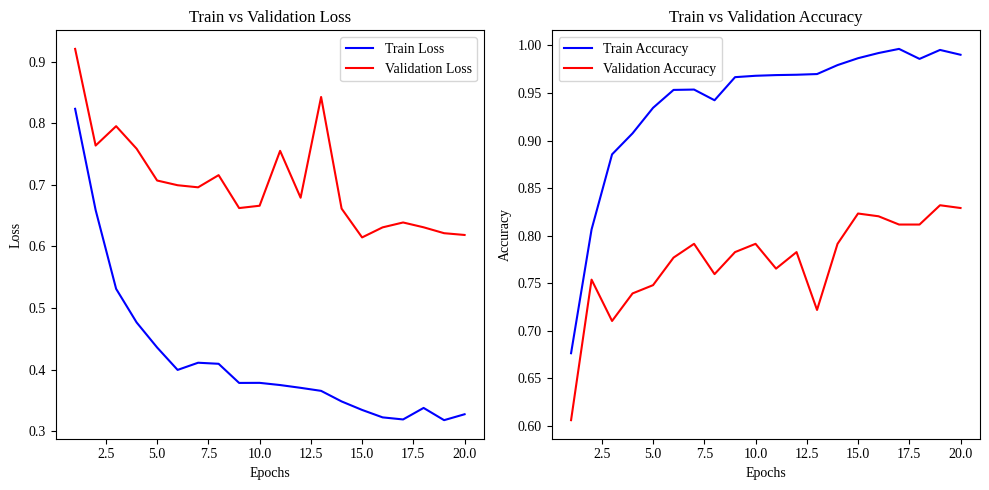

Classification Report:
                precision    recall  f1-score   support

        Eczema       0.85      0.87      0.86       139
     Psoriasis       0.84      0.64      0.73        56
Tinea_Ringworm       0.85      0.90      0.87       150

      accuracy                           0.85       345
     macro avg       0.84      0.80      0.82       345
  weighted avg       0.85      0.85      0.84       345

Confusion Matrix:


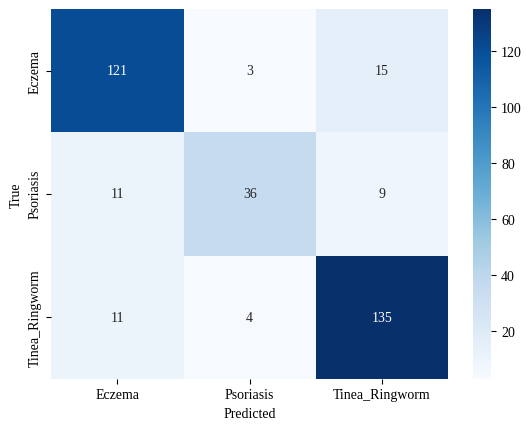

In [13]:
# Load model
model = ModifiedResNet50(num_classes=3).to(DEVICE)

# ------------------- Loss and Optimizer ------------------- #
criterion = torch.nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=3, verbose=True
)

# ------------------- Training Function with Loss and Accuracy Per Epoch ------------------- #
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs):
    best_model_wts = model.state_dict()
    best_acc = 0.0

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0

        for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, preds = torch.max(outputs, 1)
            correct_preds += torch.sum(preds == labels).item()
            total_preds += labels.size(0)
            running_loss += loss.item()

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct_preds / total_preds
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_acc:.4f}")

        model.eval()
        val_loss = 0.0
        val_correct_preds = 0
        val_total_preds = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                _, preds = torch.max(outputs, 1)
                val_correct_preds += torch.sum(preds == labels).item()
                val_total_preds += labels.size(0)
                val_loss += loss.item()

        val_epoch_loss = val_loss / len(val_loader)
        val_epoch_acc = val_correct_preds / val_total_preds
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc)

        scheduler.step(val_epoch_loss)

        print(f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_acc:.4f}")

        if val_epoch_acc > best_acc:
            best_acc = val_epoch_acc
            best_model_wts = model.state_dict()

    model.load_state_dict(best_model_wts)
    return model, train_losses, val_losses, train_accuracies, val_accuracies

# ------------------- Training the Model ------------------- #
trained_model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, criterion, optimizer, scheduler, NUM_EPOCHS
)

# ------------------- Plotting Loss and Accuracy ------------------- #
def plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, NUM_EPOCHS + 1)
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss', color='blue')
    plt.plot(epochs, val_losses, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train vs Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy', color='blue')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train vs Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies)

# ------------------- Evaluate on Test Set ------------------- #
def evaluate_model(model, test_loader):
    model.eval()
    test_preds = []
    test_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            test_preds.extend(preds.cpu().numpy())
            test_labels.extend(labels.cpu().numpy())

    print("Classification Report:")
    print(classification_report(test_labels, test_preds, target_names=test_loader.dataset.classes))

    print("Confusion Matrix:")
    cm = confusion_matrix(test_labels, test_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_loader.dataset.classes, yticklabels=test_loader.dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# ------------------- Save and Evaluate ------------------- #
torch.save(model.state_dict(), '/mnt/c/Users/pragy/Downloads/Dataset/SD260/Models/Modified2_resnet50.pth')
evaluate_model(trained_model, test_loader)


In [14]:
import torch
import torch.nn as nn
from torchvision.models import resnet50

class DenseLayer(nn.Module):
    def __init__(self, in_channels, growth_rate=32, bn_size=4, drop_rate=0.2):
        super(DenseLayer, self).__init__()
        inter_channels = bn_size * growth_rate
        self.net = nn.Sequential(
            nn.BatchNorm2d(in_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels, inter_channels, kernel_size=1, stride=1, bias=False),
            nn.BatchNorm2d(inter_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(inter_channels, growth_rate, kernel_size=3, stride=1, padding=1, bias=False),
        )
        self.drop_rate = drop_rate

    def forward(self, x):
        new_features = self.net(x)
        if self.drop_rate > 0:
            new_features = nn.functional.dropout(new_features, p=self.drop_rate, training=self.training)
        return torch.cat([x, new_features], 1)

class DenseBlock(nn.Module):
    def __init__(self, num_layers, in_channels, growth_rate=32):
        super(DenseBlock, self).__init__()
        layers = []
        for i in range(num_layers):
            layers.append(DenseLayer(in_channels + i * growth_rate, growth_rate))
        self.block = nn.Sequential(*layers)

    def forward(self, x):
        return self.block(x)

class TransitionLayer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(TransitionLayer, self).__init__()
        self.transition = nn.Sequential(
            nn.BatchNorm2d(in_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False),
            nn.AvgPool2d(2, stride=2)
        )

    def forward(self, x):
        return self.transition(x)

class ModifiedResNet50(nn.Module):
    def __init__(self, num_classes):
        super(ModifiedResNet50, self).__init__()
        base_model = resnet50(weights=None)  # or weights='IMAGENET1K_V1' if using pretrained

        # Keep all layers up to layer3
        self.backbone = nn.Sequential(
            base_model.conv1,
            base_model.bn1,
            base_model.relu,
            base_model.maxpool,
            base_model.layer1,
            base_model.layer2,
            base_model.layer3,
        )

        # Replace layer4 with DenseBlock
        self.dense_block = nn.Sequential(
            DenseBlock(num_layers=4, in_channels=1024, growth_rate=32),
            TransitionLayer(1024 + 4 * 32, 1024)
        )

        # Global pooling
        self.pool = nn.AdaptiveAvgPool2d((1, 1))

        # Custom classifier head
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.SiLU(),
            nn.Dropout(0.4),
            nn.Linear(512, 128),
            nn.BatchNorm1d(128),
            nn.SiLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.backbone(x)
        x = self.dense_block(x)
        x = self.pool(x)
        x = self.classifier(x)
        return x


/home/pragya/.local/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
Epoch 1/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:48<00:00,  1.93s/it]


Epoch 1/20, Train Loss: 1.0863, Train Accuracy: 0.4398
Validation Loss: 1.1266, Validation Accuracy: 0.4203


Epoch 2/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:47<00:00,  1.93s/it]


Epoch 2/20, Train Loss: 1.0428, Train Accuracy: 0.4971
Validation Loss: 1.0507, Validation Accuracy: 0.4812


Epoch 3/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:47<00:00,  1.93s/it]


Epoch 3/20, Train Loss: 1.0240, Train Accuracy: 0.5210
Validation Loss: 1.0751, Validation Accuracy: 0.4725


Epoch 4/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:46<00:00,  1.92s/it]


Epoch 4/20, Train Loss: 1.0116, Train Accuracy: 0.5330
Validation Loss: 1.0373, Validation Accuracy: 0.4928


Epoch 5/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:48<00:00,  1.94s/it]


Epoch 5/20, Train Loss: 1.0029, Train Accuracy: 0.5344
Validation Loss: 1.0794, Validation Accuracy: 0.4348


Epoch 6/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:47<00:00,  1.93s/it]


Epoch 6/20, Train Loss: 0.9930, Train Accuracy: 0.5482
Validation Loss: 1.0940, Validation Accuracy: 0.4870


Epoch 7/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:46<00:00,  1.92s/it]


Epoch 7/20, Train Loss: 0.9813, Train Accuracy: 0.5598
Validation Loss: 1.0291, Validation Accuracy: 0.5188


Epoch 8/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:48<00:00,  1.94s/it]


Epoch 8/20, Train Loss: 0.9582, Train Accuracy: 0.5685
Validation Loss: 1.0519, Validation Accuracy: 0.4580


Epoch 9/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:48<00:00,  1.93s/it]


Epoch 9/20, Train Loss: 0.9404, Train Accuracy: 0.5961
Validation Loss: 1.0491, Validation Accuracy: 0.5391


Epoch 10/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:47<00:00,  1.92s/it]


Epoch 10/20, Train Loss: 0.9228, Train Accuracy: 0.6037
Validation Loss: 1.0879, Validation Accuracy: 0.4783


Epoch 11/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:47<00:00,  1.92s/it]


Epoch 11/20, Train Loss: 0.9203, Train Accuracy: 0.6113
Validation Loss: 1.0078, Validation Accuracy: 0.5362


Epoch 12/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:47<00:00,  1.93s/it]


Epoch 12/20, Train Loss: 0.9183, Train Accuracy: 0.6080
Validation Loss: 1.0834, Validation Accuracy: 0.5014


Epoch 13/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:47<00:00,  1.93s/it]


Epoch 13/20, Train Loss: 0.9018, Train Accuracy: 0.6200
Validation Loss: 1.0697, Validation Accuracy: 0.5188


Epoch 14/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:46<00:00,  1.92s/it]


Epoch 14/20, Train Loss: 0.9003, Train Accuracy: 0.6276
Validation Loss: 1.2043, Validation Accuracy: 0.4116


Epoch 15/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:47<00:00,  1.93s/it]


Epoch 15/20, Train Loss: 0.8928, Train Accuracy: 0.6320
Validation Loss: 0.9570, Validation Accuracy: 0.5362


Epoch 16/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:47<00:00,  1.93s/it]


Epoch 16/20, Train Loss: 0.8778, Train Accuracy: 0.6436
Validation Loss: 1.3344, Validation Accuracy: 0.5101


Epoch 17/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:47<00:00,  1.92s/it]


Epoch 17/20, Train Loss: 0.8629, Train Accuracy: 0.6454
Validation Loss: 0.9924, Validation Accuracy: 0.5594


Epoch 18/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:47<00:00,  1.93s/it]


Epoch 18/20, Train Loss: 0.8550, Train Accuracy: 0.6519
Validation Loss: 1.1018, Validation Accuracy: 0.5072


Epoch 19/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:47<00:00,  1.93s/it]


Epoch 19/20, Train Loss: 0.8575, Train Accuracy: 0.6385
Validation Loss: 0.9669, Validation Accuracy: 0.5507


Epoch 20/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:47<00:00,  1.93s/it]


Epoch 20/20, Train Loss: 0.8137, Train Accuracy: 0.6846
Validation Loss: 0.9711, Validation Accuracy: 0.5942


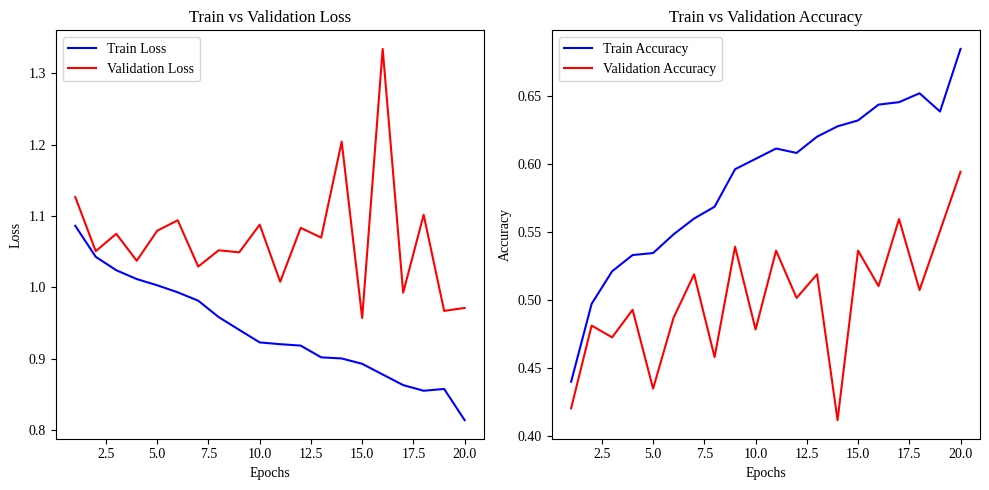

Classification Report:
                precision    recall  f1-score   support

        Eczema       0.62      0.70      0.66       139
     Psoriasis       0.38      0.61      0.47        56
Tinea_Ringworm       0.76      0.49      0.60       150

      accuracy                           0.59       345
     macro avg       0.58      0.60      0.57       345
  weighted avg       0.64      0.59      0.60       345

Confusion Matrix:


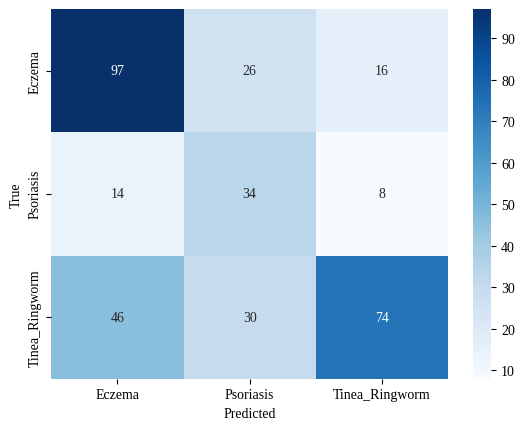

In [15]:
# Load model
model = ModifiedResNet50(num_classes=3).to(DEVICE)

# ------------------- Loss and Optimizer ------------------- #
criterion = torch.nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=3, verbose=True
)

# ------------------- Training Function with Loss and Accuracy Per Epoch ------------------- #
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs):
    best_model_wts = model.state_dict()
    best_acc = 0.0

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0

        for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, preds = torch.max(outputs, 1)
            correct_preds += torch.sum(preds == labels).item()
            total_preds += labels.size(0)
            running_loss += loss.item()

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct_preds / total_preds
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_acc:.4f}")

        model.eval()
        val_loss = 0.0
        val_correct_preds = 0
        val_total_preds = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                _, preds = torch.max(outputs, 1)
                val_correct_preds += torch.sum(preds == labels).item()
                val_total_preds += labels.size(0)
                val_loss += loss.item()

        val_epoch_loss = val_loss / len(val_loader)
        val_epoch_acc = val_correct_preds / val_total_preds
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc)

        scheduler.step(val_epoch_loss)

        print(f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_acc:.4f}")

        if val_epoch_acc > best_acc:
            best_acc = val_epoch_acc
            best_model_wts = model.state_dict()

    model.load_state_dict(best_model_wts)
    return model, train_losses, val_losses, train_accuracies, val_accuracies

# ------------------- Training the Model ------------------- #
trained_model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, criterion, optimizer, scheduler, NUM_EPOCHS
)

# ------------------- Plotting Loss and Accuracy ------------------- #
def plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, NUM_EPOCHS + 1)
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss', color='blue')
    plt.plot(epochs, val_losses, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train vs Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy', color='blue')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train vs Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies)

# ------------------- Evaluate on Test Set ------------------- #
def evaluate_model(model, test_loader):
    model.eval()
    test_preds = []
    test_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            test_preds.extend(preds.cpu().numpy())
            test_labels.extend(labels.cpu().numpy())

    print("Classification Report:")
    print(classification_report(test_labels, test_preds, target_names=test_loader.dataset.classes))

    print("Confusion Matrix:")
    cm = confusion_matrix(test_labels, test_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_loader.dataset.classes, yticklabels=test_loader.dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# ------------------- Save and Evaluate ------------------- #
torch.save(model.state_dict(), '/mnt/c/Users/pragy/Downloads/Dataset/SD260/Models/Modified3_resnet50.pth')
evaluate_model(trained_model, test_loader)


In [16]:
#Modified EfficientnetB0

In [1]:
import torch.nn as nn
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights

class ModifiedEfficientNetB0(nn.Module):
    def __init__(self, num_classes=3, freeze_blocks=5):
        super(ModifiedEfficientNetB0, self).__init__()
        self.base_model = efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)

        # Optionally freeze first N feature blocks
        for param in self.base_model.features[:freeze_blocks]:
            param.requires_grad = False

        in_features = self.base_model.classifier[1].in_features

        # Replace classifier
        self.base_model.classifier = nn.Sequential(
            nn.Dropout(p=0.4, inplace=True),
            nn.Linear(in_features, 512),
            nn.BatchNorm1d(512),
            nn.SiLU(inplace=True),
            nn.Dropout(p=0.3, inplace=True),
            nn.Linear(512, 128),
            nn.BatchNorm1d(128),
            nn.SiLU(inplace=True),
            nn.Dropout(p=0.2, inplace=True),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.base_model(x)


/home/pragya/.local/lib/python3.10/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


Epoch 1/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:49<00:00,  1.75it/s]


Epoch 1/20, Train Loss: 0.9952, Train Accuracy: 0.5131
Validation Loss: 0.9401, Validation Accuracy: 0.6000


Epoch 2/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:51<00:00,  1.69it/s]


Epoch 2/20, Train Loss: 0.8181, Train Accuracy: 0.6795
Validation Loss: 0.8286, Validation Accuracy: 0.6667


Epoch 3/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:55<00:00,  1.57it/s]


Epoch 3/20, Train Loss: 0.7039, Train Accuracy: 0.7690
Validation Loss: 0.7787, Validation Accuracy: 0.7188


Epoch 4/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:53<00:00,  1.62it/s]


Epoch 4/20, Train Loss: 0.6368, Train Accuracy: 0.8053
Validation Loss: 0.7467, Validation Accuracy: 0.7246


Epoch 5/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:48<00:00,  1.79it/s]


Epoch 5/20, Train Loss: 0.5781, Train Accuracy: 0.8477
Validation Loss: 0.7239, Validation Accuracy: 0.7507


Epoch 6/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:48<00:00,  1.81it/s]


Epoch 6/20, Train Loss: 0.5274, Train Accuracy: 0.8843
Validation Loss: 0.7223, Validation Accuracy: 0.7652


Epoch 7/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:47<00:00,  1.82it/s]


Epoch 7/20, Train Loss: 0.5070, Train Accuracy: 0.8930
Validation Loss: 0.6873, Validation Accuracy: 0.7768


Epoch 8/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:47<00:00,  1.81it/s]


Epoch 8/20, Train Loss: 0.4641, Train Accuracy: 0.9155
Validation Loss: 0.6771, Validation Accuracy: 0.7681


Epoch 9/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:48<00:00,  1.79it/s]


Epoch 9/20, Train Loss: 0.4352, Train Accuracy: 0.9347
Validation Loss: 0.7162, Validation Accuracy: 0.7739


Epoch 10/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:48<00:00,  1.81it/s]


Epoch 10/20, Train Loss: 0.4299, Train Accuracy: 0.9442
Validation Loss: 0.7604, Validation Accuracy: 0.7507


Epoch 11/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:48<00:00,  1.79it/s]


Epoch 11/20, Train Loss: 0.4086, Train Accuracy: 0.9565
Validation Loss: 0.7121, Validation Accuracy: 0.7826


Epoch 12/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:51<00:00,  1.69it/s]


Epoch 12/20, Train Loss: 0.3923, Train Accuracy: 0.9663
Validation Loss: 0.6942, Validation Accuracy: 0.7710


Epoch 13/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:49<00:00,  1.76it/s]


Epoch 13/20, Train Loss: 0.3924, Train Accuracy: 0.9656
Validation Loss: 0.6712, Validation Accuracy: 0.7681


Epoch 14/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:48<00:00,  1.78it/s]


Epoch 14/20, Train Loss: 0.3727, Train Accuracy: 0.9768
Validation Loss: 0.7065, Validation Accuracy: 0.7855


Epoch 15/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:52<00:00,  1.67it/s]


Epoch 15/20, Train Loss: 0.3780, Train Accuracy: 0.9764
Validation Loss: 0.6734, Validation Accuracy: 0.7884


Epoch 16/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:47<00:00,  1.81it/s]


Epoch 16/20, Train Loss: 0.3689, Train Accuracy: 0.9793
Validation Loss: 0.6701, Validation Accuracy: 0.7971


Epoch 17/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:48<00:00,  1.79it/s]


Epoch 17/20, Train Loss: 0.3636, Train Accuracy: 0.9815
Validation Loss: 0.6984, Validation Accuracy: 0.7913


Epoch 18/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:48<00:00,  1.78it/s]


Epoch 18/20, Train Loss: 0.3632, Train Accuracy: 0.9808
Validation Loss: 0.6792, Validation Accuracy: 0.7797


Epoch 19/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:48<00:00,  1.79it/s]


Epoch 19/20, Train Loss: 0.3689, Train Accuracy: 0.9743
Validation Loss: 0.6695, Validation Accuracy: 0.7826


Epoch 20/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:48<00:00,  1.79it/s]


Epoch 20/20, Train Loss: 0.3573, Train Accuracy: 0.9862
Validation Loss: 0.6768, Validation Accuracy: 0.7855


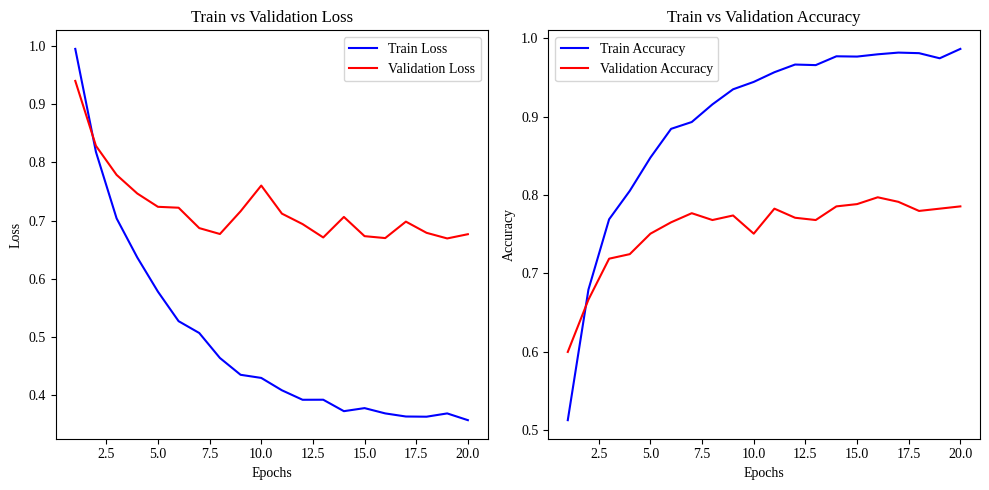

Classification Report:
                precision    recall  f1-score   support

        Eczema       0.83      0.89      0.86       139
     Psoriasis       0.86      0.64      0.73        56
Tinea_Ringworm       0.86      0.88      0.87       150

      accuracy                           0.85       345
     macro avg       0.85      0.80      0.82       345
  weighted avg       0.85      0.85      0.84       345

Confusion Matrix:


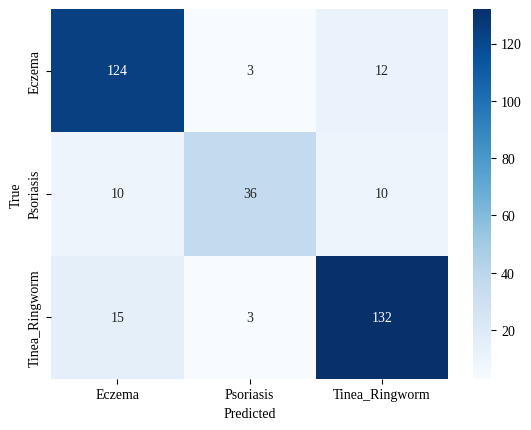

In [19]:
model = ModifiedEfficientNetB0(num_classes=3)
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(DEVICE) 
# ------------------- Loss and Optimizer ------------------- #
criterion = torch.nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=3, verbose=True
)

# ------------------- Training Function with Loss and Accuracy Per Epoch ------------------- #
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs):
    best_model_wts = model.state_dict()
    best_acc = 0.0

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0

        for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, preds = torch.max(outputs, 1)
            correct_preds += torch.sum(preds == labels).item()
            total_preds += labels.size(0)
            running_loss += loss.item()

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct_preds / total_preds
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_acc:.4f}")

        model.eval()
        val_loss = 0.0
        val_correct_preds = 0
        val_total_preds = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                _, preds = torch.max(outputs, 1)
                val_correct_preds += torch.sum(preds == labels).item()
                val_total_preds += labels.size(0)
                val_loss += loss.item()

        val_epoch_loss = val_loss / len(val_loader)
        val_epoch_acc = val_correct_preds / val_total_preds
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc)

        scheduler.step(val_epoch_loss)

        print(f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_acc:.4f}")

        if val_epoch_acc > best_acc:
            best_acc = val_epoch_acc
            best_model_wts = model.state_dict()

    model.load_state_dict(best_model_wts)
    return model, train_losses, val_losses, train_accuracies, val_accuracies

# ------------------- Training the Model ------------------- #
trained_model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, criterion, optimizer, scheduler, NUM_EPOCHS
)

# ------------------- Plotting Loss and Accuracy ------------------- #
def plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, NUM_EPOCHS + 1)
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss', color='blue')
    plt.plot(epochs, val_losses, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train vs Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy', color='blue')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train vs Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies)

# ------------------- Evaluate on Test Set ------------------- #
def evaluate_model(model, test_loader):
    model.eval()
    test_preds = []
    test_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            test_preds.extend(preds.cpu().numpy())
            test_labels.extend(labels.cpu().numpy())

    print("Classification Report:")
    print(classification_report(test_labels, test_preds, target_names=test_loader.dataset.classes))

    print("Confusion Matrix:")
    cm = confusion_matrix(test_labels, test_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_loader.dataset.classes, yticklabels=test_loader.dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# ------------------- Save and Evaluate ------------------- #
torch.save(model.state_dict(), '/mnt/c/Users/pragy/Downloads/Dataset/SD260/Models/Modified_efficientnetb0.pth')
evaluate_model(trained_model, test_loader)


In [ ]:
#Modified InceptionV3

In [3]:
import torch.nn as nn
from torchvision import models

class Modified_InceptionV3(nn.Module):
    def __init__(self, num_classes):
        super(Modified_InceptionV3, self).__init__()
        self.base_model = models.inception_v3(pretrained=True, aux_logits=True)

        self.base_model.fc = nn.Sequential(
            nn.Linear(2048, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

        self.base_model.AuxLogits.fc = nn.Sequential(
            nn.Linear(768, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        return self.base_model(x)


/home/pragya/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/pragya/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 1/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:42<00:00,  1.18s/it]


Epoch 1/20, Train Loss: 0.8574, Train Accuracy: 0.6131
Validation Loss: 0.7836, Validation Accuracy: 0.6870


Epoch 2/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:43<00:00,  1.18s/it]


Epoch 2/20, Train Loss: 0.5073, Train Accuracy: 0.7995
Validation Loss: 0.7683, Validation Accuracy: 0.6812


Epoch 3/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:41<00:00,  1.17s/it]


Epoch 3/20, Train Loss: 0.3798, Train Accuracy: 0.8579
Validation Loss: 0.7022, Validation Accuracy: 0.7449


Epoch 4/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:47<00:00,  1.24s/it]


Epoch 4/20, Train Loss: 0.2826, Train Accuracy: 0.8996
Validation Loss: 0.8005, Validation Accuracy: 0.7478


Epoch 5/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:14<00:00,  1.55s/it]


Epoch 5/20, Train Loss: 0.1992, Train Accuracy: 0.9242
Validation Loss: 0.8249, Validation Accuracy: 0.7333


Epoch 6/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:40<00:00,  1.16s/it]


Epoch 6/20, Train Loss: 0.1679, Train Accuracy: 0.9373
Validation Loss: 0.7424, Validation Accuracy: 0.7855


Epoch 7/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:41<00:00,  1.17s/it]


Epoch 7/20, Train Loss: 0.1592, Train Accuracy: 0.9445
Validation Loss: 0.7409, Validation Accuracy: 0.7710


Epoch 8/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:42<00:00,  1.17s/it]


Epoch 8/20, Train Loss: 0.1195, Train Accuracy: 0.9623
Validation Loss: 0.8286, Validation Accuracy: 0.7623


Epoch 9/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [01:41<00:00,  1.17s/it]


Epoch 9/20, Train Loss: 0.1145, Train Accuracy: 0.9612
Validation Loss: 0.8093, Validation Accuracy: 0.7565


Epoch 10/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:40<00:00,  1.16s/it]


Epoch 10/20, Train Loss: 0.1072, Train Accuracy: 0.9645
Validation Loss: 0.9929, Validation Accuracy: 0.7536


Epoch 11/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:41<00:00,  1.17s/it]


Epoch 11/20, Train Loss: 0.1133, Train Accuracy: 0.9590
Validation Loss: 0.8676, Validation Accuracy: 0.7623


Epoch 12/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:41<00:00,  1.16s/it]


Epoch 12/20, Train Loss: 0.0938, Train Accuracy: 0.9623
Validation Loss: 0.9356, Validation Accuracy: 0.7710


Epoch 13/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:41<00:00,  1.16s/it]


Epoch 13/20, Train Loss: 0.0831, Train Accuracy: 0.9699
Validation Loss: 0.8059, Validation Accuracy: 0.7942


Epoch 14/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:43<00:00,  1.19s/it]


Epoch 14/20, Train Loss: 0.0722, Train Accuracy: 0.9786
Validation Loss: 0.7805, Validation Accuracy: 0.7884


Epoch 15/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:44<00:00,  1.20s/it]


Epoch 15/20, Train Loss: 0.0766, Train Accuracy: 0.9768
Validation Loss: 0.7318, Validation Accuracy: 0.8000


Epoch 16/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:42<00:00,  1.18s/it]


Epoch 16/20, Train Loss: 0.0756, Train Accuracy: 0.9746
Validation Loss: 0.7442, Validation Accuracy: 0.8029


Epoch 17/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:44<00:00,  1.20s/it]


Epoch 17/20, Train Loss: 0.0702, Train Accuracy: 0.9761
Validation Loss: 0.7084, Validation Accuracy: 0.8058


Epoch 18/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:43<00:00,  1.18s/it]


Epoch 18/20, Train Loss: 0.0658, Train Accuracy: 0.9811
Validation Loss: 0.8267, Validation Accuracy: 0.7797


Epoch 19/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:46<00:00,  1.23s/it]


Epoch 19/20, Train Loss: 0.0871, Train Accuracy: 0.9724
Validation Loss: 0.7709, Validation Accuracy: 0.7681


Epoch 20/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [01:42<00:00,  1.18s/it]


Epoch 20/20, Train Loss: 0.0496, Train Accuracy: 0.9837
Validation Loss: 0.9120, Validation Accuracy: 0.7797


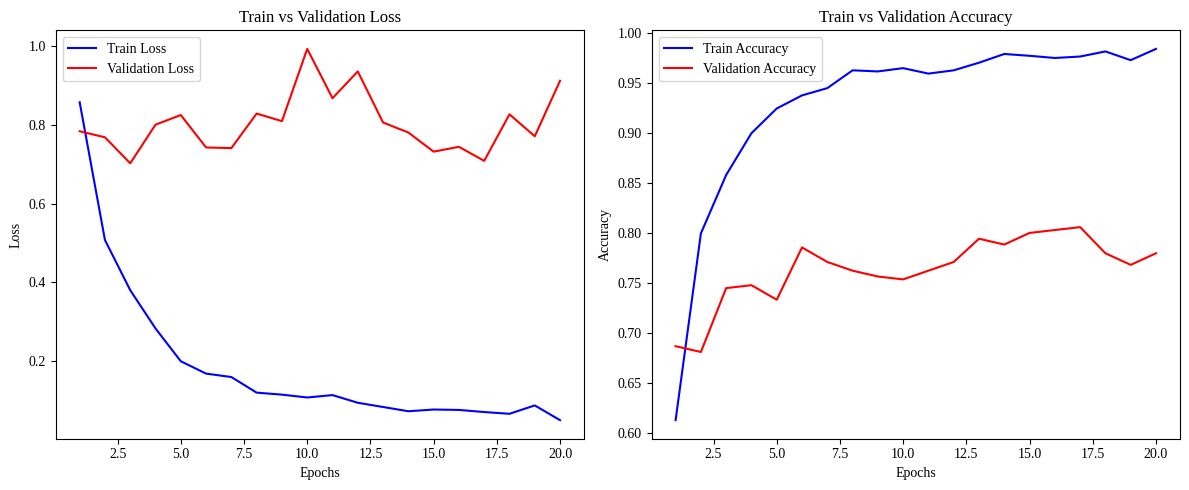

Classification Report:
                precision    recall  f1-score   support

        Eczema       0.75      0.81      0.78       139
     Psoriasis       0.67      0.66      0.67        56
Tinea_Ringworm       0.89      0.83      0.86       150

      accuracy                           0.79       345
     macro avg       0.77      0.77      0.77       345
  weighted avg       0.80      0.79      0.80       345

Confusion Matrix:


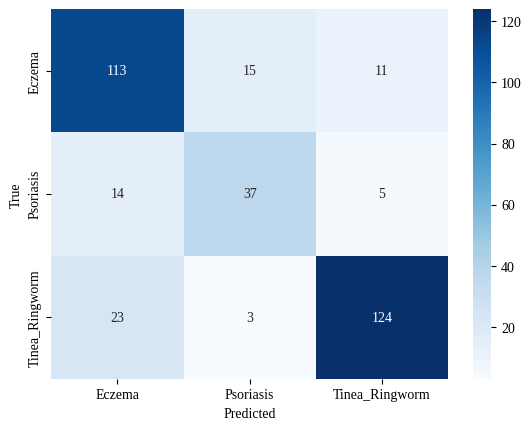

In [7]:
model = Modified_InceptionV3(num_classes=3)
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(DEVICE) 
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, WeightedRandomSampler
from transformers import ViTForImageClassification, ViTFeatureExtractor
import timm
import os
from collections import Counter
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random
from matplotlib import font_manager as fm
font_path = "/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf"

# ✅ Force-add the font
fm.fontManager.addfont(font_path)

# ✅ Create a font properties object
liberation_font = fm.FontProperties(fname=font_path)
# ✅ Apply the font globally to all plots
plt.rcParams['font.family'] = liberation_font.get_name()

# ------------------- Config ------------------- #
DATA_DIR = '/mnt/c/Users/pragy/Downloads/Dataset/SD260/Split_Dataset'  # should have train/val/test folders
BATCH_SIZE = 32
NUM_CLASSES = 3
NUM_EPOCHS = 20

MODEL_NAME = 'inception_v3'  # one of: resnet50, efficientnet_b0, inception_v3, convnext_tiny, vit_b_16, swin_tiny


def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(42)

# ------------------- Transforms ------------------- #
train_transform = transforms.Compose([
    transforms.Resize((299,299)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize([0.5439, 0.4471, 0.4324], [0.2387, 0.2132, 0.2141])
])
val_test_transform = transforms.Compose([
    transforms.Resize((299,299)),
    transforms.ToTensor(),
    transforms.Normalize([0.5439, 0.4471, 0.4324], [0.2387, 0.2132, 0.2141])
])


# ------------------- Dataset ------------------- #
train_dataset = ImageFolder(os.path.join(DATA_DIR, 'train'), transform=train_transform)
val_dataset = ImageFolder(os.path.join(DATA_DIR, 'val'), transform=val_test_transform)
test_dataset = ImageFolder(os.path.join(DATA_DIR, 'test'), transform=val_test_transform)

# ------------------- DataLoader ------------------- #
# Weighted sampling to handle class imbalance
class_counts = [count for _, count in Counter(train_dataset.targets).items()]
class_weights = 1. / np.array(class_counts, dtype=np.float32)
weights = class_weights[train_dataset.targets]

sampler = WeightedRandomSampler(weights, len(weights))

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


# ------------------- Loss and Optimizer ------------------- #
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


# ------------------- Training Function with Loss and Accuracy Per Epoch ------------------- #
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    best_model_wts = model.state_dict()
    best_acc = 0.0

    # Lists to store the loss and accuracy values per epoch
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0

        # Training loop
        for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()

            outputs = model(inputs)
            if isinstance(outputs, tuple):
                outputs = outputs[0]

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Track accuracy
            _, preds = torch.max(outputs, 1)
            correct_preds += torch.sum(preds == labels).item()
            total_preds += labels.size(0)
            running_loss += loss.item()

        # Calculate average training loss and accuracy for the epoch
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct_preds / total_preds

        # Append values for the current epoch
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_acc:.4f}")

        # Validation loop
        model.eval()
        val_loss = 0.0
        val_correct_preds = 0
        val_total_preds = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                # Track accuracy
                _, preds = torch.max(outputs, 1)
                val_correct_preds += torch.sum(preds == labels).item()
                val_total_preds += labels.size(0)
                val_loss += loss.item()

        # Calculate average validation loss and accuracy for the epoch
        val_epoch_loss = val_loss / len(val_loader)
        val_epoch_acc = val_correct_preds / val_total_preds

        # Append values for the current epoch
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc)

        print(f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_acc:.4f}")

        # Save the best model
        if val_epoch_acc > best_acc:
            best_acc = val_epoch_acc
            best_model_wts = model.state_dict()

    # Load the best model weights
    model.load_state_dict(best_model_wts)

    # Return model and the lists of losses and accuracies
    return model, train_losses, val_losses, train_accuracies, val_accuracies

# ------------------- Training the Model ------------------- #
trained_model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, criterion, optimizer, NUM_EPOCHS
)

# ------------------- Plotting Loss and Accuracy ------------------- #
def plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, NUM_EPOCHS + 1)

    # Plot Training and Validation Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss', color='blue')
    plt.plot(epochs, val_losses, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train vs Validation Loss')
    plt.legend()

    # Plot Training and Validation Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy', color='blue')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train vs Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# ------------------- Plot Loss and Accuracy ------------------- #
plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies)

# ------------------- Evaluate on Test Set ------------------- #
def evaluate_model(model, test_loader):
    model.eval()
    test_preds = []
    test_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            test_preds.extend(preds.cpu().numpy())
            test_labels.extend(labels.cpu().numpy())

    print("Classification Report:")
    print(classification_report(test_labels, test_preds, target_names=test_loader.dataset.classes))

    print("Confusion Matrix:")
    cm = confusion_matrix(test_labels, test_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_loader.dataset.classes, yticklabels=test_loader.dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
torch.save(model.state_dict(), '/mnt/c/Users/pragy/Downloads/Dataset/SD260/Models/Modified_inception_v3.pth')
evaluate_model(trained_model, test_loader)


In [11]:
class SEBlock(nn.Module):
    def __init__(self, channel, reduction=16):
        super(SEBlock, self).__init__()
        self.squeeze = nn.AdaptiveAvgPool2d(1)
        self.excitation = nn.Sequential(
            nn.Conv2d(channel, channel // reduction, 1),
            nn.ReLU(inplace=True),
            nn.Conv2d(channel // reduction, channel, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        scale = self.excitation(self.squeeze(x))
        return x * scale

class Modified1_InceptionV3(nn.Module):
    def __init__(self, num_classes):
        super(Modified1_InceptionV3, self).__init__()
        self.base_model = models.inception_v3(pretrained=True, aux_logits=True)

        # Insert SE block after Mixed_5b
        self.base_model.Mixed_5b = nn.Sequential(
            self.base_model.Mixed_5b,
            SEBlock(256)
        )

        # Replace FC layers
        self.base_model.fc = nn.Sequential(
            nn.Linear(2048, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

        self.base_model.AuxLogits.fc = nn.Sequential(
            nn.Linear(768, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        return self.base_model(x)


Epoch 1/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:21<00:00,  1.62s/it]


Epoch 1/20, Train Loss: 0.8515, Train Accuracy: 0.6135
Validation Loss: 0.7847, Validation Accuracy: 0.6551


Epoch 2/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:21<00:00,  1.62s/it]


Epoch 2/20, Train Loss: 0.5003, Train Accuracy: 0.8049
Validation Loss: 0.7943, Validation Accuracy: 0.6899


Epoch 3/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:20<00:00,  1.61s/it]


Epoch 3/20, Train Loss: 0.3753, Train Accuracy: 0.8550
Validation Loss: 0.6735, Validation Accuracy: 0.7072


Epoch 4/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:19<00:00,  1.61s/it]


Epoch 4/20, Train Loss: 0.2694, Train Accuracy: 0.9028
Validation Loss: 0.8710, Validation Accuracy: 0.7246


Epoch 5/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:19<00:00,  1.60s/it]


Epoch 5/20, Train Loss: 0.2046, Train Accuracy: 0.9202
Validation Loss: 0.7646, Validation Accuracy: 0.7420


Epoch 6/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:20<00:00,  1.62s/it]


Epoch 6/20, Train Loss: 0.1747, Train Accuracy: 0.9405
Validation Loss: 0.7761, Validation Accuracy: 0.7420


Epoch 7/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:23<00:00,  1.64s/it]


Epoch 7/20, Train Loss: 0.1567, Train Accuracy: 0.9492
Validation Loss: 0.7466, Validation Accuracy: 0.7739


Epoch 8/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:24<00:00,  1.66s/it]


Epoch 8/20, Train Loss: 0.1178, Train Accuracy: 0.9594
Validation Loss: 0.8240, Validation Accuracy: 0.7768


Epoch 9/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [02:21<00:00,  1.62s/it]


Epoch 9/20, Train Loss: 0.1256, Train Accuracy: 0.9554
Validation Loss: 0.8234, Validation Accuracy: 0.7768


Epoch 10/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:20<00:00,  1.61s/it]


Epoch 10/20, Train Loss: 0.1232, Train Accuracy: 0.9605
Validation Loss: 0.7034, Validation Accuracy: 0.7913


Epoch 11/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:20<00:00,  1.61s/it]


Epoch 11/20, Train Loss: 0.1310, Train Accuracy: 0.9608
Validation Loss: 0.8468, Validation Accuracy: 0.7739


Epoch 12/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:19<00:00,  1.61s/it]


Epoch 12/20, Train Loss: 0.0845, Train Accuracy: 0.9732
Validation Loss: 0.7997, Validation Accuracy: 0.7826


Epoch 13/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:19<00:00,  1.61s/it]


Epoch 13/20, Train Loss: 0.0685, Train Accuracy: 0.9753
Validation Loss: 0.8056, Validation Accuracy: 0.7797


Epoch 14/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:18<00:00,  1.60s/it]


Epoch 14/20, Train Loss: 0.0911, Train Accuracy: 0.9688
Validation Loss: 0.8236, Validation Accuracy: 0.7768


Epoch 15/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:19<00:00,  1.61s/it]


Epoch 15/20, Train Loss: 0.0781, Train Accuracy: 0.9761
Validation Loss: 0.7889, Validation Accuracy: 0.7855


Epoch 16/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:19<00:00,  1.60s/it]


Epoch 16/20, Train Loss: 0.0830, Train Accuracy: 0.9681
Validation Loss: 0.8592, Validation Accuracy: 0.7942


Epoch 17/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:19<00:00,  1.61s/it]


Epoch 17/20, Train Loss: 0.0571, Train Accuracy: 0.9819
Validation Loss: 0.7903, Validation Accuracy: 0.8029


Epoch 18/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:18<00:00,  1.60s/it]


Epoch 18/20, Train Loss: 0.0493, Train Accuracy: 0.9895
Validation Loss: 0.9949, Validation Accuracy: 0.7710


Epoch 19/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:19<00:00,  1.61s/it]


Epoch 19/20, Train Loss: 0.0545, Train Accuracy: 0.9826
Validation Loss: 1.1042, Validation Accuracy: 0.7768


Epoch 20/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [02:19<00:00,  1.60s/it]


Epoch 20/20, Train Loss: 0.0627, Train Accuracy: 0.9790
Validation Loss: 0.9876, Validation Accuracy: 0.7884


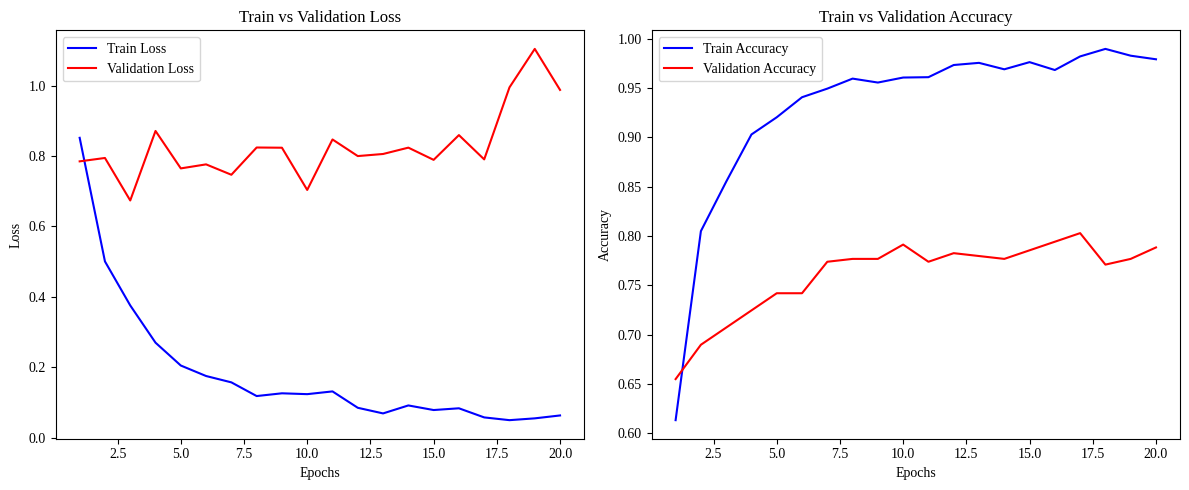

Classification Report:
                precision    recall  f1-score   support

        Eczema       0.84      0.85      0.84       139
     Psoriasis       0.72      0.55      0.63        56
Tinea_Ringworm       0.84      0.90      0.87       150

      accuracy                           0.82       345
     macro avg       0.80      0.77      0.78       345
  weighted avg       0.82      0.82      0.82       345

Confusion Matrix:


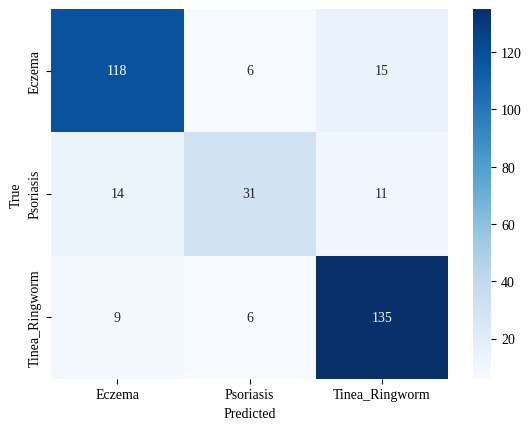

In [12]:
model = Modified1_InceptionV3(num_classes=3)
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(DEVICE) 
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, WeightedRandomSampler
from transformers import ViTForImageClassification, ViTFeatureExtractor
import timm
import os
from collections import Counter
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random
from matplotlib import font_manager as fm
font_path = "/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf"

# ✅ Force-add the font
fm.fontManager.addfont(font_path)

# ✅ Create a font properties object
liberation_font = fm.FontProperties(fname=font_path)
# ✅ Apply the font globally to all plots
plt.rcParams['font.family'] = liberation_font.get_name()

# ------------------- Config ------------------- #
DATA_DIR = '/mnt/c/Users/pragy/Downloads/Dataset/SD260/Split_Dataset'  # should have train/val/test folders
BATCH_SIZE = 32
NUM_CLASSES = 3
NUM_EPOCHS = 20



def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(42)

# ------------------- Transforms ------------------- #
train_transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize([0.5439, 0.4471, 0.4324], [0.2387, 0.2132, 0.2141])
])
val_test_transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize([0.5439, 0.4471, 0.4324], [0.2387, 0.2132, 0.2141])
])


# ------------------- Dataset ------------------- #
train_dataset = ImageFolder(os.path.join(DATA_DIR, 'train'), transform=train_transform)
val_dataset = ImageFolder(os.path.join(DATA_DIR, 'val'), transform=val_test_transform)
test_dataset = ImageFolder(os.path.join(DATA_DIR, 'test'), transform=val_test_transform)

# ------------------- DataLoader ------------------- #
# Weighted sampling to handle class imbalance
class_counts = [count for _, count in Counter(train_dataset.targets).items()]
class_weights = 1. / np.array(class_counts, dtype=np.float32)
weights = class_weights[train_dataset.targets]

sampler = WeightedRandomSampler(weights, len(weights))

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


# ------------------- Loss and Optimizer ------------------- #
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


# ------------------- Training Function with Loss and Accuracy Per Epoch ------------------- #
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    best_model_wts = model.state_dict()
    best_acc = 0.0

    # Lists to store the loss and accuracy values per epoch
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0

        # Training loop
        for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()

            outputs = model(inputs)
            if isinstance(outputs, tuple):
                outputs = outputs[0]

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Track accuracy
            _, preds = torch.max(outputs, 1)
            correct_preds += torch.sum(preds == labels).item()
            total_preds += labels.size(0)
            running_loss += loss.item()

        # Calculate average training loss and accuracy for the epoch
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct_preds / total_preds

        # Append values for the current epoch
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_acc:.4f}")

        # Validation loop
        model.eval()
        val_loss = 0.0
        val_correct_preds = 0
        val_total_preds = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                # Track accuracy
                _, preds = torch.max(outputs, 1)
                val_correct_preds += torch.sum(preds == labels).item()
                val_total_preds += labels.size(0)
                val_loss += loss.item()

        # Calculate average validation loss and accuracy for the epoch
        val_epoch_loss = val_loss / len(val_loader)
        val_epoch_acc = val_correct_preds / val_total_preds

        # Append values for the current epoch
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc)

        print(f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_acc:.4f}")

        # Save the best model
        if val_epoch_acc > best_acc:
            best_acc = val_epoch_acc
            best_model_wts = model.state_dict()

    # Load the best model weights
    model.load_state_dict(best_model_wts)

    # Return model and the lists of losses and accuracies
    return model, train_losses, val_losses, train_accuracies, val_accuracies

# ------------------- Training the Model ------------------- #
trained_model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, criterion, optimizer, NUM_EPOCHS
)

# ------------------- Plotting Loss and Accuracy ------------------- #
def plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, NUM_EPOCHS + 1)

    # Plot Training and Validation Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss', color='blue')
    plt.plot(epochs, val_losses, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train vs Validation Loss')
    plt.legend()

    # Plot Training and Validation Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy', color='blue')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train vs Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# ------------------- Plot Loss and Accuracy ------------------- #
plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies)

# ------------------- Evaluate on Test Set ------------------- #
def evaluate_model(model, test_loader):
    model.eval()
    test_preds = []
    test_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            test_preds.extend(preds.cpu().numpy())
            test_labels.extend(labels.cpu().numpy())

    print("Classification Report:")
    print(classification_report(test_labels, test_preds, target_names=test_loader.dataset.classes))

    print("Confusion Matrix:")
    cm = confusion_matrix(test_labels, test_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_loader.dataset.classes, yticklabels=test_loader.dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
torch.save(model.state_dict(), '/mnt/c/Users/pragy/Downloads/Dataset/SD260/Models/Modified1_inception_v3.pth')
evaluate_model(trained_model, test_loader)


In [7]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms, models
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import label_binarize
from torchvision.models import resnet50
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights, vit_b_16, ViT_B_16_Weights
import timm
from transformers import ViTForImageClassification, ViTConfig
from matplotlib import font_manager as fm

# Directory configuration
MODEL_DIR = "/mnt/c/Users/pragy/Downloads/Dataset/SD260/Models"
DATA_DIR = '/mnt/c/Users/pragy/Downloads/Dataset/SD260/Split_Dataset'
test_classes = ['Eczema', 'Psoriasis', 'Tinea_Ringworm']

# Configure font
font_path = "/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf"
fm.fontManager.addfont(font_path)
liberation_font = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = liberation_font.get_name()

# Define transformation for test data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5439, 0.4471, 0.4324], [0.2387, 0.2132, 0.2141]),
])

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load datasets
test_dataset = datasets.ImageFolder(os.path.join(DATA_DIR, 'test'), transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Model definitions (keeping all your model class definitions)
class ModifiedResNet50(nn.Module):
    def __init__(self, num_classes=3):
        super(ModifiedResNet50, self).__init__()
        base_model = models.resnet50(pretrained=True)
        
        # Remove the original FC layer
        self.feature_extractor = nn.Sequential(*list(base_model.children())[:-2])  # Exclude avgpool & fc

        self.pool = nn.AdaptiveAvgPool2d((1, 1))  # GAP
        self.classifier = nn.Sequential(
            nn.Flatten(),                           # Flatten after GAP
            nn.Linear(2048, 512),                   # FC layer
            nn.BatchNorm1d(512),                    # BatchNorm
            nn.LeakyReLU(0.1, inplace=True),        # LeakyReLU
            nn.Dropout(0.4),
            nn.Linear(512, num_classes)             # Final classification layer
        )

    def forward(self, x):
        x = self.feature_extractor(x)
        x = self.pool(x)
        x = self.classifier(x)
        return x

class Modified1ResNet50(nn.Module):
    def __init__(self, num_classes=3):
        super(Modified1ResNet50, self).__init__()
        base_model = models.resnet50(pretrained=True)
        
        # Remove the original FC layer
        self.feature_extractor = nn.Sequential(*list(base_model.children())[:-2])  # Exclude avgpool & fc

        self.pool = nn.AdaptiveAvgPool2d((1, 1))  # GAP
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(2048, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.1),
            nn.Dropout(0.4),
            nn.Linear(512, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(0.1),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)  
        )

    def forward(self, x):
        x = self.feature_extractor(x)
        x = self.pool(x)
        x = self.classifier(x)
        return x

class Modified2ResNet50(nn.Module):
    def __init__(self, num_classes=3):
        super(Modified2ResNet50, self).__init__()
        base_model = models.resnet50(pretrained=True)
        
        # Remove the original FC layer
        self.feature_extractor = nn.Sequential(*list(base_model.children())[:-2])  # Exclude avgpool & fc

        self.pool = nn.AdaptiveAvgPool2d((1, 1))  # GAP
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(2048, 512),
            nn.BatchNorm1d(512),
            nn.SiLU(),                  # Replaces LeakyReLU
            nn.Dropout(0.4),
            nn.Linear(512, 128),
            nn.BatchNorm1d(128),
            nn.SiLU(),                  # Replaces LeakyReLU
            nn.Dropout(0.3),
            nn.Linear(128, num_classes) 
        )

    def forward(self, x):
        x = self.feature_extractor(x)
        x = self.pool(x)
        x = self.classifier(x)
        return x

class DenseLayer(nn.Module):
    def __init__(self, in_channels, growth_rate=32, bn_size=4, drop_rate=0.2):
        super(DenseLayer, self).__init__()
        inter_channels = bn_size * growth_rate
        self.net = nn.Sequential(
            nn.BatchNorm2d(in_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels, inter_channels, kernel_size=1, stride=1, bias=False),
            nn.BatchNorm2d(inter_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(inter_channels, growth_rate, kernel_size=3, stride=1, padding=1, bias=False),
        )
        self.drop_rate = drop_rate

    def forward(self, x):
        new_features = self.net(x)
        if self.drop_rate > 0:
            new_features = nn.functional.dropout(new_features, p=self.drop_rate, training=self.training)
        return torch.cat([x, new_features], 1)

class DenseBlock(nn.Module):
    def __init__(self, num_layers, in_channels, growth_rate=32):
        super(DenseBlock, self).__init__()
        layers = []
        for i in range(num_layers):
            layers.append(DenseLayer(in_channels + i * growth_rate, growth_rate))
        self.block = nn.Sequential(*layers)

    def forward(self, x):
        return self.block(x)

class TransitionLayer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(TransitionLayer, self).__init__()
        self.transition = nn.Sequential(
            nn.BatchNorm2d(in_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False),
            nn.AvgPool2d(2, stride=2)
        )

    def forward(self, x):
        return self.transition(x)

class Modified3ResNet50(nn.Module):
    def __init__(self, num_classes=3):
        super(Modified3ResNet50, self).__init__()
        base_model = resnet50(weights=None)  # or weights='IMAGENET1K_V1' if using pretrained

        # Keep all layers up to layer3
        self.backbone = nn.Sequential(
            base_model.conv1,
            base_model.bn1,
            base_model.relu,
            base_model.maxpool,
            base_model.layer1,
            base_model.layer2,
            base_model.layer3,
        )

        # Replace layer4 with DenseBlock
        self.dense_block = nn.Sequential(
            DenseBlock(num_layers=4, in_channels=1024, growth_rate=32),
            TransitionLayer(1024 + 4 * 32, 1024)
        )

        # Global pooling
        self.pool = nn.AdaptiveAvgPool2d((1, 1))

        # Custom classifier head
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.SiLU(),
            nn.Dropout(0.4),
            nn.Linear(512, 128),
            nn.BatchNorm1d(128),
            nn.SiLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.backbone(x)
        x = self.dense_block(x)
        x = self.pool(x)
        x = self.classifier(x)
        return x

class ModifiedEfficientNetB0(nn.Module):
    def __init__(self, num_classes=3, freeze_blocks=5):
        super(ModifiedEfficientNetB0, self).__init__()
        self.base_model = efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)

        # Optionally freeze first N feature blocks
        for i, param in enumerate(self.base_model.features):
            if i < freeze_blocks:
                for p in param.parameters():
                    p.requires_grad = False

        in_features = self.base_model.classifier[1].in_features

        # Replace classifier
        self.base_model.classifier = nn.Sequential(
            nn.Dropout(p=0.4, inplace=True),
            nn.Linear(in_features, 512),
            nn.BatchNorm1d(512),
            nn.SiLU(inplace=True),
            nn.Dropout(p=0.3, inplace=True),
            nn.Linear(512, 128),
            nn.BatchNorm1d(128),
            nn.SiLU(inplace=True),
            nn.Dropout(p=0.2, inplace=True),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.base_model(x)

class Modified_InceptionV3(nn.Module):
    def __init__(self, num_classes=3):
        super(Modified_InceptionV3, self).__init__()
        self.base_model = models.inception_v3(pretrained=True, aux_logits=True)

        self.base_model.fc = nn.Sequential(
            nn.Linear(2048, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

        self.base_model.AuxLogits.fc = nn.Sequential(
            nn.Linear(768, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        return self.base_model(x)

class SEBlock(nn.Module):
    def __init__(self, channel, reduction=16):
        super(SEBlock, self).__init__()
        self.squeeze = nn.AdaptiveAvgPool2d(1)
        self.excitation = nn.Sequential(
            nn.Conv2d(channel, channel // reduction, 1),
            nn.ReLU(inplace=True),
            nn.Conv2d(channel // reduction, channel, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        scale = self.excitation(self.squeeze(x))
        return x * scale

class Modified1_InceptionV3(nn.Module):
    def __init__(self, num_classes=3):
        super(Modified1_InceptionV3, self).__init__()
        self.base_model = models.inception_v3(pretrained=True, aux_logits=True)

        # Insert SE block after Mixed_5b
        self.base_model.Mixed_5b = nn.Sequential(
            self.base_model.Mixed_5b,
            SEBlock(256)
        )

        # Replace FC layers
        self.base_model.fc = nn.Sequential(
            nn.Linear(2048, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

        self.base_model.AuxLogits.fc = nn.Sequential(
            nn.Linear(768, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        if self.training:
            main_output, aux_output = self.base_model(x)
            return main_output, aux_output
        else:
            return self.base_model(x)

# Initialize ViT model with custom head
def initialize_vit_model(num_classes=3):
    model = vit_b_16(weights=ViT_B_16_Weights.IMAGENET1K_V1)
    # Replace the head with our own classifier for 3 classes
    model.heads = nn.Sequential(
        nn.Linear(model.hidden_dim, 512),
        nn.LayerNorm(512),
        nn.GELU(),
        nn.Dropout(0.1),
        nn.Linear(512, num_classes)
    )
    return model

# Define a proper model class mapping - with additional models
model_class_mapping = {
    'modified_resnet50.pth': ModifiedResNet50,
    'modified1_resnet50.pth': Modified1ResNet50,
    'modified2_resnet50.pth': Modified2ResNet50,
    'modified3_resnet50.pth': Modified3ResNet50,
    'modified_inception_v3.pth': Modified_InceptionV3,
    'modified1_inception_v3.pth': Modified1_InceptionV3,
    'modified_efficientnetb0.pth': ModifiedEfficientNetB0,
    'resnet50.pth': 'resnet50',
    'inception_v3.pth': 'inception_v3',
    'efficientnet_b0.pth': 'efficientnet_b0',
    'vit_b_16.pth': 'vit_b_16'
}

# Function to load a model
def load_model(model_path, model_name, num_classes=3):
    print(f"Loading model: {model_name} from {model_path}")
    model_name_lower = model_name.lower()
    
    # Check if model exists in mapping
    if model_name_lower not in model_class_mapping:
        raise ValueError(f"Model '{model_name}' not recognized")
        
    # Get the model class or identifier
    model_class_or_name = model_class_mapping[model_name_lower]
    
    # Initialize model based on class or identifier
    if model_class_or_name == 'resnet50':
        model = models.resnet50(pretrained=True)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif model_class_or_name == 'inception_v3':
        # Fix: Initialize with aux_logits=True for compatibility with the saved weights
        model = models.inception_v3(pretrained=True, aux_logits=True)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
        # Modify AuxLogits classifier as well
        model.AuxLogits.fc = nn.Linear(model.AuxLogits.fc.in_features, num_classes)
    elif model_class_or_name == 'efficientnet_b0':
        # Use timm implementation for EfficientNet which may be more compatible with your saved weights
        try:
            model = timm.create_model('efficientnet_b0', pretrained=True, num_classes=num_classes)
        except:
            # Fallback to torchvision implementation with strict=False for loading weights
            print("Falling back to torchvision implementation")
            model = efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)
            model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    elif model_class_or_name == 'vit_b_16':
        try:
            # Use the Hugging Face implementation instead of torchvision
            model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224-in21k", 
                                                             num_labels=num_classes)
            state_dict = torch.load(model_path, map_location=device)
            model.load_state_dict(state_dict)
            print(f"Successfully loaded weights for {model_name}")
        except Exception as e:
            print(f"Error loading weights for {model_name}: {e}")
            print(f"Using pretrained model instead for {model_name}")
            # Just use the pretrained model
            model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224-in21k", 
                                                             num_labels=num_classes)
    else:
        # For custom models that are actual classes
        model = model_class_or_name(num_classes=num_classes)
    
    # Load model weights
    try:
        state_dict = torch.load(model_path, map_location=device)
        
        # For efficientnet models, try loading with strict=False to handle key mismatches
        if model_name_lower == 'efficientnet_b0.pth':
            model.load_state_dict(state_dict, strict=False)
            print(f"Loaded {model_name} weights with strict=False to handle architecture differences")
        else:
            # For InceptionV3, also use strict=False to handle any aux_logits differences
            if model_name_lower == 'inception_v3.pth':
                model.load_state_dict(state_dict, strict=False)
                print(f"Loaded {model_name} weights with strict=False to handle aux_logits differences")
            else:
                model.load_state_dict(state_dict)
            
        print(f"Successfully loaded weights for {model_name}")
    except Exception as e:
        print(f"Error loading weights for {model_name}: {e}")
        if model_name_lower in ['efficientnet_b0.pth', 'inception_v3.pth', 'vit_b_16.pth']:
            print(f"Using pretrained model instead for {model_name}")
            # Continue with the pretrained model
        else:
            raise
    
    model = model.to(device)
    model.eval()
    return model

# Handle InceptionV3 input size requirements
def process_batch_with_model(model, inputs, labels, model_name_lower):
    # InceptionV3 expects 299x299 inputs
    if 'inception_v3' in model_name_lower:
        if inputs.shape[2] != 299:
            resized_inputs = torch.nn.functional.interpolate(inputs, size=(299, 299), mode='bilinear', align_corners=False)
            outputs = model(resized_inputs)
        else:
            outputs = model(inputs)
    else:
        outputs = model(inputs)

    # For HuggingFace ViT models, extract logits
    if isinstance(outputs, dict) or hasattr(outputs, 'logits'):
        outputs = outputs.logits

    # Handle InceptionV3 outputs (tuple)
    if isinstance(outputs, tuple):
        outputs = outputs[0]

    _, preds = torch.max(outputs, 1)
    probabilities = torch.softmax(outputs, dim=1)

    return preds, probabilities


# Calculate sensitivity and specificity
def calculate_sensitivity_specificity(cm):
    """Calculate sensitivity and specificity for each class from confusion matrix"""
    n_classes = cm.shape[0]
    sensitivity = np.zeros(n_classes)
    specificity = np.zeros(n_classes)
    
    for i in range(n_classes):
        # True Positive for class i
        tp = cm[i, i]
        # False Negative for class i
        fn = np.sum(cm[i, :]) - tp
        # False Positive for class i
        fp = np.sum(cm[:, i]) - tp
        # True Negative for class i
        tn = np.sum(cm) - tp - fn - fp
        
        # Calculate metrics
        sensitivity[i] = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity[i] = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    # Also calculate macro-average
    macro_sensitivity = np.mean(sensitivity)
    macro_specificity = np.mean(specificity)
    
    return sensitivity, specificity, macro_sensitivity, macro_specificity

# Functions for evaluation metrics
def plot_confusion_matrix(cm, labels, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(f"Confusion Matrix - {model_name}", fontproperties=liberation_font)
    plt.xlabel('Predicted', fontproperties=liberation_font)
    plt.ylabel('Actual', fontproperties=liberation_font)
    plt.savefig(os.path.join(MODEL_DIR, f"{model_name}_confusion_matrix.png"))
    plt.close()

def plot_roc_curve_multiclass(y_test, y_score, class_names, model_name):
    """
    Plot ROC curve for multiclass classification.
    
    Parameters:
    y_test (array): One-hot encoded true class labels
    y_score (array): Predicted probabilities for each class
    class_names (list): List of class names
    model_name (str): Name of the model for the plot title
    """
    n_classes = len(class_names)
    
    # Plot ROC curve for each class
    plt.figure(figsize=(10, 8))
    
    # Compute micro-average ROC curve and ROC area
    fpr = {}
    tpr = {}
    roc_auc = {}
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = roc_auc_score(y_test[:, i], y_score[:, i])
        plt.plot(fpr[i], tpr[i], lw=2, 
                 label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')
    
    # Plot the diagonal
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontproperties=liberation_font)
    plt.ylabel('True Positive Rate', fontproperties=liberation_font)
    plt.title(f'ROC Curve (Multiclass) - {model_name}', fontproperties=liberation_font)
    plt.legend(loc="lower right")
    plt.savefig(os.path.join(MODEL_DIR, f"{model_name}_roc_curve_multiclass.png"))
    plt.close()
    
    return roc_auc

# Main evaluation loop
def evaluate_models():
    results = []
    
    # List model files in directory
    model_files = [f for f in os.listdir(MODEL_DIR) if f.lower().endswith('.pth') and f.lower() in model_class_mapping]
    
    print(f"Found {len(model_files)} models to evaluate: {model_files}")
    
    for model_filename in model_files:
        model_path = os.path.join(MODEL_DIR, model_filename)
        model_name_lower = model_filename.lower()
        
        try:
            print(f"Evaluating model: {model_filename}")
            model = load_model(model_path, model_filename)
            
            all_preds = []
            all_labels = []
            all_probabilities = []
            
            with torch.no_grad():
                for inputs, labels in test_loader:
                    inputs = inputs.to(device)
                    labels = labels.to(device)
                    
                    # Process batch using helper function that handles model-specific requirements
                    preds, probabilities = process_batch_with_model(model, inputs, labels, model_name_lower)
                    
                    all_preds.append(preds.cpu().numpy())
                    all_labels.append(labels.cpu().numpy())
                    all_probabilities.append(probabilities.cpu().numpy())
            
            # Flatten lists
            all_preds = np.concatenate(all_preds)
            all_labels = np.concatenate(all_labels)
            all_probabilities = np.concatenate(all_probabilities)
            
            # Compute classification metrics
            cm = confusion_matrix(all_labels, all_preds)
            cr = classification_report(all_labels, all_preds, output_dict=True)
            accuracy = accuracy_score(all_labels, all_preds)
            precision, recall, fscore, _ = precision_recall_fscore_support(all_labels, all_preds, average='macro')
            
            # Calculate sensitivity and specificity
            sensitivity_per_class, specificity_per_class, macro_sensitivity, macro_specificity = calculate_sensitivity_specificity(cm)
            
            # Binarize labels for ROC-AUC (one-hot encoding)
            all_labels_bin = label_binarize(all_labels, classes=range(len(test_classes)))
            
            # Plot confusion matrix
            plot_confusion_matrix(cm, test_classes, model_filename)
            
            # Plot multiclass ROC curve and get AUC scores per class
            class_auc_dict = plot_roc_curve_multiclass(all_labels_bin, all_probabilities, test_classes, model_filename)
            
            # Calculate average AUC across all classes (macro average)
            macro_auc = np.mean(list(class_auc_dict.values()))
            
            # Store detailed results for each class
            class_results = {}
            for i, class_name in enumerate(test_classes):
                class_results[f"{class_name}_AUC"] = class_auc_dict[i]
                class_results[f"{class_name}_Precision"] = cr[str(i)]['precision']
                class_results[f"{class_name}_Recall"] = cr[str(i)]['recall'] 
                class_results[f"{class_name}_F1"] = cr[str(i)]['f1-score']
                class_results[f"{class_name}_Sensitivity"] = sensitivity_per_class[i]
                class_results[f"{class_name}_Specificity"] = specificity_per_class[i]
            
            # Store results
            result_dict = {
                'Model': model_filename,
                'Accuracy': accuracy,
                'Macro_Precision': precision,
                'Macro_Recall': recall,
                'Macro_F1': fscore,
                'Macro_AUC': macro_auc,
                'Macro_Sensitivity': macro_sensitivity,
                'Macro_Specificity': macro_specificity
            }
            
            # Add per-class metrics
            result_dict.update(class_results)
            results.append(result_dict)
            
            print(f"Completed evaluation for {model_filename}")
            print(f"  Accuracy: {accuracy:.4f}, Macro AUC: {macro_auc:.4f}")
            print(f"  Sensitivity: {macro_sensitivity:.4f}, Specificity: {macro_specificity:.4f}")
            
        except Exception as e:
            print(f"Error evaluating model {model_filename}: {e}")
            import traceback
            traceback.print_exc()  # Print full traceback for better debugging
            continue
    
    # Save results to CSV
    if results:
        results_df = pd.DataFrame(results)
        results_df.to_csv(os.path.join(MODEL_DIR, 'model_evaluation_results.csv'), index=False)
        
        # Also save a more readable summary with just the main metrics
        summary_cols = ['Model', 'Accuracy', 'Macro_Precision', 'Macro_Recall', 'Macro_F1', 'Macro_AUC', 'Macro_Sensitivity', 'Macro_Specificity']
        summary_results = results_df[summary_cols]
        summary_results = summary_results.sort_values('Accuracy', ascending=False)
        summary_results.to_csv(os.path.join(MODEL_DIR, 'model_evaluation_summary.csv'), index=False)
        
        print("Evaluation completed and results saved.")
    else:
        print("No results were produced. Check errors above.")

# Run the evaluation
if __name__ == "__main__":
    evaluate_models()


Found 11 models to evaluate: ['efficientnet_b0.pth', 'inception_v3.pth', 'Modified1_inception_v3.pth', 'Modified1_resnet50.pth', 'Modified2_resnet50.pth', 'Modified3_resnet50.pth', 'Modified_efficientnetb0.pth', 'Modified_inception_v3.pth', 'Modified_resnet50.pth', 'resnet50.pth', 'vit_b_16.pth']
Evaluating model: efficientnet_b0.pth
Loading model: efficientnet_b0.pth from /mnt/c/Users/pragy/Downloads/Dataset/SD260/Models/efficientnet_b0.pth
Loaded efficientnet_b0.pth weights with strict=False to handle architecture differences
Successfully loaded weights for efficientnet_b0.pth
Completed evaluation for efficientnet_b0.pth
  Accuracy: 0.8174, Macro AUC: 0.9266
  Sensitivity: 0.7888, Specificity: 0.9042
Evaluating model: inception_v3.pth
Loading model: inception_v3.pth from /mnt/c/Users/pragy/Downloads/Dataset/SD260/Models/inception_v3.pth


/home/pragya/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/pragya/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loaded inception_v3.pth weights with strict=False to handle aux_logits differences
Successfully loaded weights for inception_v3.pth
Completed evaluation for inception_v3.pth
  Accuracy: 0.8203, Macro AUC: 0.9114
  Sensitivity: 0.7694, Specificity: 0.9011
Evaluating model: Modified1_inception_v3.pth
Loading model: Modified1_inception_v3.pth from /mnt/c/Users/pragy/Downloads/Dataset/SD260/Models/Modified1_inception_v3.pth


/home/pragya/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/pragya/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Successfully loaded weights for Modified1_inception_v3.pth
Completed evaluation for Modified1_inception_v3.pth
  Accuracy: 0.8000, Macro AUC: 0.8855
  Sensitivity: 0.7247, Specificity: 0.8905
Evaluating model: Modified1_resnet50.pth
Loading model: Modified1_resnet50.pth from /mnt/c/Users/pragy/Downloads/Dataset/SD260/Models/Modified1_resnet50.pth


/home/pragya/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/pragya/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Successfully loaded weights for Modified1_resnet50.pth
Completed evaluation for Modified1_resnet50.pth
  Accuracy: 0.8261, Macro AUC: 0.9217
  Sensitivity: 0.7670, Specificity: 0.9039
Evaluating model: Modified2_resnet50.pth
Loading model: Modified2_resnet50.pth from /mnt/c/Users/pragy/Downloads/Dataset/SD260/Models/Modified2_resnet50.pth


/home/pragya/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/pragya/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Successfully loaded weights for Modified2_resnet50.pth
Completed evaluation for Modified2_resnet50.pth
  Accuracy: 0.8464, Macro AUC: 0.9287
  Sensitivity: 0.8045, Specificity: 0.9153
Evaluating model: Modified3_resnet50.pth
Loading model: Modified3_resnet50.pth from /mnt/c/Users/pragy/Downloads/Dataset/SD260/Models/Modified3_resnet50.pth
Successfully loaded weights for Modified3_resnet50.pth
Completed evaluation for Modified3_resnet50.pth
  Accuracy: 0.5942, Macro AUC: 0.7669
  Sensitivity: 0.5994, Specificity: 0.7973
Evaluating model: Modified_efficientnetb0.pth
Loading model: Modified_efficientnetb0.pth from /mnt/c/Users/pragy/Downloads/Dataset/SD260/Models/Modified_efficientnetb0.pth
Successfully loaded weights for Modified_efficientnetb0.pth
Completed evaluation for Modified_efficientnetb0.pth
  Accuracy: 0.8464, Macro AUC: 0.9422
  Sensitivity: 0.8050, Specificity: 0.9150
Evaluating model: Modified_inception_v3.pth
Loading model: Modified_inception_v3.pth from /mnt/c/Users/pragy/

/home/pragya/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/pragya/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Successfully loaded weights for Modified_inception_v3.pth
Completed evaluation for Modified_inception_v3.pth
  Accuracy: 0.7942, Macro AUC: 0.8961
  Sensitivity: 0.7536, Specificity: 0.8884
Evaluating model: Modified_resnet50.pth
Loading model: Modified_resnet50.pth from /mnt/c/Users/pragy/Downloads/Dataset/SD260/Models/Modified_resnet50.pth


/home/pragya/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/pragya/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Successfully loaded weights for Modified_resnet50.pth
Completed evaluation for Modified_resnet50.pth
  Accuracy: 0.8174, Macro AUC: 0.9217
  Sensitivity: 0.7785, Specificity: 0.8988
Evaluating model: resnet50.pth
Loading model: resnet50.pth from /mnt/c/Users/pragy/Downloads/Dataset/SD260/Models/resnet50.pth


/home/pragya/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/pragya/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Successfully loaded weights for resnet50.pth
Completed evaluation for resnet50.pth
  Accuracy: 0.8377, Macro AUC: 0.9208
  Sensitivity: 0.7978, Specificity: 0.9122
Evaluating model: vit_b_16.pth
Loading model: vit_b_16.pth from /mnt/c/Users/pragy/Downloads/Dataset/SD260/Models/vit_b_16.pth


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Successfully loaded weights for vit_b_16.pth
Successfully loaded weights for vit_b_16.pth
Completed evaluation for vit_b_16.pth
  Accuracy: 0.8435, Macro AUC: 0.9413
  Sensitivity: 0.8054, Specificity: 0.9142
Evaluation completed and results saved.


In [ ]:
#Modified EfficientnetB0+ViT

In [2]:
import torch
import torch.nn as nn
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
from torchvision.models.vision_transformer import vit_b_16, ViT_B_16_Weights  # or vit_l_16 for large

class EfficientNetWithViT(nn.Module):
    def __init__(self, num_classes=3, freeze_blocks=5, use_pretrained_vit=False):
        super(EfficientNetWithViT, self).__init__()

        # Load EfficientNetB0
        self.effnet = efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)
        for param in self.effnet.features[:freeze_blocks]:
            param.requires_grad = False

        # Remove original classifier
        self.feature_extractor = nn.Sequential(
            self.effnet.features,
            self.effnet.avgpool,  # output shape: (B, 1280, 1, 1)
            nn.Flatten(start_dim=1)  # shape: (B, 1280)
        )

        # Project 1280-d to sequence of tokens (e.g., 8 tokens of 160-d)
        self.project_to_tokens = nn.Linear(1280, 160 * 8)  # shape -> (B, 1280) → (B, 1280) → reshape (B, 8, 160)

        # Lightweight ViT (or pretrained)
        self.vit_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=160, nhead=4, dim_feedforward=256, dropout=0.1, activation="gelu"),
            num_layers=2
        )

        # Classifier after ViT
        self.classifier = nn.Sequential(
            nn.Linear(160 * 8, 256),
            nn.BatchNorm1d(256),
            nn.SiLU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.feature_extractor(x)              # shape: (B, 1280)
        x = self.project_to_tokens(x)              # shape: (B, 1280) → (B, 1280)
        x = x.view(x.size(0), 8, 160)              # reshape to tokens: (B, 8, 160)

        x = self.vit_encoder(x)                    # output: (B, 8, 160)
        x = x.flatten(start_dim=1)                 # flatten: (B, 1280)

        x = self.classifier(x)                     # final output: (B, num_classes)
        return x


2025-05-22 19:46:16.805305: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-22 19:46:16.972594: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-22 19:46:17.013926: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 19:46:17.932665: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvi

Epoch 1/20, Train Loss: 0.8497, Train Accuracy: 0.6599
Validation Loss: 0.8861, Validation Accuracy: 0.6319


Epoch 2/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:44<00:00,  1.95it/s]


Epoch 2/20, Train Loss: 0.6766, Train Accuracy: 0.7839
Validation Loss: 0.8005, Validation Accuracy: 0.6754


Epoch 3/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:43<00:00,  2.00it/s]


Epoch 3/20, Train Loss: 0.5821, Train Accuracy: 0.8521
Validation Loss: 0.7721, Validation Accuracy: 0.7217


Epoch 4/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:42<00:00,  2.03it/s]


Epoch 4/20, Train Loss: 0.5241, Train Accuracy: 0.8858
Validation Loss: 0.7652, Validation Accuracy: 0.7507


Epoch 5/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:43<00:00,  2.01it/s]


Epoch 5/20, Train Loss: 0.4700, Train Accuracy: 0.9181
Validation Loss: 0.7611, Validation Accuracy: 0.7536


Epoch 6/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:50<00:00,  1.72it/s]


Epoch 6/20, Train Loss: 0.4360, Train Accuracy: 0.9365
Validation Loss: 0.7731, Validation Accuracy: 0.7565


Epoch 7/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:44<00:00,  1.94it/s]


Epoch 7/20, Train Loss: 0.4151, Train Accuracy: 0.9500
Validation Loss: 0.7469, Validation Accuracy: 0.7710


Epoch 8/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:42<00:00,  2.03it/s]


Epoch 8/20, Train Loss: 0.3998, Train Accuracy: 0.9572
Validation Loss: 0.7400, Validation Accuracy: 0.7739


Epoch 9/20: 100%|███████████████████████████████████████████████████████████████████████| 87/87 [00:43<00:00,  2.01it/s]


Epoch 9/20, Train Loss: 0.3917, Train Accuracy: 0.9637
Validation Loss: 0.7538, Validation Accuracy: 0.7623


Epoch 10/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:45<00:00,  1.90it/s]


Epoch 10/20, Train Loss: 0.3787, Train Accuracy: 0.9695
Validation Loss: 0.7541, Validation Accuracy: 0.7768


Epoch 11/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:42<00:00,  2.04it/s]


Epoch 11/20, Train Loss: 0.3712, Train Accuracy: 0.9761
Validation Loss: 0.7208, Validation Accuracy: 0.7768


Epoch 12/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:44<00:00,  1.94it/s]


Epoch 12/20, Train Loss: 0.3632, Train Accuracy: 0.9790
Validation Loss: 0.6977, Validation Accuracy: 0.7855


Epoch 13/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:42<00:00,  2.05it/s]


Epoch 13/20, Train Loss: 0.3580, Train Accuracy: 0.9855
Validation Loss: 0.7075, Validation Accuracy: 0.7826


Epoch 14/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:41<00:00,  2.08it/s]


Epoch 14/20, Train Loss: 0.3702, Train Accuracy: 0.9786
Validation Loss: 0.6982, Validation Accuracy: 0.7826


Epoch 15/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:42<00:00,  2.03it/s]


Epoch 15/20, Train Loss: 0.3567, Train Accuracy: 0.9801
Validation Loss: 0.7110, Validation Accuracy: 0.7681


Epoch 16/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:42<00:00,  2.07it/s]


Epoch 16/20, Train Loss: 0.3446, Train Accuracy: 0.9862
Validation Loss: 0.7004, Validation Accuracy: 0.7768


Epoch 17/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:43<00:00,  2.01it/s]


Epoch 17/20, Train Loss: 0.3399, Train Accuracy: 0.9884
Validation Loss: 0.6726, Validation Accuracy: 0.7913


Epoch 18/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:41<00:00,  2.11it/s]


Epoch 18/20, Train Loss: 0.3401, Train Accuracy: 0.9906
Validation Loss: 0.6939, Validation Accuracy: 0.7797


Epoch 19/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:42<00:00,  2.03it/s]


Epoch 19/20, Train Loss: 0.3328, Train Accuracy: 0.9913
Validation Loss: 0.6949, Validation Accuracy: 0.7884


Epoch 20/20: 100%|██████████████████████████████████████████████████████████████████████| 87/87 [00:41<00:00,  2.07it/s]


Epoch 20/20, Train Loss: 0.3299, Train Accuracy: 0.9938
Validation Loss: 0.6740, Validation Accuracy: 0.7884

✅ Total Training Time: 967.36 seconds (16.12 minutes)


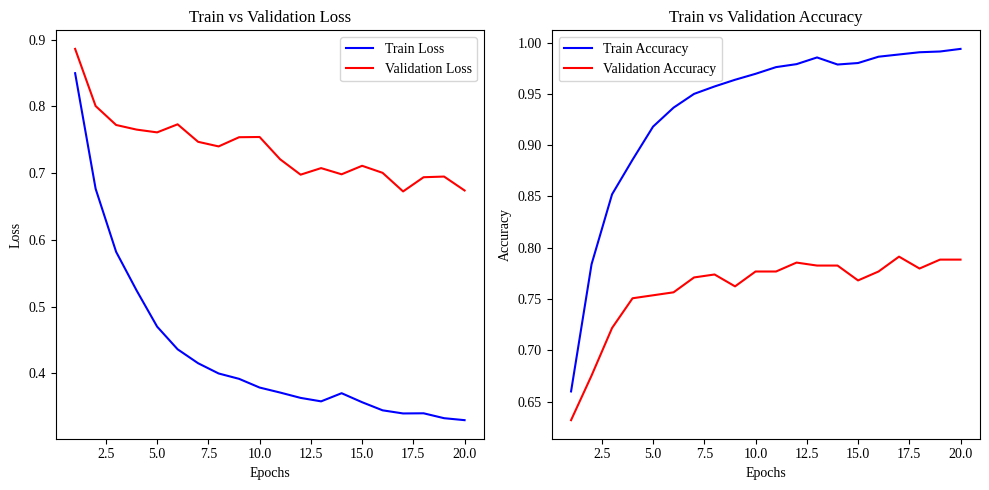

Classification Report:
                precision    recall  f1-score   support

        Eczema       0.83      0.83      0.83       139
     Psoriasis       0.72      0.70      0.71        56
Tinea_Ringworm       0.87      0.88      0.87       150

      accuracy                           0.83       345
     macro avg       0.81      0.80      0.81       345
  weighted avg       0.83      0.83      0.83       345

Confusion Matrix:


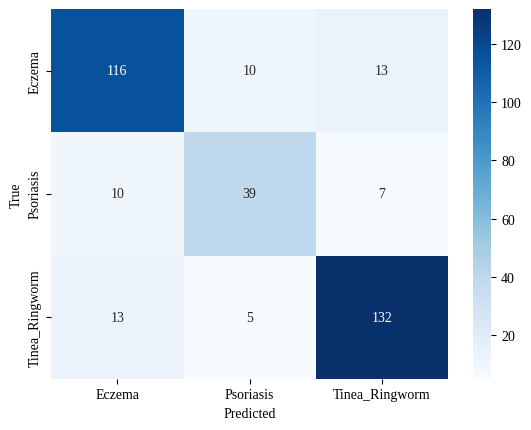

In [3]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, WeightedRandomSampler
from transformers import ViTForImageClassification, ViTFeatureExtractor
import timm
import os
from collections import Counter
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time
import random
from matplotlib import font_manager as fm
font_path = "/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf"

# ✅ Force-add the font
fm.fontManager.addfont(font_path)

# ✅ Create a font properties object
liberation_font = fm.FontProperties(fname=font_path)
# ✅ Apply the font globally to all plots
plt.rcParams['font.family'] = liberation_font.get_name()

# ------------------- Config ------------------- #
DATA_DIR = '/mnt/c/Users/pragy/Downloads/Dataset/SD260/Split_Dataset'   # should have train/val/test folders
BATCH_SIZE = 32
NUM_CLASSES = 3
model = EfficientNetWithViT(num_classes=3)
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(DEVICE)
NUM_EPOCHS = 20


def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(42)
# ------------------- Transforms ------------------- #
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize([0.5439, 0.4471, 0.4324], [0.2387, 0.2132, 0.2141])
])
val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5439, 0.4471, 0.4324], [0.2387, 0.2132, 0.2141])
])


# ------------------- Dataset ------------------- #
train_dataset = ImageFolder(os.path.join(DATA_DIR, 'train'), transform=train_transform)
val_dataset = ImageFolder(os.path.join(DATA_DIR, 'val'), transform=val_test_transform)
test_dataset = ImageFolder(os.path.join(DATA_DIR, 'test'), transform=val_test_transform)

# ------------------- DataLoader ------------------- #
# Weighted sampling to handle class imbalance
class_counts = [count for _, count in Counter(train_dataset.targets).items()]
class_weights = 1. / np.array(class_counts, dtype=np.float32)
weights = class_weights[train_dataset.targets]

sampler = WeightedRandomSampler(weights, len(weights))

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)




# ------------------- Loss and Optimizer ------------------- #
criterion = torch.nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=3, verbose=True
)

# ------------------- Training Function with Loss and Accuracy Per Epoch ------------------- #
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs):
    best_model_wts = model.state_dict()
    best_acc = 0.0

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0

        for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, preds = torch.max(outputs, 1)
            correct_preds += torch.sum(preds == labels).item()
            total_preds += labels.size(0)
            running_loss += loss.item()

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct_preds / total_preds
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_acc:.4f}")

        model.eval()
        val_loss = 0.0
        val_correct_preds = 0
        val_total_preds = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                _, preds = torch.max(outputs, 1)
                val_correct_preds += torch.sum(preds == labels).item()
                val_total_preds += labels.size(0)
                val_loss += loss.item()

        val_epoch_loss = val_loss / len(val_loader)
        val_epoch_acc = val_correct_preds / val_total_preds
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc)

        scheduler.step(val_epoch_loss)

        print(f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_acc:.4f}")

        if val_epoch_acc > best_acc:
            best_acc = val_epoch_acc
            best_model_wts = model.state_dict()

    model.load_state_dict(best_model_wts)
    return model, train_losses, val_losses, train_accuracies, val_accuracies

# ------------------- Training the Model ------------------- #
start_time = time.time()
trained_model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, criterion, optimizer, scheduler, NUM_EPOCHS
)
end_time = time.time()
training_duration = end_time - start_time

print(f"\n✅ Total Training Time: {training_duration:.2f} seconds ({training_duration/60:.2f} minutes)")
# ------------------- Plotting Loss and Accuracy ------------------- #
def plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, NUM_EPOCHS + 1)
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss', color='blue')
    plt.plot(epochs, val_losses, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train vs Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy', color='blue')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train vs Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies)

# ------------------- Evaluate on Test Set ------------------- #
def evaluate_model(model, test_loader):
    model.eval()
    test_preds = []
    test_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            test_preds.extend(preds.cpu().numpy())
            test_labels.extend(labels.cpu().numpy())

    print("Classification Report:")
    print(classification_report(test_labels, test_preds, target_names=test_loader.dataset.classes))

    print("Confusion Matrix:")
    cm = confusion_matrix(test_labels, test_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_loader.dataset.classes, yticklabels=test_loader.dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# ------------------- Save and Evaluate ------------------- #
torch.save(model.state_dict(), '/mnt/c/Users/pragy/Downloads/Dataset/SD260/Models/Modified_efficientnetb0ViT.pth')
evaluate_model(trained_model, test_loader)
